In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import scipy



In [ ]:
#importer le dataset VF

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

df= pd.read_excel('/content/drive/MyDrive/Scibids/Tableau_nettoyeVF.xlsx')


Mounted at /content/drive


# Cleaning

In [ ]:
print(df.dtypes)


Unnamed: 0                                                int64
Clients Characteristics Company ID                      float64
Clients Characteristics Company Name                     object
Accessible IDs Client ID                                 object
Accessible IDs Client Name                               object
Accessible IDs Advertiser ID                             object
Accessible IDs Advertiser Name                           object
Clients Characteristics Scibids Region                   object
Clients Characteristics Typology                         object
Accessible IDs Dsp                                       object
Accessible IDs Sub Dsp                                   object
Insertion Orders KPI Type (DSP)                          object
Insertion Orders Kpi to Optimize                         object
Performance Measures Day Tz Month                datetime64[ns]
Performance Measures Billing Scibids Activity            object
Performance Measures Clicks             

In [ ]:
# Drop the 'Unnamed: 0' column from the df DataFrame
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Confirming the column has been dropped
remaining_columns_after_drop = df.columns.tolist()
remaining_columns_after_drop


['Clients Characteristics Company ID',
 'Clients Characteristics Company Name',
 'Accessible IDs Client ID',
 'Accessible IDs Client Name',
 'Accessible IDs Advertiser ID',
 'Accessible IDs Advertiser Name',
 'Clients Characteristics Scibids Region',
 'Clients Characteristics Typology',
 'Accessible IDs Dsp',
 'Accessible IDs Sub Dsp',
 'Insertion Orders KPI Type (DSP)',
 'Insertion Orders Kpi to Optimize',
 'Performance Measures Day Tz Month',
 'Performance Measures Billing Scibids Activity',
 'Performance Measures Clicks',
 'Performance Measures Impressions',
 'Insertion Orders Distinct Count of IOs',
 'Performance Measures Revenue USD',
 'unified_KPI',
 'CPC',
 'CPC*distinct order ID ',
 'CPM',
 'CPM*distinct order ID ']

In [ ]:
df['Clients Characteristics Company ID'] = df['Clients Characteristics Company ID'].astype('Int64')
# fix float issue


In [ ]:
print(df.dtypes)


Clients Characteristics Company ID                        Int64
Clients Characteristics Company Name                     object
Accessible IDs Client ID                                 object
Accessible IDs Client Name                               object
Accessible IDs Advertiser ID                             object
Accessible IDs Advertiser Name                           object
Clients Characteristics Scibids Region                   object
Clients Characteristics Typology                         object
Accessible IDs Dsp                                       object
Accessible IDs Sub Dsp                                   object
Insertion Orders KPI Type (DSP)                          object
Insertion Orders Kpi to Optimize                         object
Performance Measures Day Tz Month                datetime64[ns]
Performance Measures Billing Scibids Activity            object
Performance Measures Clicks                               int64
Performance Measures Impressions        

## Final df

In [ ]:
# Convert specified columns to float
columns_to_convert = ['CPC', 'CPC*distinct order ID ', 'CPM', 'CPM*distinct order ID ']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)


Clients Characteristics Company ID                        Int64
Clients Characteristics Company Name                     object
Accessible IDs Client ID                                 object
Accessible IDs Client Name                               object
Accessible IDs Advertiser ID                             object
Accessible IDs Advertiser Name                           object
Clients Characteristics Scibids Region                   object
Clients Characteristics Typology                         object
Accessible IDs Dsp                                       object
Accessible IDs Sub Dsp                                   object
Insertion Orders KPI Type (DSP)                          object
Insertion Orders Kpi to Optimize                         object
Performance Measures Day Tz Month                datetime64[ns]
Performance Measures Billing Scibids Activity            object
Performance Measures Clicks                               int64
Performance Measures Impressions        

In [ ]:
df['Clients Characteristics Scibids Region'] = df['Clients Characteristics Scibids Region'].replace('US', 'North America')


In [ ]:


# Check the data types and missing values
data_info = df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26795 entries, 0 to 26794
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Clients Characteristics Company ID             26779 non-null  Int64         
 1   Clients Characteristics Company Name           26779 non-null  object        
 2   Accessible IDs Client ID                       26795 non-null  object        
 3   Accessible IDs Client Name                     26795 non-null  object        
 4   Accessible IDs Advertiser ID                   26795 non-null  object        
 5   Accessible IDs Advertiser Name                 26795 non-null  object        
 6   Clients Characteristics Scibids Region         26795 non-null  object        
 7   Clients Characteristics Typology               26714 non-null  object        
 8   Accessible IDs Dsp                             26795 non

In [ ]:
# Adjust the column names in our list
cols_to_clean = ['CPC', 'CPC*distinct order ID ', 'CPM', 'CPM*distinct order ID ']

# Replace '#DIV/0!' with NaN for relevant columns
for col in cols_to_clean:
    df[col] = df[col].replace('#DIV/0!', float('nan')).astype(float)

# Check again for missing values
missing_values = df.isnull().sum()

missing_values


Clients Characteristics Company ID                  16
Clients Characteristics Company Name                16
Accessible IDs Client ID                             0
Accessible IDs Client Name                           0
Accessible IDs Advertiser ID                         0
Accessible IDs Advertiser Name                       0
Clients Characteristics Scibids Region               0
Clients Characteristics Typology                    81
Accessible IDs Dsp                                   0
Accessible IDs Sub Dsp                               0
Insertion Orders KPI Type (DSP)                  10145
Insertion Orders Kpi to Optimize                     0
Performance Measures Day Tz Month                    0
Performance Measures Billing Scibids Activity        0
Performance Measures Clicks                          0
Performance Measures Impressions                     0
Insertion Orders Distinct Count of IOs               0
Performance Measures Revenue USD                     0
unified_KP

## Scibids activity df

In [ ]:
# Shorten the code when looking for Scibids active data

scibids_active = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Active']
without_scibids = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids']


# Client overview, KPI and DSP distribution

## Client overview

In [ ]:
# Count the unique values in the "Clients Characteristics Company ID" column
total_clients = scibids_active['Clients Characteristics Company ID'].nunique()

total_clients


233

In [ ]:
# Group by typology and region and calculate the number of unique clients
grouped_typology_region = scibids_active.groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region'])['Clients Characteristics Company ID'].nunique()

# Pivot the grouped data to get regions as columns and typologies as rows
pivot_typology_region = grouped_typology_region.unstack('Clients Characteristics Scibids Region')

# Convert values to integers
pivot_typology_region = pivot_typology_region.fillna(0).astype(int)

pivot_typology_region



Clients Characteristics Scibids Region  DACH/CEE/Nordics  JAPAC  \
Clients Characteristics Typology                                  
Big6 - Dentsu                                          0      6   
Big6 - GroupM                                          1      9   
Big6 - GroupM (Xaxis)                                  4     14   
Big6 - Havas                                           0      2   
Big6 - Interpublic                                     0      8   
Big6 - Omnicom                                         0      4   
Big6 - Publicis                                        0      6   
ITD                                                    3     22   
MARKETER                                               1      2   

Clients Characteristics Scibids Region  North America  South America  \
Clients Characteristics Typology                                       
Big6 - Dentsu                                       0              3   
Big6 - GroupM                                       6              1   
Big6 - GroupM (Xaxis)                               2              5   
Big6 - Havas                                        1              2   
Big6 - Interpublic                                  2              1   
Big6 - Omnicom                                      2              0   
Big6 - Publicis                                     1              0   
ITD                                                27              9   
MARKETER                                            3              1   

Clients Characteristics Scibids Region  South Europe  UK  
Clients Characteristics Typology                          
Big6 - Dentsu                                      5   0  
Big6 - GroupM                                      4   7  
Big6 - GroupM (Xaxis)                              2   1  
Big6 - Havas                                       4   1  
Big6 - Interpublic                                 0   1  
Big6 - Omnicom                                     2   1  
Big6 - Publicis                                    7   0  
ITD                                               27  12  
MARKETER                                           4   5

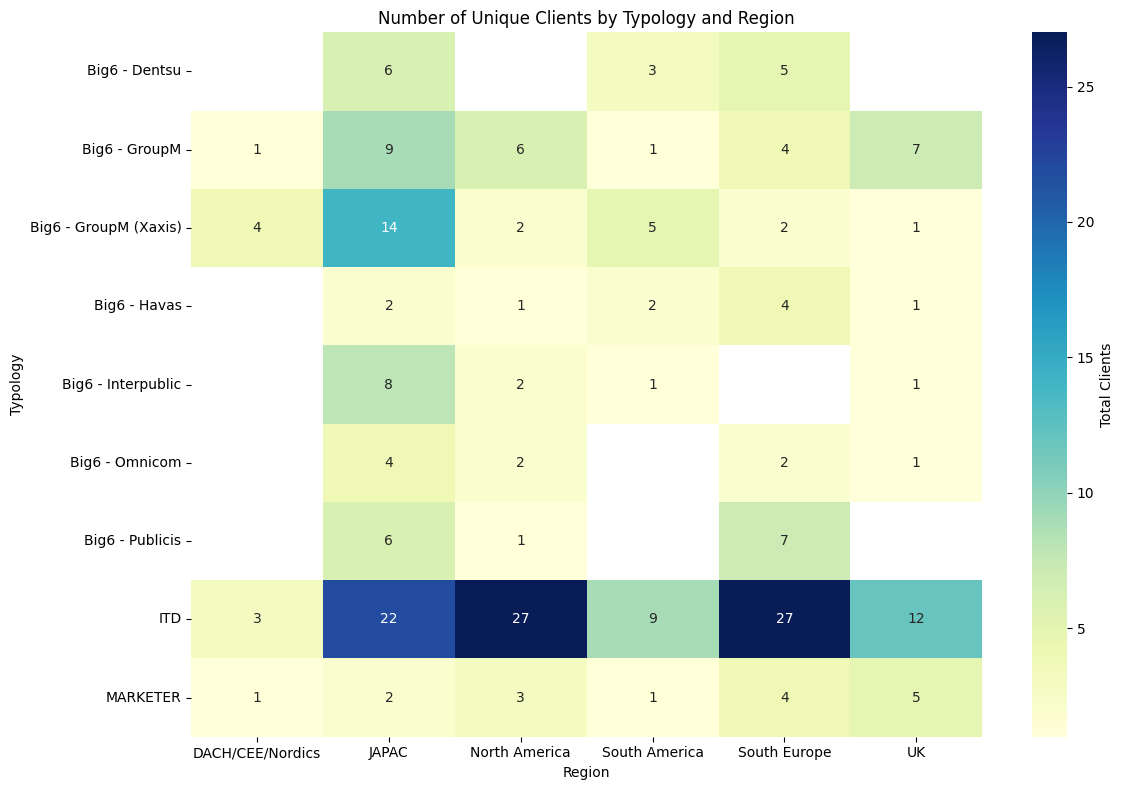

In [ ]:
# Create a mask for values that are 0
mask = pivot_typology_region == 0

# Setting up the figure and axis
plt.figure(figsize=(12, 8))

# Creating the heatmap with the mask
sns.heatmap(pivot_typology_region, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Total Clients'}, mask=mask)

# Setting title and labels
plt.title("Number of Unique Clients by Typology and Region")
plt.xlabel("Region")
plt.ylabel("Typology")
plt.tight_layout()

# Display the heatmap
plt.show()

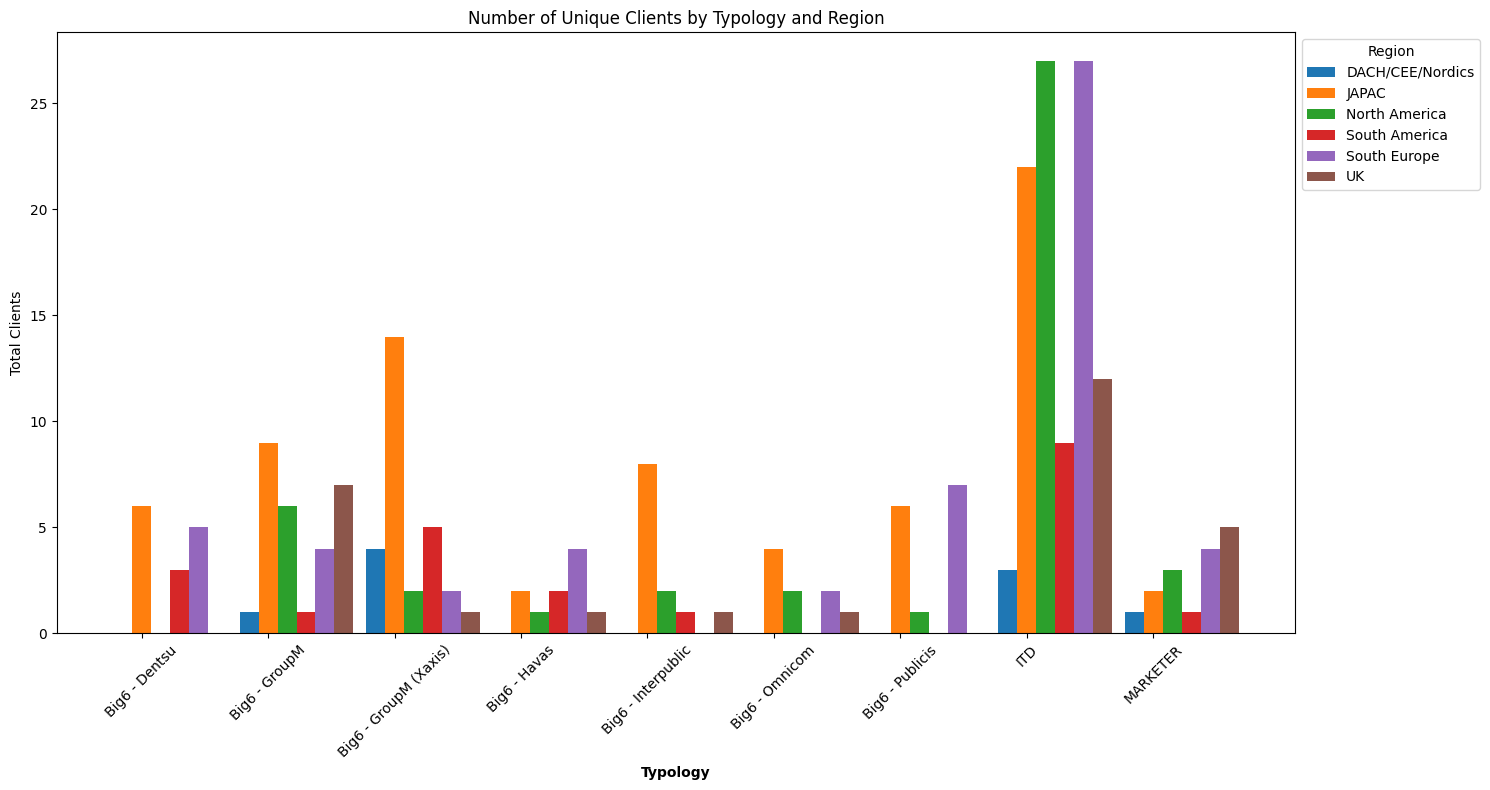

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(15, 8))

# Width of each individual bar
bar_width = 0.15

# Set up the x positions for groups
r = np.arange(len(pivot_typology_region.index))

# Create bars for each region
for idx, column in enumerate(pivot_typology_region.columns):
    plt.bar(r + idx * bar_width, pivot_typology_region[column], width=bar_width, label=column)

# Configure the layout
plt.xlabel('Typology', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(pivot_typology_region.index))], pivot_typology_region.index, rotation=45)
plt.ylabel('Total Clients')
plt.title('Number of Unique Clients by Typology and Region')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

##  Evolution of number of clients over time

In [ ]:
# Group by month, typology, and region and count unique company IDs
client_evolution = scibids_active.groupby(['Performance Measures Day Tz Month',
                                 'Clients Characteristics Typology',
                                 'Clients Characteristics Scibids Region'])['Clients Characteristics Company ID'].nunique().reset_index()

client_evolution

Performance Measures Day Tz Month Clients Characteristics Typology  \
0                          2022-01-01                    Big6 - Dentsu   
1                          2022-01-01                    Big6 - Dentsu   
2                          2022-01-01                    Big6 - Dentsu   
3                          2022-01-01                    Big6 - GroupM   
4                          2022-01-01                    Big6 - GroupM   
..                                ...                              ...   
663                        2023-09-01                              ITD   
664                        2023-09-01                              ITD   
665                        2023-09-01                         MARKETER   
666                        2023-09-01                         MARKETER   
667                        2023-09-01                         MARKETER   

    Clients Characteristics Scibids Region  Clients Characteristics Company ID  
0                                    JAPAC                                   1  
1                            South America                                   1  
2                             South Europe                                   3  
3                         DACH/CEE/Nordics                                   1  
4                                    JAPAC                                   1  
..                                     ...                                 ...  
663                           South Europe                                   9  
664                                     UK                                   7  
665                       DACH/CEE/Nordics                                   1  
666                          North America                                   3  
667                                     UK                                   2  

[668 rows x 4 columns]

In [ ]:
# Group data by month and region, then count unique clients
clients_over_time_region = scibids_active.groupby(['Performance Measures Day Tz Month', 'Clients Characteristics Scibids Region'])['Clients Characteristics Company ID'].nunique().unstack()

clients_over_time_region


Clients Characteristics Scibids Region  DACH/CEE/Nordics  JAPAC  \
Performance Measures Day Tz Month                                 
2022-01-01                                             4     29   
2022-02-01                                             7     29   
2022-03-01                                             6     31   
2022-04-01                                             5     33   
2022-05-01                                             3     33   
2022-06-01                                             3     35   
2022-07-01                                             4     30   
2022-08-01                                             4     30   
2022-09-01                                             4     34   
2022-10-01                                             4     32   
2022-11-01                                             4     36   
2022-12-01                                             3     34   
2023-01-01                                             3     29   
2023-02-01                                             2     29   
2023-03-01                                             2     29   
2023-04-01                                             2     28   
2023-05-01                                             2     33   
2023-06-01                                             2     35   
2023-07-01                                             2     33   
2023-08-01                                             3     38   
2023-09-01                                             3     31   

Clients Characteristics Scibids Region  North America  South America  \
Performance Measures Day Tz Month                                      
2022-01-01                                         12              6   
2022-02-01                                         13              9   
2022-03-01                                         13             10   
2022-04-01                                         14              9   
2022-05-01                                         16             10   
2022-06-01                                         19             11   
2022-07-01                                         18              7   
2022-08-01                                         19              8   
2022-09-01                                         21              6   
2022-10-01                                         22              5   
2022-11-01                                         22              7   
2022-12-01                                         22              6   
2023-01-01                                         17              2   
2023-02-01                                         20              2   
2023-03-01                                         21              4   
2023-04-01                                         20              2   
2023-05-01                                         20              5   
2023-06-01                                         25              3   
2023-07-01                                         25              3   
2023-08-01                                         28              4   
2023-09-01                                         27              3   

Clients Characteristics Scibids Region  South Europe  UK  
Performance Measures Day Tz Month                         
2022-01-01                                        19  16  
2022-02-01                                        21  16  
2022-03-01                                        26  19  
2022-04-01                                        29  20  
2022-05-01                                        26  22  
2022-06-01                                        25  21  
2022-07-01                                        25  20  
2022-08-01                                        25  21  
2022-09-01                                        28  20  
2022-10-01                                        26  19  
2022-11-01                                        24  17  
2022-12-01                        

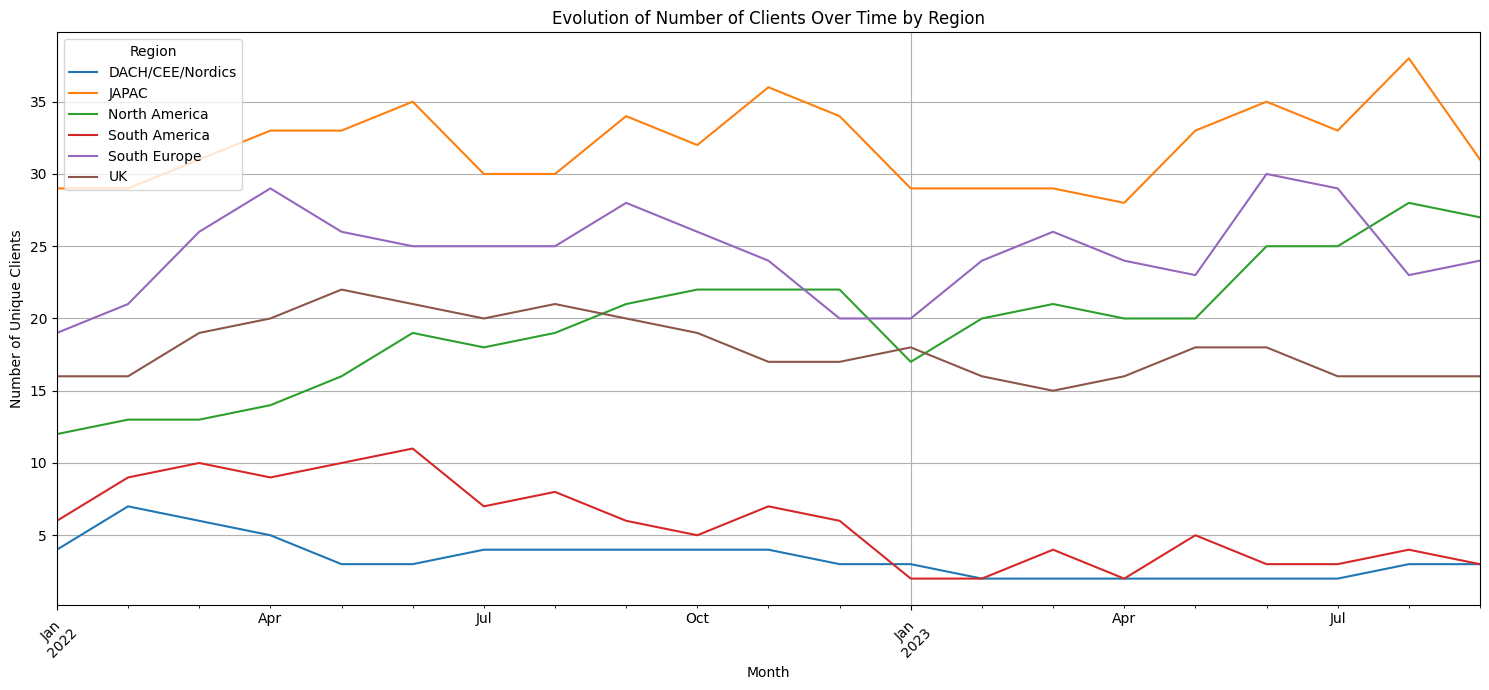

In [ ]:
# Plot the evolution of number of clients over time for each region
plt.figure(figsize=(15, 7))
clients_over_time_region.plot(ax=plt.gca())
plt.title('Evolution of Number of Clients Over Time by Region')
plt.xlabel('Month')
plt.ylabel('Number of Unique Clients')
plt.grid(True)
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## KPI distribution

In [ ]:
# KPI preference
kpi_by_typology = scibids_active.groupby(['Clients Characteristics Typology', 'unified_KPI'])['Insertion Orders Distinct Count of IOs'].sum().unstack()
kpi_by_typology

unified_KPI                           CPA  CPA_PC     CPC   CPCV  CPIAVC  \
Clients Characteristics Typology                                           
Big6 - Dentsu                       400.0   355.0   975.0  105.0     NaN   
Big6 - GroupM                       880.0    34.0    32.0  169.0     NaN   
Big6 - GroupM (Xaxis)               447.0    15.0    83.0  143.0     6.0   
Big6 - Havas                        230.0     4.0    19.0    2.0     NaN   
Big6 - Interpublic                  169.0    50.0    32.0   31.0     NaN   
Big6 - Omnicom                       63.0     3.0     2.0  916.0     NaN   
Big6 - Publicis                     549.0    41.0   117.0   33.0     NaN   
ITD                               10579.0   441.0  2880.0  681.0     2.0   
MARKETER                            600.0    34.0    37.0    NaN     NaN   

unified_KPI                         CPM  CPMbumper  CPVideoView     CTR  \
Clients Characteristics Typology                                          
Big6 - Dentsu                     167.0      306.0        114.0   169.0   
Big6 - GroupM                      27.0      154.0         22.0     8.0   
Big6 - GroupM (Xaxis)             116.0     3445.0       3799.0   230.0   
Big6 - Havas                        NaN       16.0         36.0    15.0   
Big6 - Interpublic                 26.0      342.0        443.0    53.0   
Big6 - Omnicom                    707.0       49.0         27.0     5.0   
Big6 - Publicis                    93.0      453.0        376.0     9.0   
ITD                               884.0      372.0        853.0  2357.0   
MARKETER                           10.0      565.0        300.0     6.0   

unified_KPI                       V-CPM    VTR  
Clients Characteristics Typology                
Big6 - Dentsu                       3.0  582.0  
Big6 - GroupM                     250.0    8.0  
Big6 - GroupM (Xaxis)               7.0   49.0  
Big6 - Havas                        4.0    3.0  
Big6 - Interpublic                  2.0   33.0  
Big6 - Omnicom                    765.0    2.0  
Big6 - Publicis                     6.0   18.0  
ITD                               226.0  214.0  
MARKETER                           14.0    5.0

In [ ]:


# Convert the sums into percentages
kpi_distribution_typology = kpi_by_typology.divide(kpi_by_typology.sum(axis=1), axis=0) * 100

kpi_distribution_typology



unified_KPI                             CPA     CPA_PC        CPC       CPCV  \
Clients Characteristics Typology                                               
Big6 - Dentsu                     12.594458  11.177582  30.698992   3.306045   
Big6 - GroupM                     55.555556   2.146465   2.020202  10.669192   
Big6 - GroupM (Xaxis)              5.359712   0.179856   0.995204   1.714628   
Big6 - Havas                      69.908815   1.215805   5.775076   0.607903   
Big6 - Interpublic                14.309907   4.233700   2.709568   2.624894   
Big6 - Omnicom                     2.481292   0.118157   0.078771  36.077196   
Big6 - Publicis                   32.389381   2.418879   6.902655   1.946903   
ITD                               54.281903   2.262815  14.777567   3.494279   
MARKETER                          38.192234   2.164227   2.355188        NaN   

unified_KPI                         CPIAVC        CPM  CPMbumper  CPVideoView  \
Clients Characteristics Typology                                                
Big6 - Dentsu                          NaN   5.258186   9.634761     3.589421   
Big6 - GroupM                          NaN   1.704545   9.722222     1.388889   
Big6 - GroupM (Xaxis)             0.071942   1.390887  41.306954    45.551559   
Big6 - Havas                           NaN        NaN   4.863222    10.942249   
Big6 - Interpublic                     NaN   2.201524  28.958510    37.510584   
Big6 - Omnicom                         NaN  27.845609   1.929894     1.063411   
Big6 - Publicis                        NaN   5.486726  26.725664    22.182891   
ITD                               0.010262   4.535892   1.908769     4.376828   
MARKETER                               NaN   0.636537  35.964354    19.096117   

unified_KPI                             CTR      V-CPM        VTR  
Clients Characteristics Typology                                   
Big6 - Dentsu                      5.321159   0.094458  18.324937  
Big6 - GroupM                      0.505051  15.782828   0.505051  
Big6 - GroupM (Xaxis)              2.757794   0.083933   0.587530  
Big6 - Havas                       4.559271   1.215805   0.911854  
Big6 - Interpublic                 4.487722   0.169348   2.794242  
Big6 - Omnicom                     0.196928  30.129972   0.078771  
Big6 - Publicis                    0.530973   0.353982   1.061947  
ITD                               12.094002   1.159629   1.098055  
MARKETER                           0.381922   0.891152   0.318269

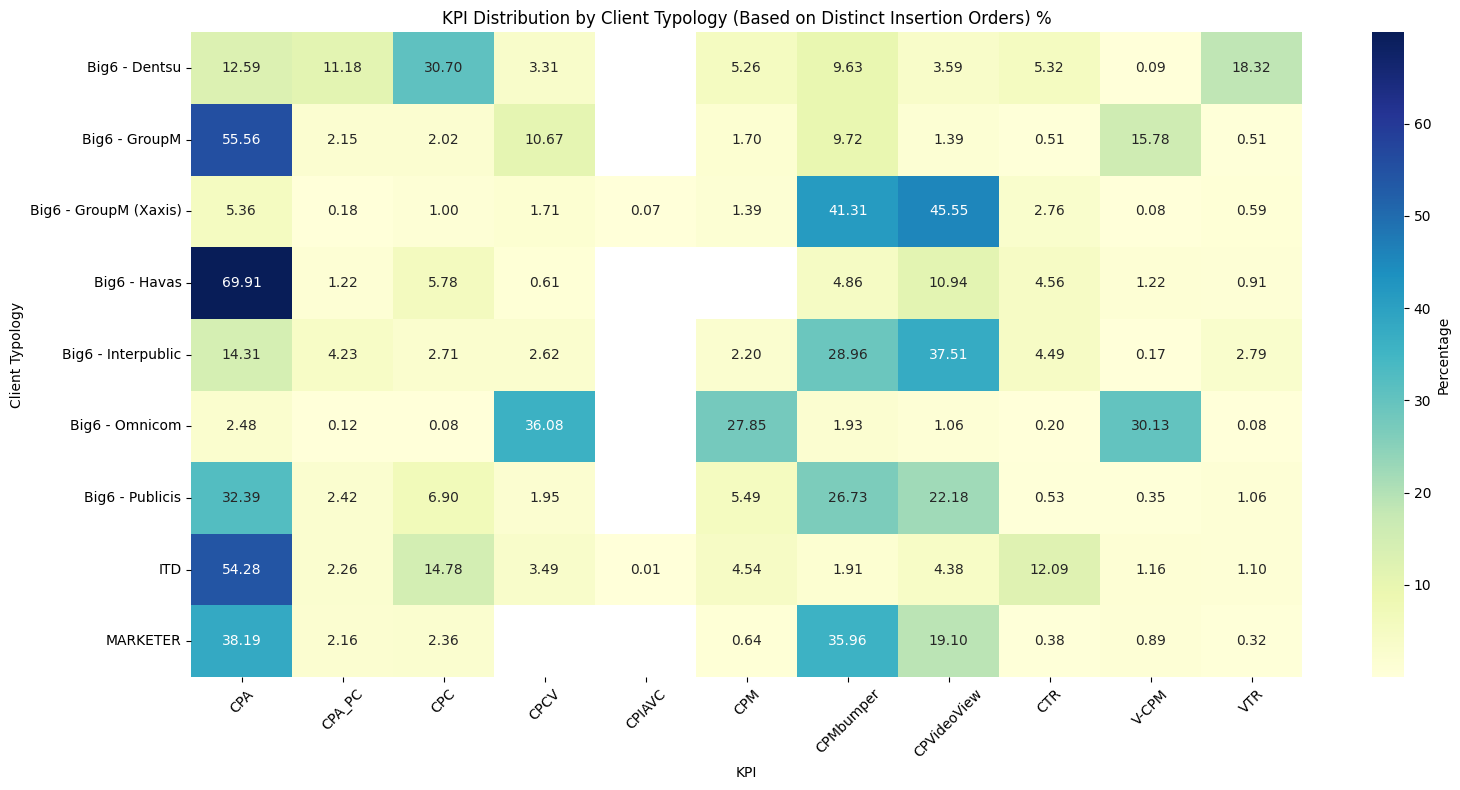

In [ ]:
# Create a mask for values that are 0
mask = kpi_distribution_typology == 0

# Plotting the heatmap with the mask
plt.figure(figsize=(16, 8))
sns.heatmap(kpi_distribution_typology, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'}, mask=mask)
plt.title('KPI Distribution by Client Typology (Based on Distinct Insertion Orders) %')
plt.xlabel('KPI')
plt.ylabel('Client Typology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
kpi_by_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'unified_KPI'])['Insertion Orders Distinct Count of IOs'].sum().unstack()
kpi_by_region




unified_KPI                                CPA  CPA_PC     CPC    CPCV  \
Clients Characteristics Scibids Region                                   
DACH/CEE/Nordics                          58.0     6.0    35.0     2.0   
JAPAC                                   2175.0    61.0  2283.0   151.0   
North America                           3238.0   137.0   441.0  1399.0   
South America                            135.0    42.0   148.0   221.0   
South Europe                            2465.0   501.0  1224.0   247.0   
UK                                      5849.0   230.0    54.0    64.0   

unified_KPI                             CPIAVC     CPM  CPMbumper  \
Clients Characteristics Scibids Region                              
DACH/CEE/Nordics                           NaN    30.0        1.0   
JAPAC                                      NaN   320.0     4312.0   
North America                              NaN  1168.0      381.0   
South America                              NaN   259.0      348.0   
South Europe                               NaN   195.0       38.0   
UK                                         8.0    70.0      624.0   

unified_KPI                             CPVideoView     CTR  V-CPM    VTR  
Clients Characteristics Scibids Region                                     
DACH/CEE/Nordics                                2.0   221.0  113.0    1.0  
JAPAC                                        4826.0   176.0  107.0   43.0  
North America                                 467.0  1700.0  998.0  185.0  
South America                                  91.0   230.0   15.0   43.0  
South Europe                                   57.0   372.0   11.0  617.0  
UK                                            544.0   153.0   41.0   25.0

In [ ]:
# Convert the sums into percentages
kpi_distribution_region = kpi_by_region.divide(kpi_by_region.sum(axis=1), axis=0) * 100

kpi_distribution_region

unified_KPI                                   CPA    CPA_PC        CPC  \
Clients Characteristics Scibids Region                                   
DACH/CEE/Nordics                        12.366738  1.279318   7.462687   
JAPAC                                   15.047738  0.422029  15.794936   
North America                           32.015029  1.354558   4.360293   
South America                            8.812010  2.741514   9.660574   
South Europe                            43.041732  8.748036  21.372446   
UK                                      76.337771  3.001827   0.704777   

unified_KPI                                  CPCV    CPIAVC        CPM  \
Clients Characteristics Scibids Region                                   
DACH/CEE/Nordics                         0.426439       NaN   6.396588   
JAPAC                                    1.044694       NaN   2.213920   
North America                           13.832312       NaN  11.548349   
South America                           14.425587       NaN  16.906005   
South Europe                             4.312904       NaN   3.404924   
UK                                       0.835291  0.104411   0.913600   

unified_KPI                             CPMbumper  CPVideoView        CTR  \
Clients Characteristics Scibids Region                                      
DACH/CEE/Nordics                         0.213220     0.426439  47.121535   
JAPAC                                   29.832572    33.388681   1.217656   
North America                            3.767056     4.617362  16.808384   
South America                           22.715405     5.939948  15.013055   
South Europe                             0.663524     0.995285   6.495547   
UK                                       8.144088     7.099974   1.996868   

unified_KPI                                 V-CPM        VTR  
Clients Characteristics Scibids Region                        
DACH/CEE/Nordics                        24.093817   0.213220  
JAPAC                                    0.740280   0.297496  
North America                            9.867510   1.829148  
South America                            0.979112   2.806789  
South Europe                             0.192073  10.773529  
UK                                       0.535108   0.326286

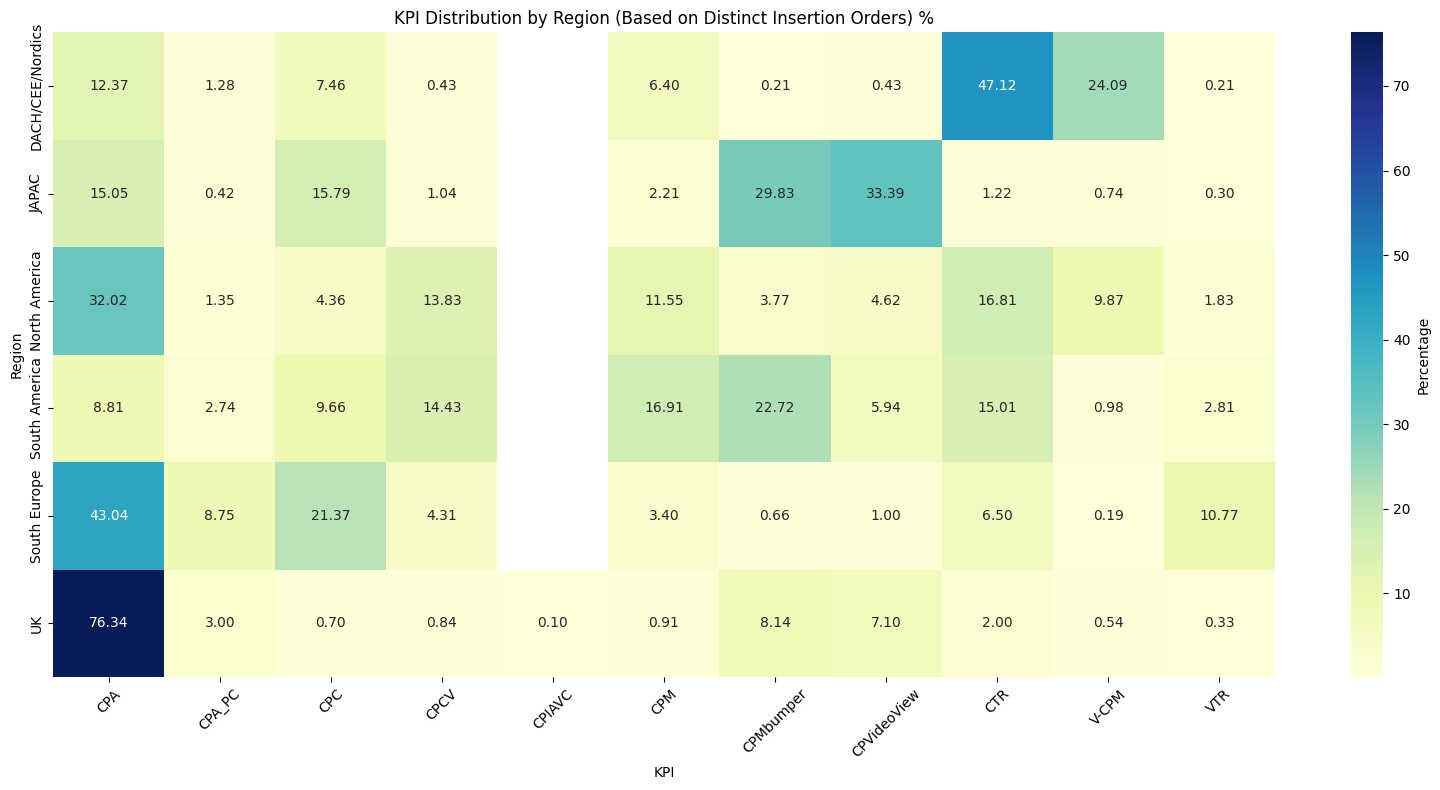

In [ ]:
# Create a mask for values that are 0
mask = kpi_distribution_region == 0

# Plotting the heatmap with the mask
plt.figure(figsize=(16, 8))
sns.heatmap(kpi_distribution_region, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'}, mask=mask)
plt.title('KPI Distribution by Region (Based on Distinct Insertion Orders) %')
plt.xlabel('KPI')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Campaigns distribution

In [ ]:

campaigns_per_month = scibids_active.groupby(['Performance Measures Day Tz Month'])['Insertion Orders Distinct Count of IOs'].sum()
campaigns_per_month


Performance Measures Day Tz Month
2022-01-01    1620
2022-02-01    2005
2022-03-01    1948
2022-04-01    1753
2022-05-01    2128
2022-06-01    1890
2022-07-01    1400
2022-08-01    1768
2022-09-01    2111
2022-10-01    2060
2022-11-01    2036
2022-12-01    1876
2023-01-01    1536
2023-02-01    1630
2023-03-01    1929
2023-04-01    1963
2023-05-01    2219
2023-06-01    2175
2023-07-01    2050
2023-08-01    2085
2023-09-01    1776
Name: Insertion Orders Distinct Count of IOs, dtype: int64

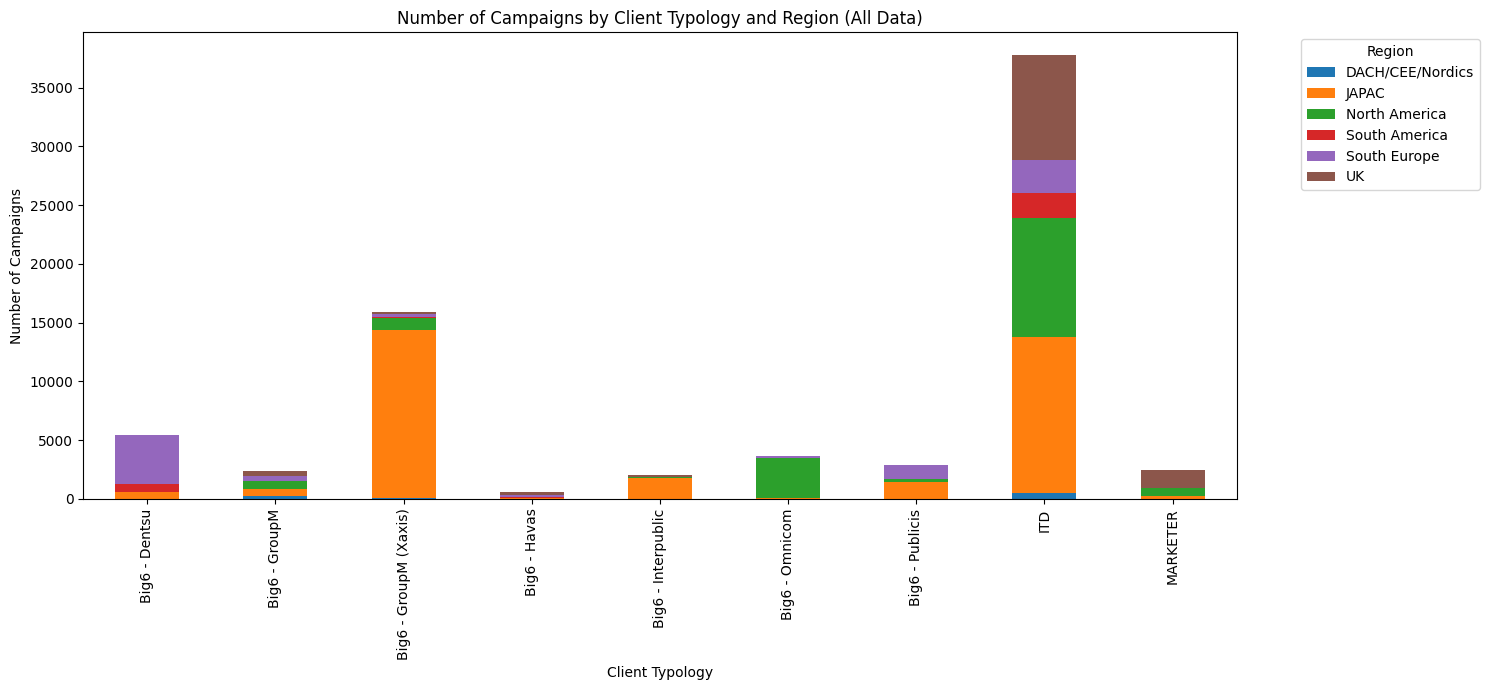

In [ ]:
# Group by client typology and region to sum the number of campaigns  without Scibids filtering
campaigns_by_typology_region_all = df.groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region'])['Insertion Orders Distinct Count of IOs'].sum().unstack()

# Plot the sum of campaigns by client typology for each region
plt.figure(figsize=(15, 7))
campaigns_by_typology_region_all.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Number of Campaigns by Client Typology and Region (All Data)')
plt.xlabel('Client Typology')
plt.ylabel('Number of Campaigns')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


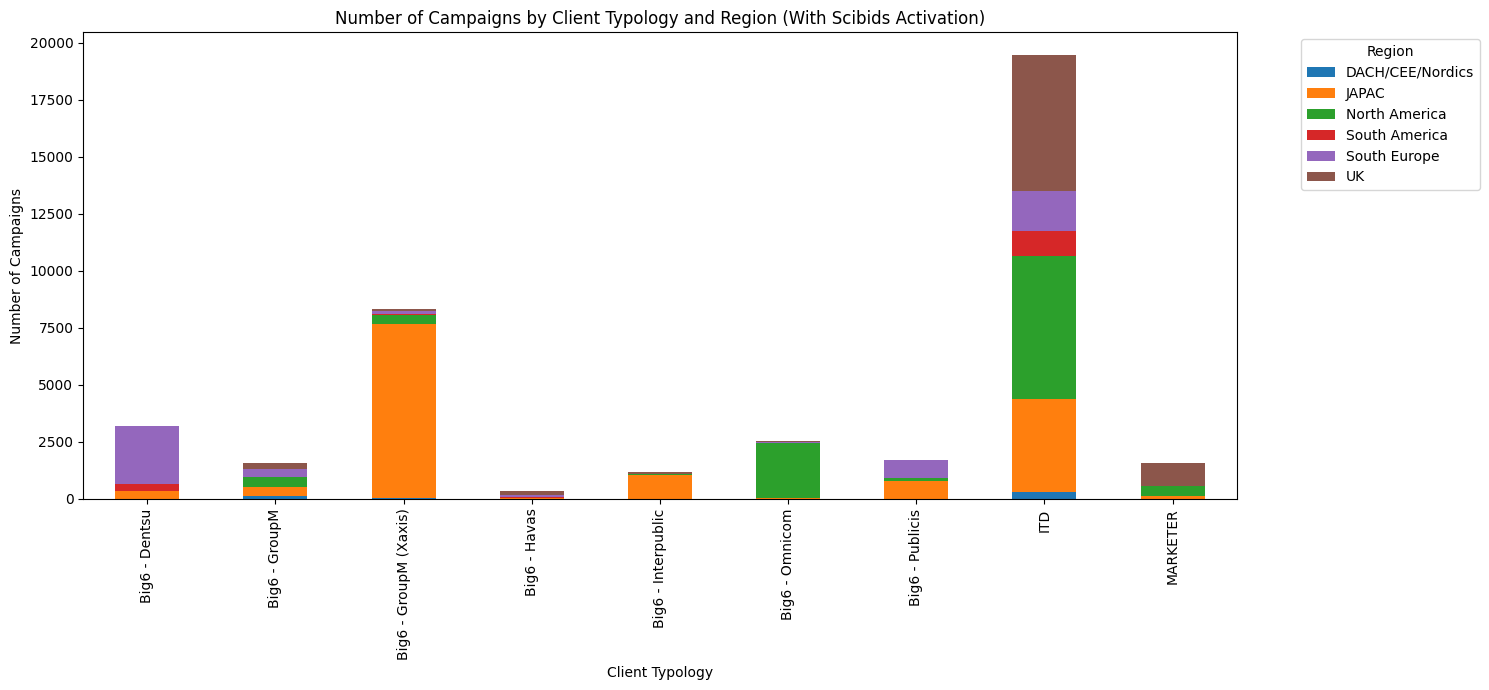

In [ ]:


# Filter for rows where Scibids is activated

# Sum the number of campaigns (using "Insertion Orders Distinct Count of IOs") by client typology and region
campaigns_by_typology_region = scibids_active.groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region'])['Insertion Orders Distinct Count of IOs'].sum().unstack()

# Fill NaN values with zeros for visualization
campaigns_by_typology_region_filled = campaigns_by_typology_region.fillna(0)

# Plotting the sum of campaigns by client typology for each region
plt.figure(figsize=(15, 7))
campaigns_by_typology_region_filled.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Number of Campaigns by Client Typology and Region (With Scibids Activation)')
plt.xlabel('Client Typology')
plt.ylabel('Number of Campaigns')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## DSP distribution

In [ ]:
# DSP preference by Region
dsp_by_typology = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp'])['Insertion Orders Distinct Count of IOs'].sum().unstack()
dsp_by_typology

Accessible IDs Dsp                  DV360  MediaMath  TheTradeDesk   Xandr
Clients Characteristics Typology                                          
Big6 - Dentsu                      2152.0        NaN         686.0   338.0
Big6 - GroupM                      1112.0        NaN         467.0     5.0
Big6 - GroupM (Xaxis)              7836.0        NaN         253.0   251.0
Big6 - Havas                        313.0       16.0           NaN     NaN
Big6 - Interpublic                 1118.0        NaN          63.0     NaN
Big6 - Omnicom                      160.0        NaN        2379.0     NaN
Big6 - Publicis                    1346.0        NaN          59.0   290.0
ITD                               13952.0       79.0         320.0  5138.0
MARKETER                           1357.0        9.0          30.0   175.0

In [ ]:
# Normalize the values
dsp_distribution_typology = dsp_by_typology.divide(dsp_by_typology.sum(axis=1), axis=0)
dsp_distribution_typology

Accessible IDs Dsp                   DV360  MediaMath  TheTradeDesk     Xandr
Clients Characteristics Typology                                             
Big6 - Dentsu                     0.677582        NaN      0.215995  0.106423
Big6 - GroupM                     0.702020        NaN      0.294823  0.003157
Big6 - GroupM (Xaxis)             0.939568        NaN      0.030336  0.030096
Big6 - Havas                      0.951368   0.048632           NaN       NaN
Big6 - Interpublic                0.946655        NaN      0.053345       NaN
Big6 - Omnicom                    0.063017        NaN      0.936983       NaN
Big6 - Publicis                   0.794100        NaN      0.034808  0.171091
ITD                               0.715891   0.004054      0.016420  0.263636
MARKETER                          0.863781   0.005729      0.019096  0.111394

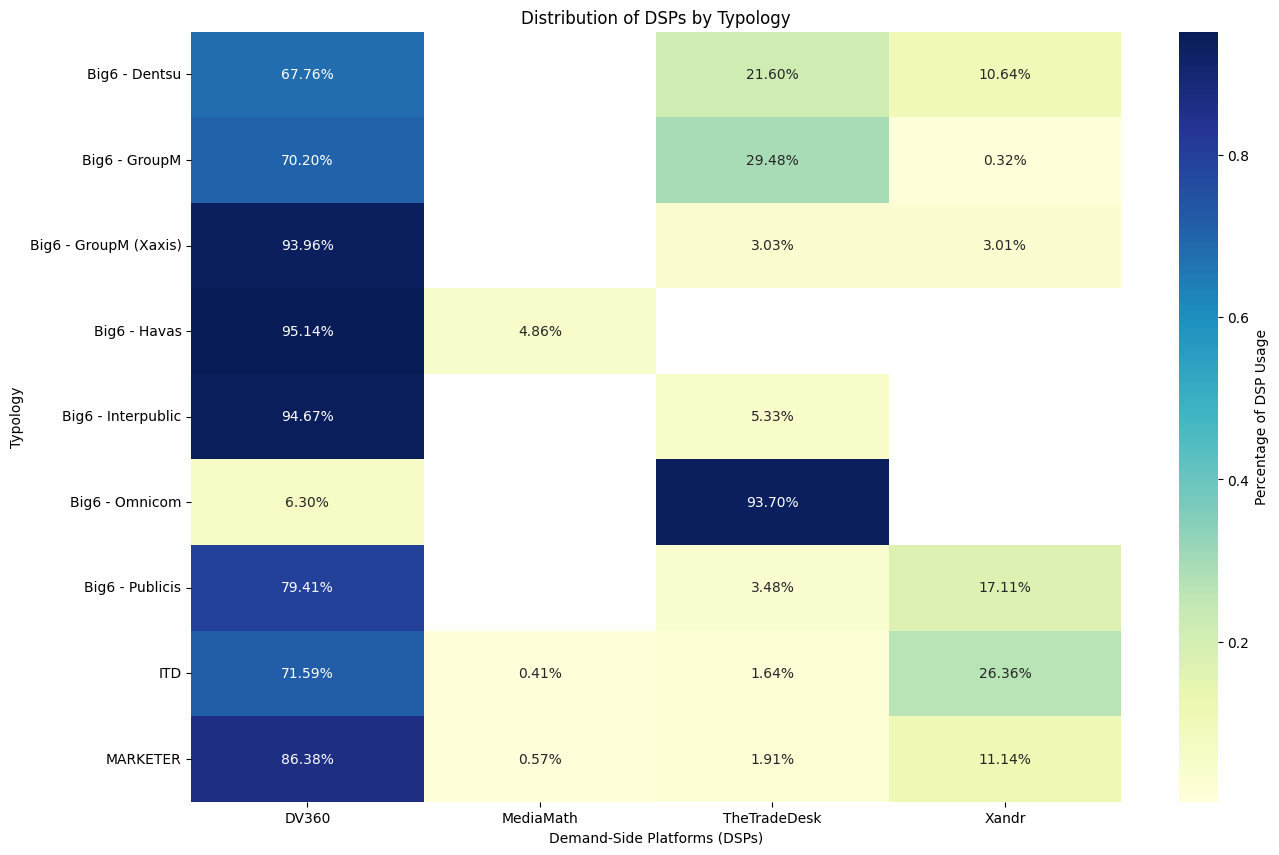

In [ ]:
# Visualise

plt.figure(figsize=(15, 10))
sns.heatmap(dsp_distribution_typology, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of DSP Usage'}, fmt=".2%")
plt.title('Distribution of DSPs by Typology')
plt.xlabel('Demand-Side Platforms (DSPs)')
plt.ylabel('Typology')
plt.show()

In [ ]:
# DSP preference by Region
dsp_by_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Accessible IDs Dsp'])['Insertion Orders Distinct Count of IOs'].sum().unstack()
dsp_by_region

Accessible IDs Dsp                        DV360  MediaMath  TheTradeDesk  \
Clients Characteristics Scibids Region                                     
DACH/CEE/Nordics                          332.0        NaN           NaN   
JAPAC                                   14207.0       55.0          98.0   
North America                            3156.0       24.0        3255.0   
South America                            1494.0        NaN           NaN   
South Europe                             3083.0       12.0         886.0   
UK                                       7118.0       13.0          28.0   

Accessible IDs Dsp                       Xandr  
Clients Characteristics Scibids Region          
DACH/CEE/Nordics                         137.0  
JAPAC                                     94.0  
North America                           3679.0  
South America                             38.0  
South Europe                            1746.0  
UK                                       503.0

In [ ]:
# Normalize the values
dsp_distribution_region = dsp_by_region.divide(dsp_by_region.sum(axis=1), axis=0)
dsp_distribution_region

Accessible IDs Dsp                         DV360  MediaMath  TheTradeDesk  \
Clients Characteristics Scibids Region                                      
DACH/CEE/Nordics                        0.707889        NaN           NaN   
JAPAC                                   0.982911   0.003805      0.006780   
North America                           0.312043   0.002373      0.321831   
South America                           0.975196        NaN           NaN   
South Europe                            0.538327   0.002095      0.154706   
UK                                      0.929000   0.001697      0.003654   

Accessible IDs Dsp                         Xandr  
Clients Characteristics Scibids Region            
DACH/CEE/Nordics                        0.292111  
JAPAC                                   0.006503  
North America                           0.363753  
South America                           0.024804  
South Europe                            0.304872  
UK                                      0.065649

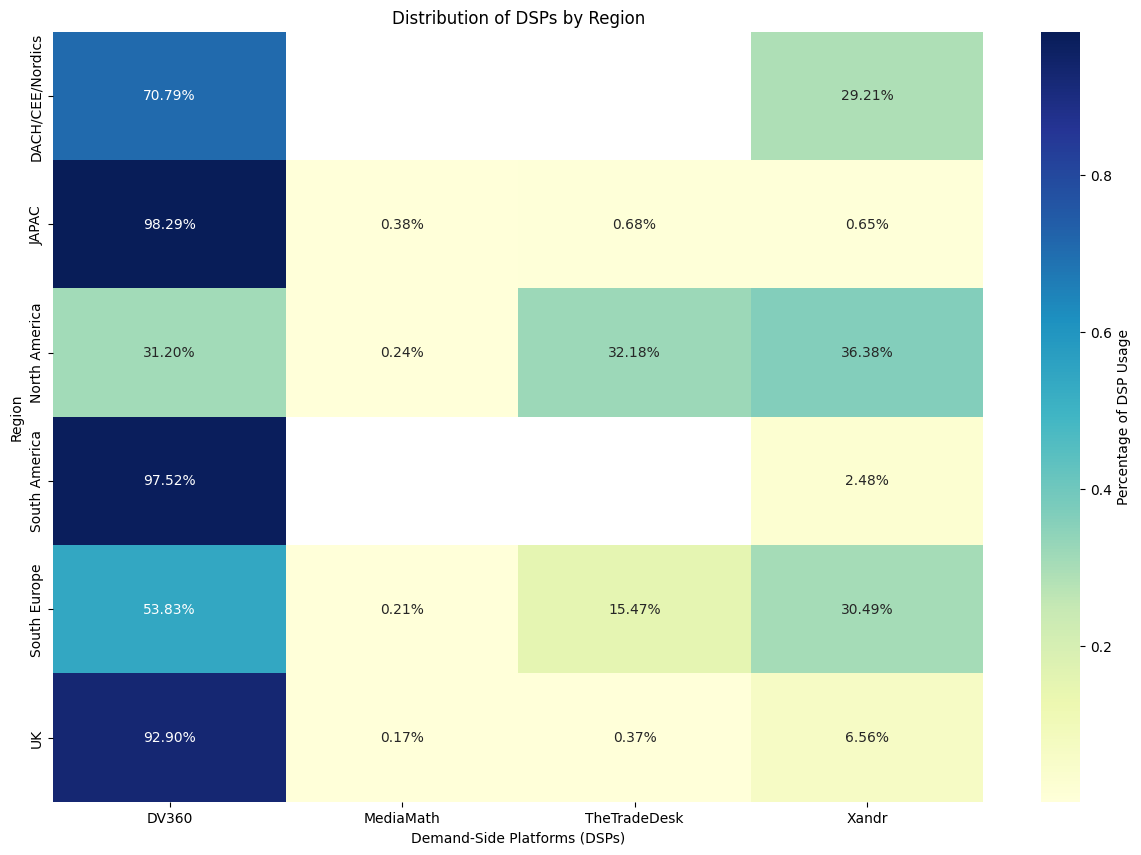

In [ ]:

# Visualise

plt.figure(figsize=(15, 10))
sns.heatmap(dsp_distribution_region, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of DSP Usage'}, fmt=".2%")
plt.title('Distribution of DSPs by Region')
plt.xlabel('Demand-Side Platforms (DSPs)')
plt.ylabel('Region')
plt.show()


In [ ]:
# Grouping by Region and Sub-DSP to get the sum of distinct insertion orders for each Sub-DSP per region
sub_dsp_region_preference = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Accessible IDs Sub Dsp'])['Insertion Orders Distinct Count of IOs'].sum().unstack().fillna(0)

# Sorting the values for better visualization
sub_dsp_region_preference = sub_dsp_region_preference[sub_dsp_region_preference.sum().sort_values(ascending=False).index]

sub_dsp_region_preference


Accessible IDs Sub Dsp                  Display  TrueView
Clients Characteristics Scibids Region                   
DACH/CEE/Nordics                            466         3
JAPAC                                      5313      9141
North America                              9254       860
South America                              1091       441
South Europe                               5632        95
UK                                         6455      1207

In [ ]:
# Grouping by Region and Sub-DSP to get the sum of distinct insertion orders for each Sub-DSP per region
sub_dsp_typology_preference = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Sub Dsp'])['Insertion Orders Distinct Count of IOs'].sum().unstack().fillna(0)

# Sorting the values for better visualization
sub_dsp_typology_preference = sub_dsp_typology_preference[sub_dsp_typology_preference.sum().sort_values(ascending=False).index]
sub_dsp_typology_preference

Accessible IDs Sub Dsp            Display  TrueView
Clients Characteristics Typology                   
Big6 - Dentsu                        2754       422
Big6 - GroupM                        1373       211
Big6 - GroupM (Xaxis)                1094      7246
Big6 - Havas                          277        52
Big6 - Interpublic                    396       785
Big6 - Omnicom                       2463        76
Big6 - Publicis                       863       832
ITD                                 18252      1237
MARKETER                              704       867

In [ ]:
# Grouping by Region, Typology, and Sub-DSP to get the sum of distinct insertion orders
sub_dsp = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology', 'Accessible IDs Sub Dsp'])['Insertion Orders Distinct Count of IOs'].sum().reset_index()

# Pivot the table to move the Sub-DSP values to columns
sub_dsp_preference = sub_dsp.pivot_table(index=['Clients Characteristics Scibids Region', 'Clients Characteristics Typology'],
                                        columns='Accessible IDs Sub Dsp',
                                        values='Insertion Orders Distinct Count of IOs',
                                        aggfunc='sum')

# Reorder the columns to have "Display" and "Trueview" as top-level columns
column_order = [col for col in ['Display', 'TrueView'] if col in pivoted_data.columns]
sub_dsp_preference = sub_dsp_preference[column_order]

# Convert values to integers
sub_dsp_preference = sub_dsp_preference.fillna(0).astype(int)


sub_dsp_preference



NameError: ignored

In [ ]:
# Group by both 'Clients Characteristics Scibids Region' and 'Clients Characteristics Typology',
# along with 'Accessible IDs Sub Dsp', to get the sum of distinct insertion orders for each combination
combined_pivot = (scibids_active
                  .groupby(['Clients Characteristics Scibids Region',
                            'Clients Characteristics Typology',
                            'Accessible IDs Sub Dsp'])
                  ['Insertion Orders Distinct Count of IOs'].sum().unstack())

# Fill NaN values with 0 for better visualization
combined_pivot.fillna(0, inplace=True)

combined_pivot



Accessible IDs Sub Dsp                                                   Display  \
Clients Characteristics Scibids Region Clients Characteristics Typology            
DACH/CEE/Nordics                       Big6 - GroupM                       123.0   
                                       Big6 - GroupM (Xaxis)                23.0   
                                       ITD                                 316.0   
                                       MARKETER                              4.0   
JAPAC                                  Big6 - Dentsu                       196.0   
                                       Big6 - GroupM                       353.0   
                                       Big6 - GroupM (Xaxis)               525.0   
                                       Big6 - Havas                         14.0   
                                       Big6 - Interpublic                  261.0   
                                       Big6 - Omnicom                        3.0   
                                       Big6 - Publicis                      36.0   
                                       ITD                                3820.0   
                                       MARKETER                            105.0   
North America                          Big6 - GroupM                       340.0   
                                       Big6 - GroupM (Xaxis)               294.0   
                                       Big6 - Havas                          0.0   
                                       Big6 - Interpublic                   40.0   
                                       Big6 - Omnicom                     2391.0   
                                       Big6 - Publicis                     109.0   
                                       ITD                                5740.0   
                                       MARKETER                            334.0   
South America                          Big6 - Dentsu                        26.0   
                                       Big6 - GroupM                         5.0   
                                       Big6 - GroupM (Xaxis)                 9.0   
                                       Big6 - Havas                         13.0   
                                       Big6 - Interpublic                    4.0   
                                       ITD                                1018.0   
                                       MARKETER                             16.0   
South Europe                           Big6 - Dentsu                      2532.0   
                                       Big6 - GroupM                       315.0   
                                       Big6 - GroupM (Xaxis)               160.0   
                                       Big6 - Havas                         80.0   
                                       Big6 - Omnicom                       34.0   
                                       Big6 - Publicis                     718.0   
                                       ITD                                1745.0   
                                       MARKETER                             19.0   
UK                                     Big6 - GroupM                       237.0   
                                       Big6 - GroupM (Xaxis)                83.0   
                                       Big6 - Havas                        170.0   
                                       Big6 - Interpublic                   91.0   
                                       Big6 - Omnicom                       35.0   
                                       ITD                                5613.0   
                                       MARKETER                            226.0   

Accessible IDs Sub Dsp                                                   TrueView  
Clients Characteristics Scibids Region Clients Characteristics Typology            
DACH/CEE/Nordics                       Big6 - Group

In [ ]:

combined_pivot.astype(int).style.background_gradient(cmap='YlGnBu')




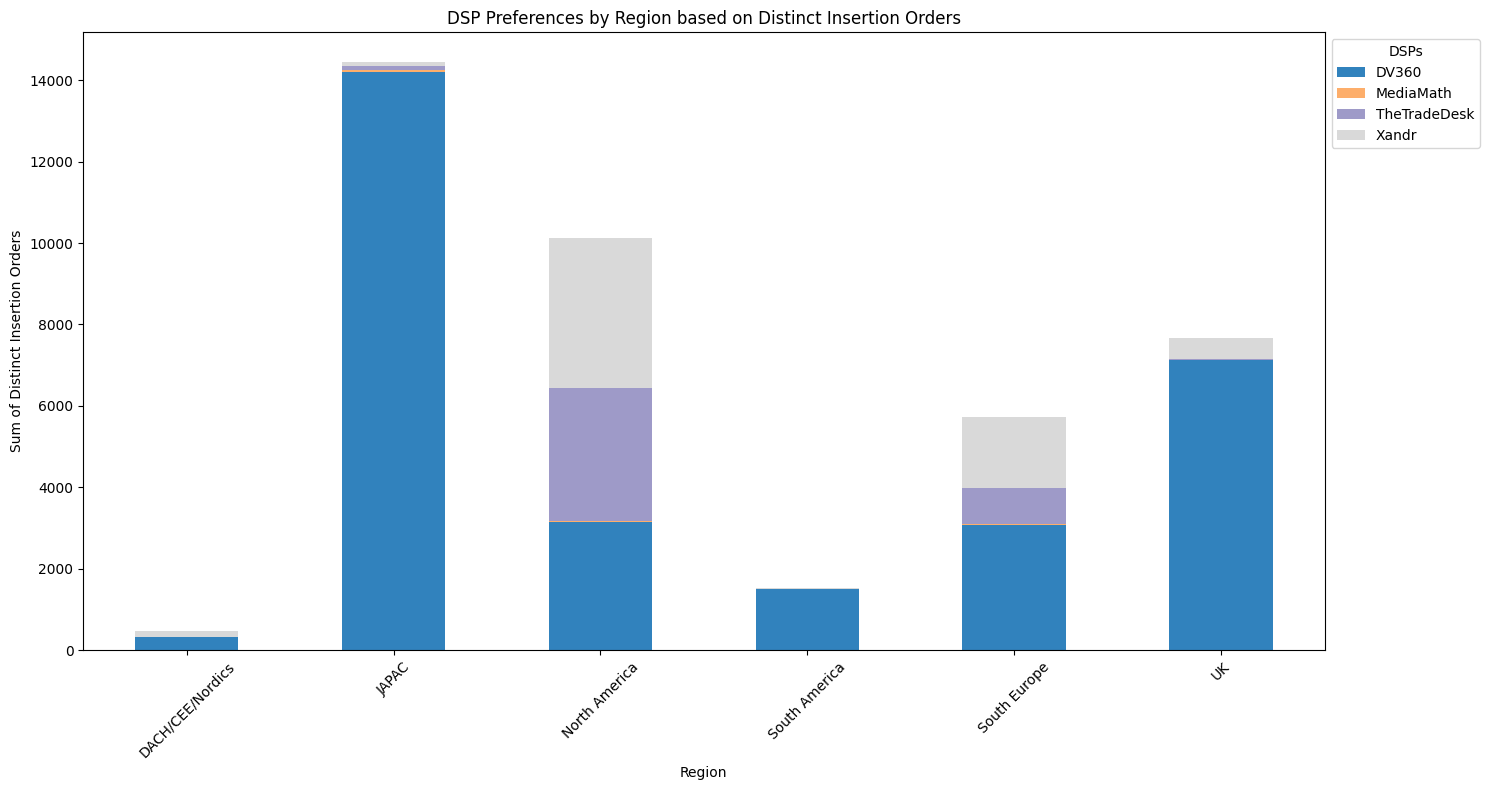

In [ ]:
# Plotting the DSP preferences per region
dsp_by_region.plot(kind='bar', figsize=(15, 8), stacked=True, colormap='tab20c')

plt.title('DSP Preferences by Region based on Distinct Insertion Orders')
plt.ylabel('Sum of Distinct Insertion Orders')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='DSPs', loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


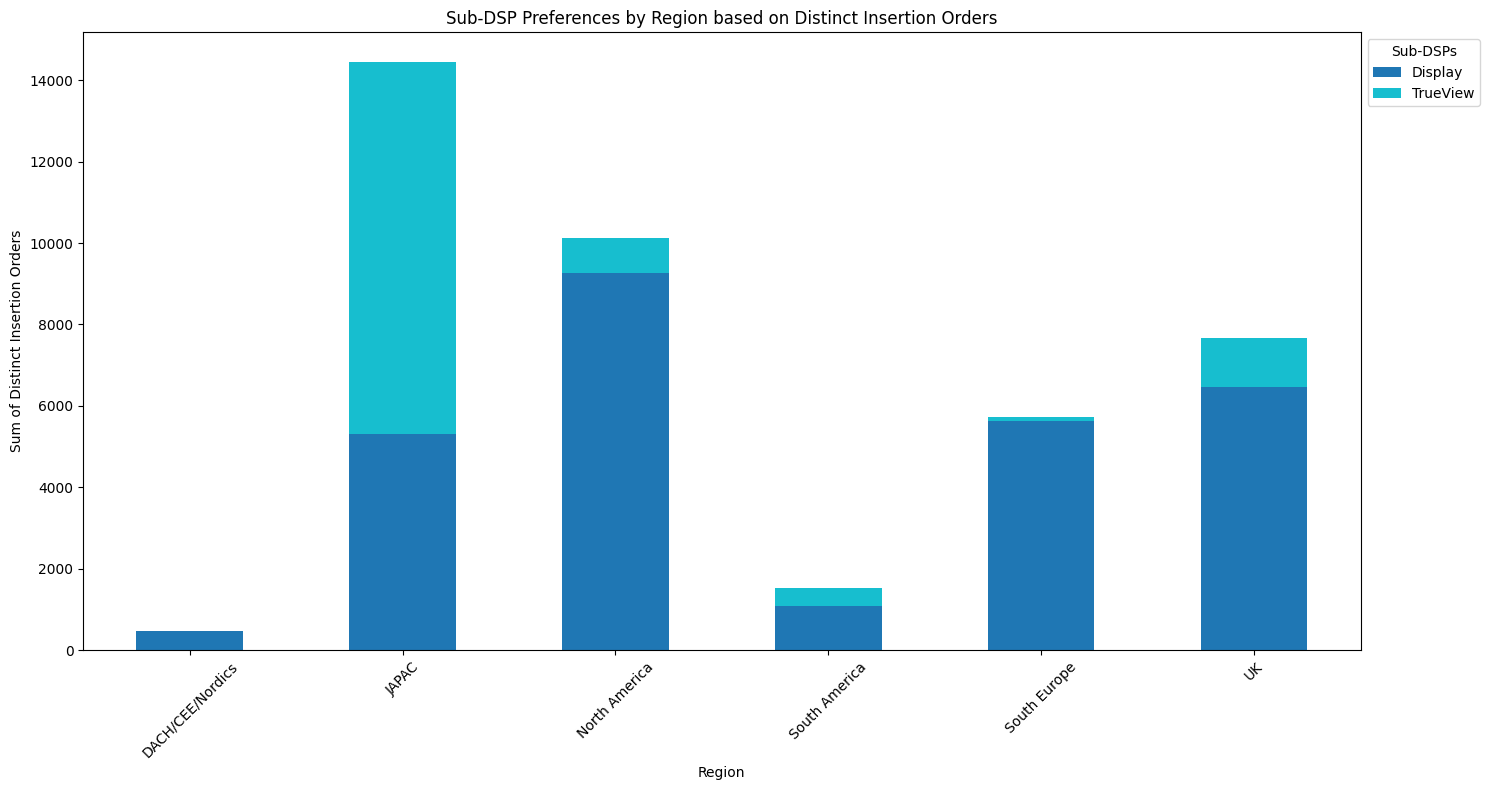

In [ ]:
# Plotting the Sub-DSP preferences per region
sub_dsp_region_preference.plot(kind='bar', figsize=(15, 8), stacked=True, colormap='tab10')

plt.title('Sub-DSP Preferences by Region based on Distinct Insertion Orders')
plt.ylabel('Sum of Distinct Insertion Orders')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Sub-DSPs', loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## Insertion orders distribution by KPI and DSP

In [ ]:
# Aggregating data by DSP and KPI based on 'Insertion Orders Distinct Count of IOs'
kpi_dsp_aggregation = (scibids_active
                       .groupby(['Accessible IDs Dsp', 'unified_KPI'])
                       ['Insertion Orders Distinct Count of IOs'].sum().unstack())

# Filling NaN values with 0 for better visualization
kpi_dsp_aggregation.fillna(0, inplace=True)
kpi_dsp_aggregation


unified_KPI             CPA  CPA_PC     CPC    CPCV  CPIAVC    CPM  CPMbumper  \
Accessible IDs Dsp                                                              
DV360               10523.0   779.0  3342.0   592.0     8.0  961.0     5704.0   
MediaMath              48.0     0.0    34.0     0.0     0.0    3.0        0.0   
TheTradeDesk          450.0     4.0   144.0  1280.0     0.0  777.0        0.0   
Xandr                2899.0   194.0   665.0   212.0     0.0  301.0        0.0   

unified_KPI         CPVideoView     CTR  V-CPM    VTR  
Accessible IDs Dsp                                     
DV360                    5987.0   989.0  337.0  168.0  
MediaMath                   0.0    13.0    0.0    6.0  
TheTradeDesk                0.0    68.0  915.0  629.0  
Xandr                       0.0  1782.0   33.0  111.0

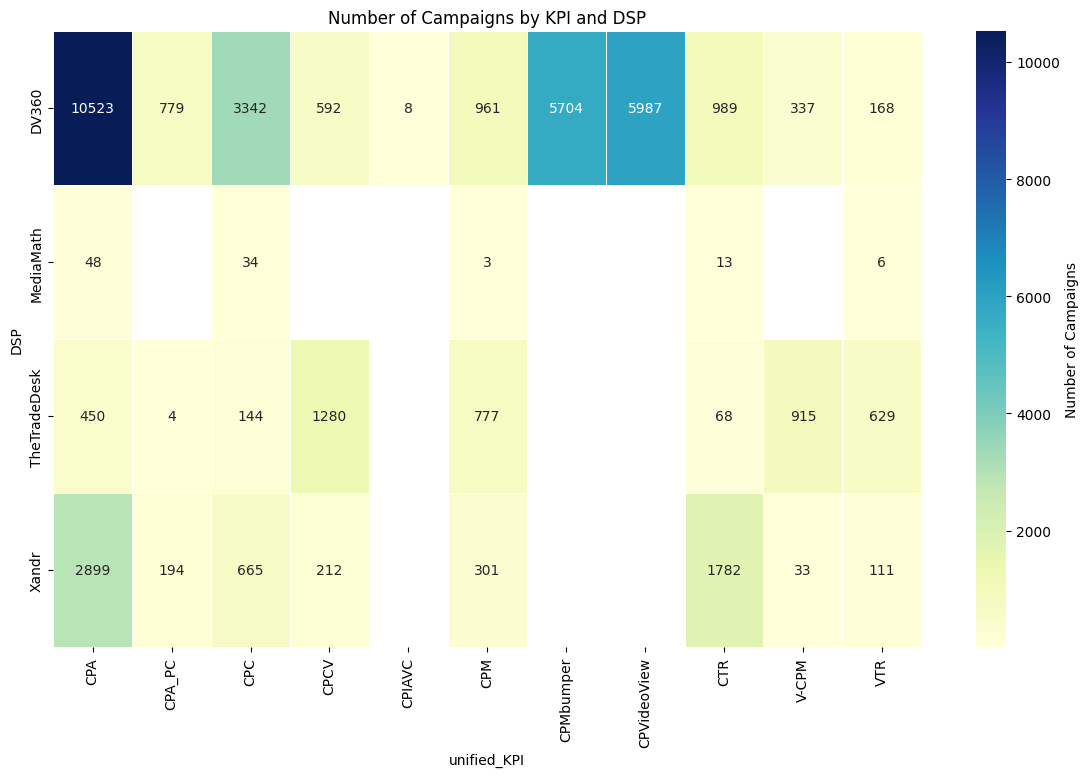

In [ ]:
# Plotting heatmap for KPIs by DSP based on 'Insertion Orders Distinct Count of IOs'


# Modifying the heatmap code to not show values that are 0

plt.figure(figsize=(14, 8))
sns.heatmap(kpi_dsp_aggregation, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5,
            cbar_kws={'label': 'Number of Campaigns'},
            mask=kpi_dsp_aggregation == 0)  # Using a mask to hide 0 values
plt.title('Number of Campaigns by KPI and DSP')
plt.xlabel('unified_KPI')
plt.ylabel('DSP')
plt.show()


In [ ]:

# Aggregating data by Region, DSP, and KPI based on 'Insertion Orders Distinct Count of IOs'
kpi_dsp_region_aggregation = (scibids_active
                       .groupby(['Clients Characteristics Scibids Region', 'Accessible IDs Dsp', 'Insertion Orders Kpi to Optimize'])
                       ['Insertion Orders Distinct Count of IOs'].sum().unstack())

# Filling NaN values with 0 for better visualization
kpi_dsp_region_aggregation.fillna(0, inplace=True)
kpi_dsp_region_aggregation


Insertion Orders Kpi to Optimize                              CPA  CPA_PC  \
Clients Characteristics Scibids Region Accessible IDs Dsp                   
DACH/CEE/Nordics                       DV360                 57.0     4.0   
                                       Xandr                  1.0     2.0   
JAPAC                                  DV360               2108.0    61.0   
                                       MediaMath             17.0     0.0   
                                       TheTradeDesk          13.0     0.0   
                                       Xandr                 37.0     0.0   
North America                          DV360               1306.0   105.0   
                                       MediaMath             17.0     0.0   
                                       TheTradeDesk         252.0     4.0   
                                       Xandr               1663.0    28.0   
South America                          DV360                134.0    42.0   
                                       Xandr                  1.0     0.0   
South Europe                           DV360               1435.0   467.0   
                                       MediaMath              1.0     0.0   
                                       TheTradeDesk         185.0     0.0   
                                       Xandr                844.0    34.0   
UK                                     DV360               5483.0   100.0   
                                       MediaMath             13.0     0.0   
                                       TheTradeDesk           0.0     0.0   
                                       Xandr                353.0   130.0   

Insertion Orders Kpi to Optimize                              CPC    CPCV  \
Clients Characteristics Scibids Region Accessible IDs Dsp                   
DACH/CEE/Nordics                       DV360                 14.0     0.0   
                                       Xandr                 21.0     2.0   
JAPAC                                  DV360               2214.0   129.0   
                                       MediaMath             34.0     0.0   
                                       TheTradeDesk          33.0    22.0   
                                       Xandr                  2.0     0.0   
North America                          DV360                191.0   170.0   
                                       MediaMath              0.0     0.0   
                                       TheTradeDesk          85.0  1147.0   
                                       Xandr                165.0    82.0   
South America                          DV360                147.0   221.0   
                                       Xandr                  1.0     0.0   
South Europe                           DV360                745.0    12.0   
                                       MediaMath              0.0     0.0   
                                       TheTradeDesk           8.0   107.0   
                                       Xandr                471.0   128.0   
UK                                     DV360                 31.0    60.0   
                                       MediaMath              0.0     0.0   
                                       TheTradeDesk          18.0     4.0   
                                       Xandr                  5.0     0.0   

Insertion Orders Kpi to Optimize                           CPIAVC    CPM  \
Clients Characteristics Scibids Region Accessible IDs Dsp                  
DACH/CEE/Nordics                       DV360                  0.0   28.0   
                                       Xandr                  0.0    2.0   
JAPAC                                  DV360                  0.0  311.0   
                                       MediaMath              0.0    3.0   
                                       TheTradeDesk           0.0    6.0   
                                       Xandr                  0.0    0.0   
No

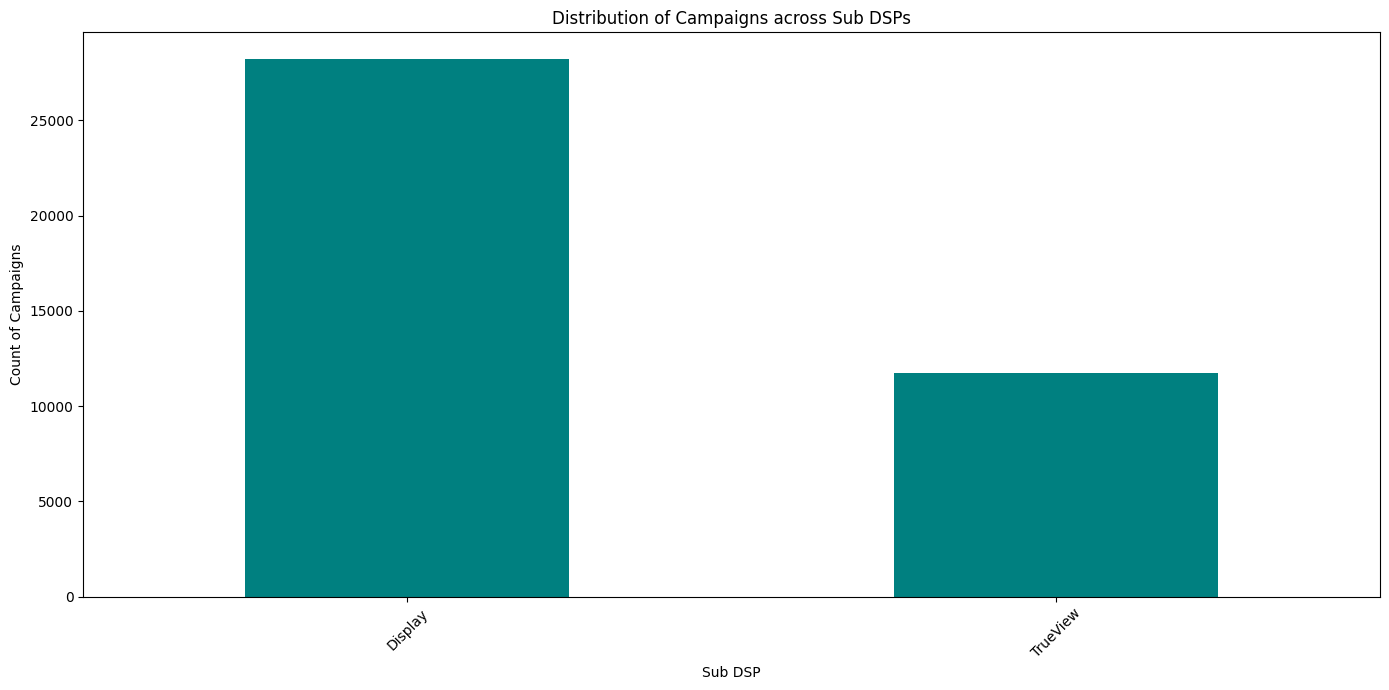

In [ ]:
# Grouping by Sub DSP to see the distribution of campaigns
campaigns_sub_dsp = scibids_active.groupby('Accessible IDs Sub Dsp')['Insertion Orders Distinct Count of IOs'].sum()

# Plotting
plt.figure(figsize=(14, 7))
campaigns_sub_dsp.sort_values(ascending=False).plot(kind='bar', color='teal')

plt.title('Distribution of Campaigns across Sub DSPs')
plt.xlabel('Sub DSP')
plt.ylabel('Count of Campaigns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Revenue analysis

## Revenue by typology and insertion orders count

In [ ]:
# Grouping by Typology and aggregating the number of campaigns and revenue
typology_aggregated = scibids_active.groupby('Clients Characteristics Typology').agg({
    'Insertion Orders Distinct Count of IOs': 'sum',
    'Performance Measures Revenue USD': 'sum'
}).reset_index()

# Sorting by Revenue for better visualization
typology_aggregated = typology_aggregated.sort_values(by='Performance Measures Revenue USD', ascending=False)

typology_aggregated


Clients Characteristics Typology  Insertion Orders Distinct Count of IOs  \
7                              ITD                                   19489   
5                   Big6 - Omnicom                                    2539   
2            Big6 - GroupM (Xaxis)                                    8340   
0                    Big6 - Dentsu                                    3176   
1                    Big6 - GroupM                                    1584   
8                         MARKETER                                    1571   
6                  Big6 - Publicis                                    1695   
4               Big6 - Interpublic                                    1181   
3                     Big6 - Havas                                     329   

   Performance Measures Revenue USD  
7                      9.227571e+07  
5                      7.137379e+07  
2                      3.929611e+07  
0                      2.343000e+07  
1                      2.070403e+07  
8                      1.806711e+07  
6                      8.973781e+06  
4                      7.876788e+06  
3                      2.077159e+06

In [ ]:
revenue_per_month = scibids_active.groupby(['Performance Measures Day Tz Month', 'Clients Characteristics Typology', 'Insertion Orders Distinct Count of IOs'])['Performance Measures Revenue USD'].sum()
revenue_per_month

Performance Measures Day Tz Month  Clients Characteristics Typology  Insertion Orders Distinct Count of IOs
2022-01-01                         Big6 - Dentsu                     1                                         166159.868477
                                                                     2                                          51161.533227
                                                                     3                                          17621.171998
                                                                     4                                          45544.667584
                                                                     8                                          47643.648643
                                                                                                                   ...      
2023-09-01                         MARKETER                          3                                         106912.219264
                 

## Total & Normalised Revenue Distribution per DSP by Typology

In [ ]:
## Total


# Group by both Typology and DSP to calculate the revenue for each combination
revenue_distribution_dsp_typology = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp'])['Performance Measures Revenue USD'].sum().reset_index()

# Calculate the total revenue per typology for normalization
total_revenue_per_typology = revenue_distribution_dsp_typology.groupby('Clients Characteristics Typology')['Performance Measures Revenue USD'].transform('sum')

# Calculate the percentage of total revenue for each DSP within each typology
revenue_distribution_dsp_typology['% of Total Revenue per Typology'] = (revenue_distribution_dsp_typology['Performance Measures Revenue USD'] / total_revenue_per_typology) * 100

# Sort the data by typology and then by percentage revenue in descending order
revenue_distribution_dsp_typology = revenue_distribution_dsp_typology.sort_values(by=['Clients Characteristics Typology', '% of Total Revenue per Typology'], ascending=[True, False])

revenue_distribution_dsp_typology




Clients Characteristics Typology Accessible IDs Dsp  \
0                     Big6 - Dentsu              DV360   
1                     Big6 - Dentsu       TheTradeDesk   
2                     Big6 - Dentsu              Xandr   
3                     Big6 - GroupM              DV360   
4                     Big6 - GroupM       TheTradeDesk   
5                     Big6 - GroupM              Xandr   
6             Big6 - GroupM (Xaxis)              DV360   
8             Big6 - GroupM (Xaxis)              Xandr   
7             Big6 - GroupM (Xaxis)       TheTradeDesk   
9                      Big6 - Havas              DV360   
10                     Big6 - Havas          MediaMath   
11               Big6 - Interpublic              DV360   
12               Big6 - Interpublic       TheTradeDesk   
14                   Big6 - Omnicom       TheTradeDesk   
13                   Big6 - Omnicom              DV360   
15                  Big6 - Publicis              DV360   
17                  Big6 - Publicis              Xandr   
16                  Big6 - Publicis       TheTradeDesk   
18                              ITD              DV360   
21                              ITD              Xandr   
20                              ITD       TheTradeDesk   
19                              ITD          MediaMath   
22                         MARKETER              DV360   
24                         MARKETER       TheTradeDesk   
25                         MARKETER              Xandr   
23                         MARKETER          MediaMath   

    Performance Measures Revenue USD  % of Total Revenue per Typology  
0                       1.543314e+07                        65.869147  
1                       6.777443e+06                        28.926348  
2                       1.219415e+06                         5.204504  
3                       1.172123e+07                        56.613275  
4                       8.979276e+06                        43.369703  
5                       3.524266e+03                         0.017022  
6                       3.531483e+07                        89.868535  
8                       2.064686e+06                         5.254175  
7                       1.916585e+06                         4.877290  
9                       2.028432e+06                        97.654161  
10                      4.872680e+04                         2.345839  
11                      7.020528e+06                        89.129323  
12                      8.562602e+05                        10.870677  
14                      7.047489e+07                        98.740577  
13                      8.988978e+05                         1.259423  
15                      5.885449e+06                        65.584943  
17                      2.587282e+06                        28.831569  
16                      5.010501e+05                         5.583489  
18                      4.685899e+07                        50.781501  
21                      3.287962e+07                        35.631930  
20                      1.214107e+07                        13.157380  
19                      3.960377e+05                         0.429190  
22                      1.496618e+07                        82.836597  
24                      2.529761e+06                        14.002025  
25                      5.057207e+05                         2.799124  
23                      6.544887e+04                         0.362254

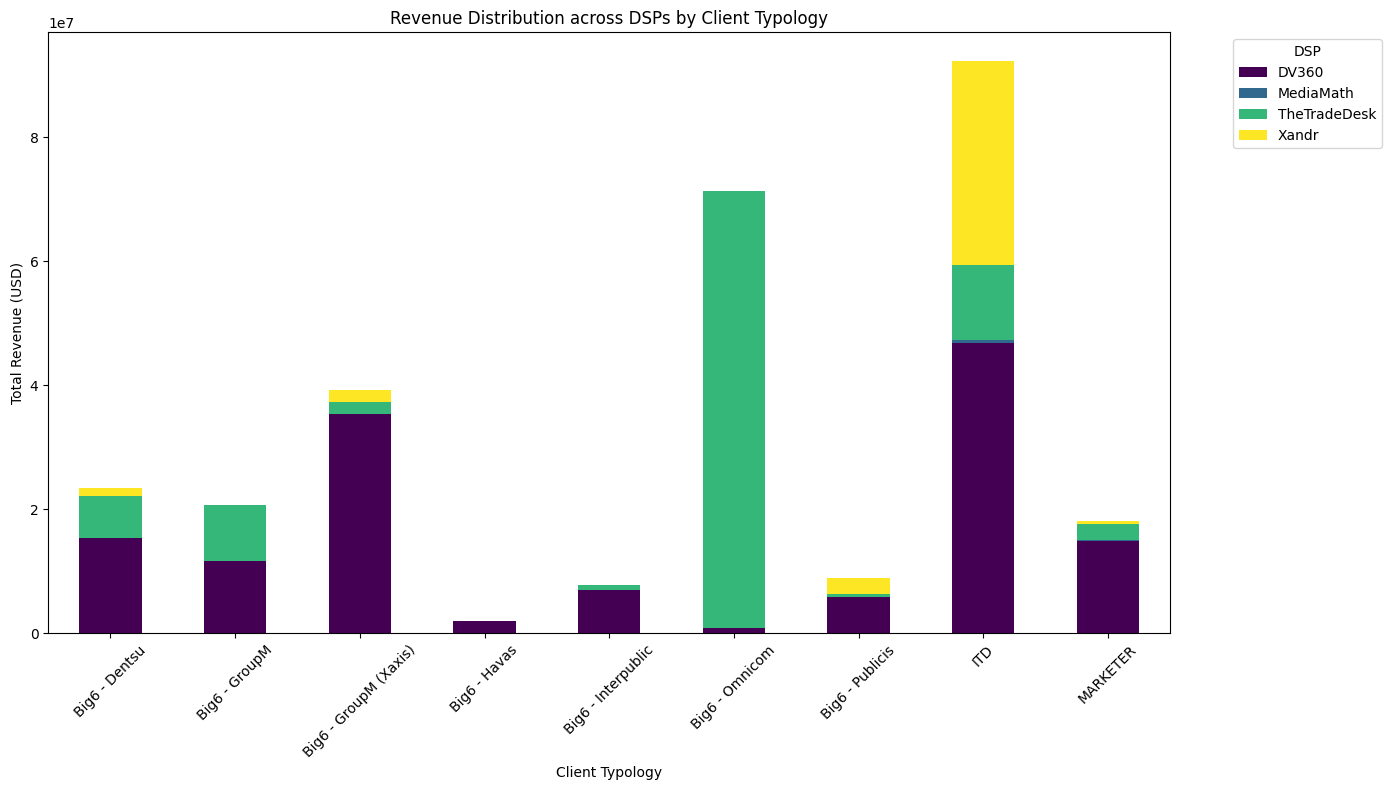

In [ ]:
# Grouping data by client typology and DSP, then summing the revenue
revenue_by_typology_dsp = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp'])['Performance Measures Revenue USD'].sum().unstack().fillna(0)

# Visualizing the revenue distribution across DSPs for each client typology
revenue_by_typology_dsp.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Revenue Distribution across DSPs by Client Typology')
plt.xlabel('Client Typology')
plt.ylabel('Total Revenue (USD)')
plt.legend(title='DSP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


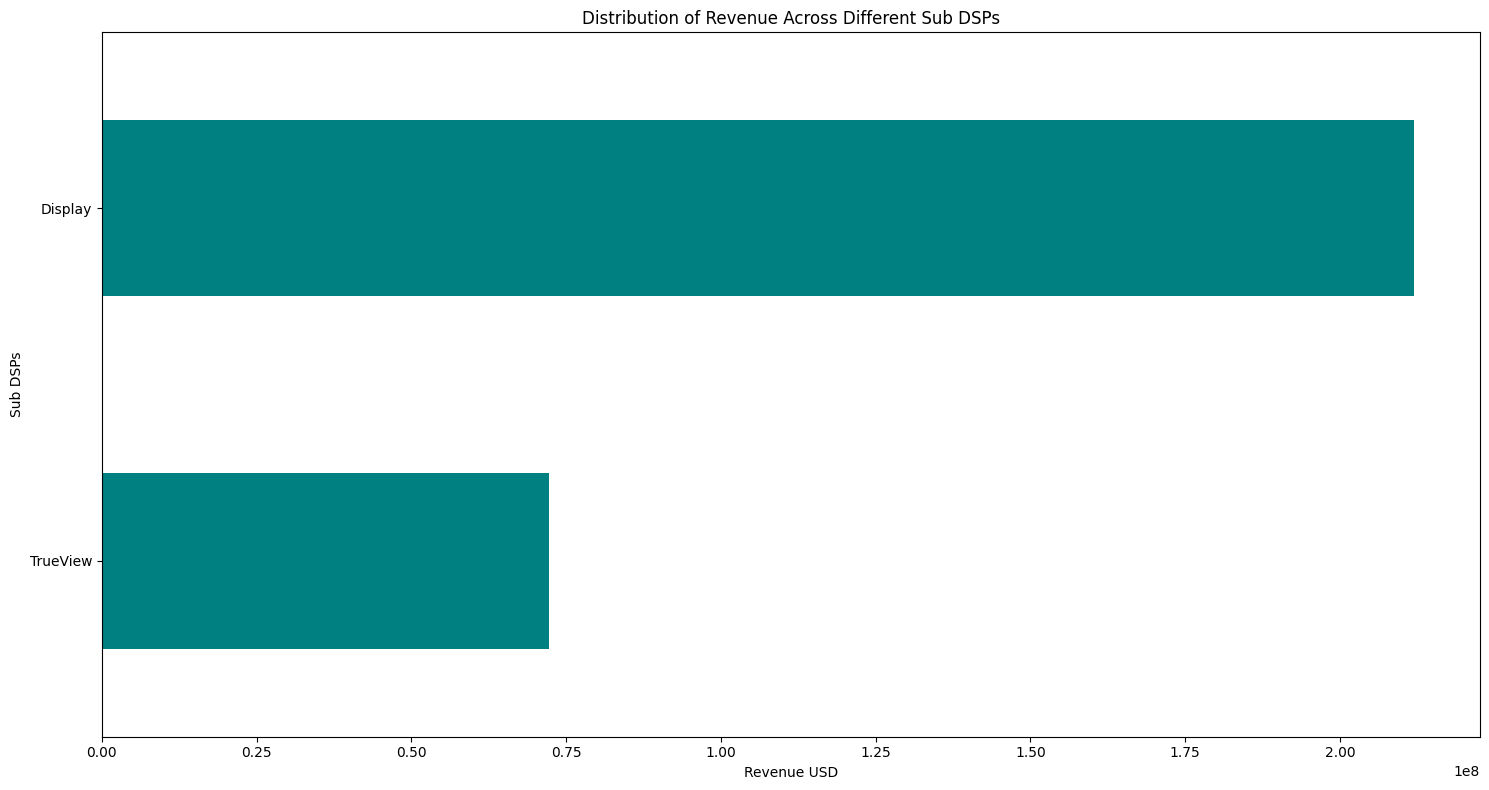

In [ ]:
# Group by Sub DSPs and sum the revenue
sub_dsp_revenue = scibids_active.groupby('Accessible IDs Sub Dsp')['Performance Measures Revenue USD'].sum()

# Sorting the values for better visualization
sub_dsp_revenue_sorted = sub_dsp_revenue.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
sub_dsp_revenue_sorted.plot(kind='barh', color='teal')
plt.title('Distribution of Revenue Across Different Sub DSPs')
plt.xlabel('Revenue USD')
plt.ylabel('Sub DSPs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<ipython-input-55-6bb92318df1b>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = revenue_distribution_dsp_typology.pivot('Clients Characteristics Typology', 'Accessible IDs Dsp', '% of Total Revenue per Typology').fillna(0)


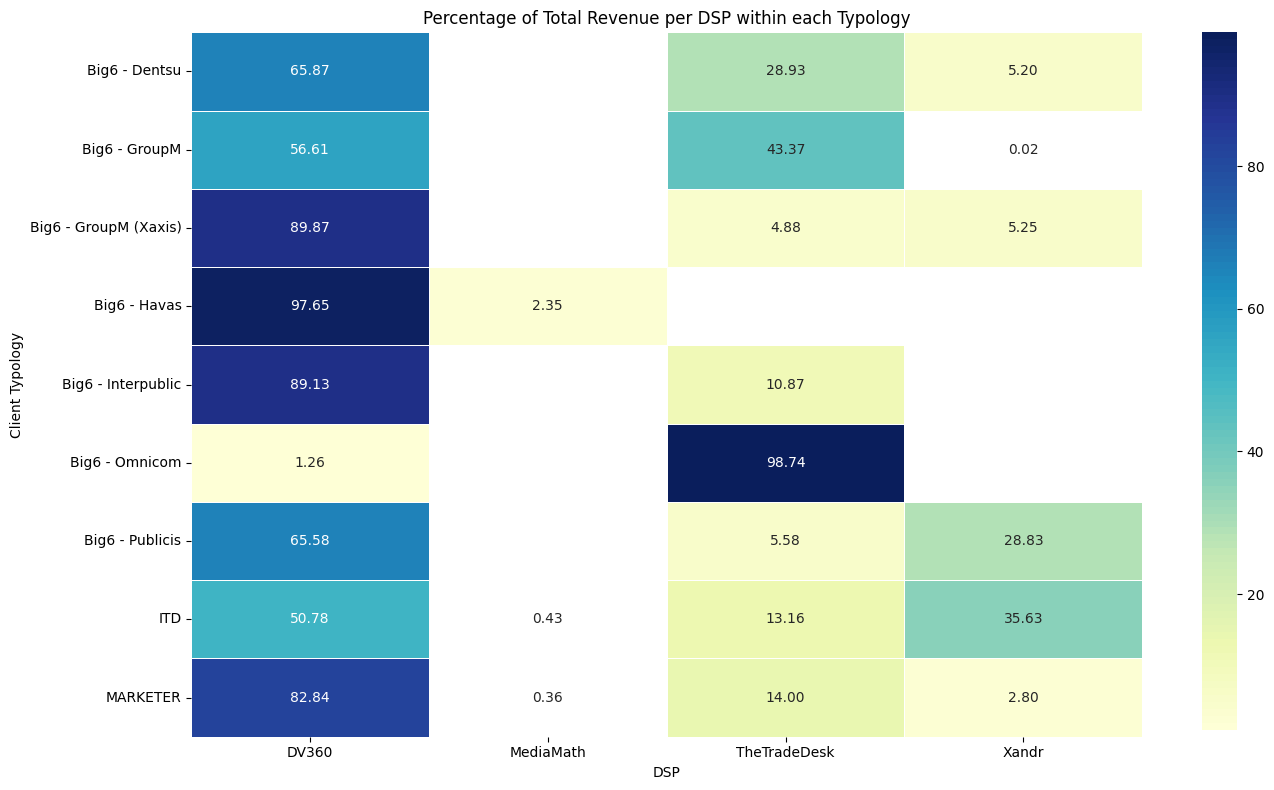

In [ ]:
# Heatmap
from matplotlib.colors import ListedColormap

# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data = revenue_distribution_dsp_typology.pivot('Clients Characteristics Typology', 'Accessible IDs Dsp', '% of Total Revenue per Typology').fillna(0)

# Plotting the heatmap
mask = heatmap_data == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=annotations, cmap=cmap, fmt="", linewidths=.5, mask=mask)
plt.title('Percentage of Total Revenue per DSP within each Typology')
plt.xlabel('DSP')
plt.ylabel('Client Typology')
plt.tight_layout()
plt.show()


In [ ]:
## Per insertion order

# Group by both Typology and DSP to calculate the normalized revenue for each combination
normalised_revenue_distribution_dsp_typology = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp'])\
    .apply(lambda x: x['Performance Measures Revenue USD'].sum() / x['Insertion Orders Distinct Count of IOs'].sum()).reset_index()

normalised_revenue_distribution_dsp_typology.columns = ['Clients Characteristics Typology', 'Accessible IDs Dsp', 'Normalized Revenue']

# Calculate the total normalized revenue per typology for normalization
total_normalized_revenue_per_typology = normalised_revenue_distribution_dsp_typology.groupby('Clients Characteristics Typology')['Normalized Revenue'].transform('sum')

# Calculate the percentage of total normalized revenue for each DSP within each typology
normalised_revenue_distribution_dsp_typology['% of Total Normalized Revenue per Typology'] = (normalised_revenue_distribution_dsp_typology['Normalized Revenue'] / total_normalized_revenue_per_typology) * 100

normalised_revenue_distribution_dsp_typology


Clients Characteristics Typology Accessible IDs Dsp  Normalized Revenue  \
0                     Big6 - Dentsu              DV360         7171.533256   
1                     Big6 - Dentsu       TheTradeDesk         9879.654093   
2                     Big6 - Dentsu              Xandr         3607.737227   
3                     Big6 - GroupM              DV360        10540.673339   
4                     Big6 - GroupM       TheTradeDesk        19227.571469   
5                     Big6 - GroupM              Xandr          704.853111   
6             Big6 - GroupM (Xaxis)              DV360         4506.742552   
7             Big6 - GroupM (Xaxis)       TheTradeDesk         7575.434825   
8             Big6 - GroupM (Xaxis)              Xandr         8225.841659   
9                      Big6 - Havas              DV360         6480.614148   
10                     Big6 - Havas          MediaMath         3045.425311   
11               Big6 - Interpublic              DV360         6279.541990   
12               Big6 - Interpublic       TheTradeDesk        13591.432350   
13                   Big6 - Omnicom              DV360         5618.111472   
14                   Big6 - Omnicom       TheTradeDesk        29623.746300   
15                  Big6 - Publicis              DV360         4372.547752   
16                  Big6 - Publicis       TheTradeDesk         8492.374204   
17                  Big6 - Publicis              Xandr         8921.661719   
18                              ITD              DV360         3358.585818   
19                              ITD          MediaMath         5013.135085   
20                              ITD       TheTradeDesk        37940.829750   
21                              ITD              Xandr         6399.302416   
22                         MARKETER              DV360        11028.871146   
23                         MARKETER          MediaMath         7272.096413   
24                         MARKETER       TheTradeDesk        84325.367415   
25                         MARKETER              Xandr         2889.832719   

    % of Total Normalized Revenue per Typology  
0                                    34.713972  
1                                    47.822693  
2                                    17.463335  
3                                    34.590094  
4                                    63.096872  
5                                     2.313034  
6                                    22.191936  
7                                    37.302677  
8                                    40.505387  
9                                    68.030520  
10                                   31.969480  
11                                   31.601581  
12                                   68.398419  
13                                   15.941587  
14                                   84.058413  
15                                   20.069910  
16                                   38.979834  
17                                   40.950256  
18                                    6.371595  
19                                    9.510451  
20                                   71.977795  
21                                   12.140158  
22                                   10.452305  
23                                    6.891926  
24                                   79.917011  
25                                    2.738758

<ipython-input-57-8c6bd7251daf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_dsp = normalised_revenue_distribution_dsp_typology.pivot('Clients Characteristics Typology', 'Accessible IDs Dsp', '% of Total Normalized Revenue per Typology').fillna(0)


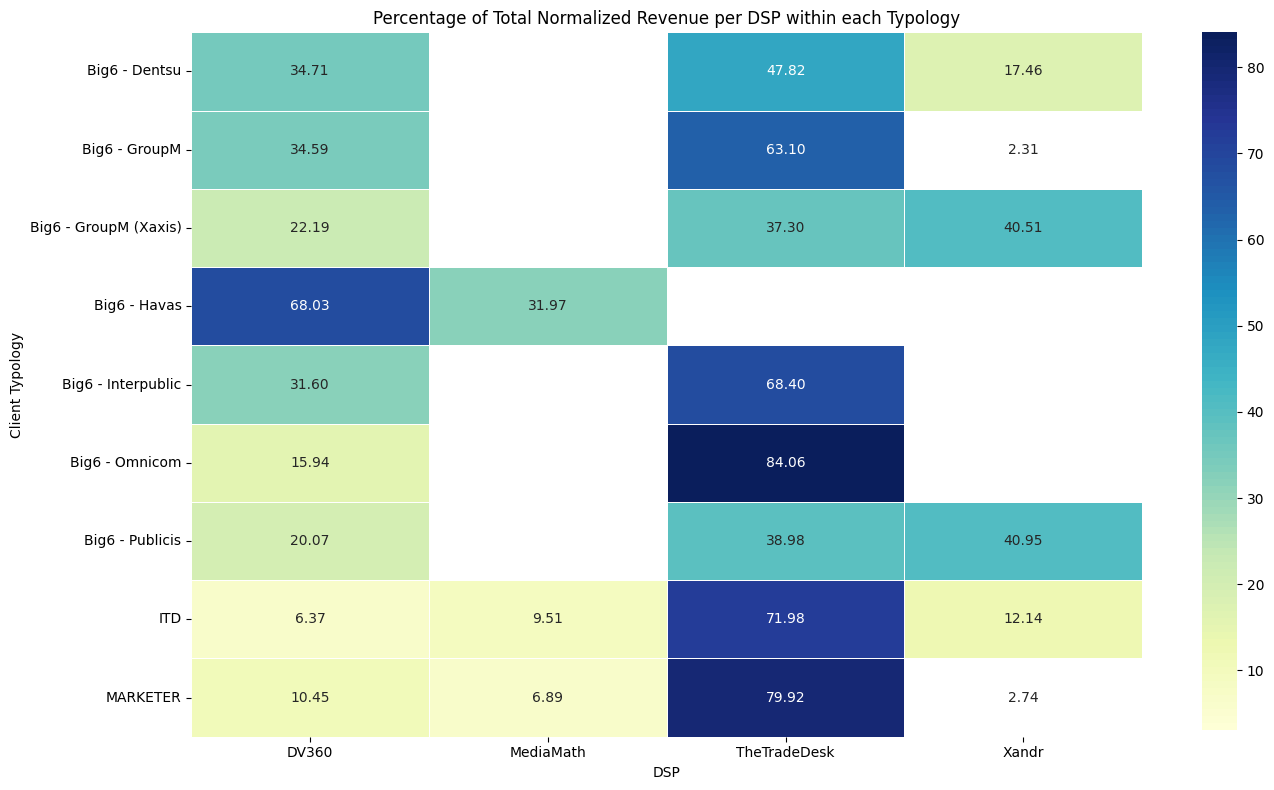

In [ ]:
# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_dsp = normalised_revenue_distribution_dsp_typology.pivot('Clients Characteristics Typology', 'Accessible IDs Dsp', '% of Total Normalized Revenue per Typology').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_dsp == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_dsp.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_dsp, annot=annotations, cmap=cmap, fmt="", linewidths=.5, mask=mask)
plt.title('Percentage of Total Normalized Revenue per DSP within each Typology')
plt.xlabel('DSP')
plt.ylabel('Client Typology')
plt.tight_layout()
plt.show()

## Total & Normalised Revenue Distribution per DSP by Region

In [ ]:
## Total

# Group by both Region and DSP to calculate the revenue for each combination
revenue_distribution_dsp_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Accessible IDs Dsp'])['Performance Measures Revenue USD'].sum().reset_index()

# Calculate the total revenue per region for normalization
total_revenue_per_region = revenue_distribution_dsp_region.groupby('Clients Characteristics Scibids Region')['Performance Measures Revenue USD'].transform('sum')

# Calculate the percentage of total revenue for each DSP within each region
revenue_distribution_dsp_region['% of Total Revenue per Region'] = (revenue_distribution_dsp_region['Performance Measures Revenue USD'] / total_revenue_per_region) * 100

revenue_distribution_dsp_region


Clients Characteristics Scibids Region Accessible IDs Dsp  \
0                        DACH/CEE/Nordics              DV360   
1                        DACH/CEE/Nordics              Xandr   
2                                   JAPAC              DV360   
3                                   JAPAC          MediaMath   
4                                   JAPAC       TheTradeDesk   
5                                   JAPAC              Xandr   
6                           North America              DV360   
7                           North America          MediaMath   
8                           North America       TheTradeDesk   
9                           North America              Xandr   
10                          South America              DV360   
11                          South America              Xandr   
12                           South Europe              DV360   
13                           South Europe          MediaMath   
14                           South Europe       TheTradeDesk   
15                           South Europe              Xandr   
16                                     UK              DV360   
17                                     UK          MediaMath   
18                                     UK       TheTradeDesk   
19                                     UK              Xandr   

    Performance Measures Revenue USD  % of Total Revenue per Region  
0                       3.600946e+05                      43.549163  
1                       4.667746e+05                      56.450837  
2                       5.167096e+07                      97.274845  
3                       1.459942e+05                       0.274846  
4                       4.193874e+05                       0.789531  
5                       8.821806e+05                       1.660778  
6                       3.965126e+07                      24.454094  
7                       2.500435e+05                       0.154209  
8                       9.577261e+07                      59.065778  
9                       2.647177e+07                      16.325918  
10                      9.886192e+06                      98.864811  
11                      1.135156e+05                       1.135189  
12                      1.280298e+07                      42.779781  
13                      4.614689e+04                       0.154195  
14                      7.918968e+06                      26.460374  
15                      9.159552e+06                      30.605650  
16                      2.583953e+07                      91.510296  
17                      6.802878e+04                       0.240923  
18                      1.627381e+05                       0.576335  
19                      2.166449e+06                       7.672446

<ipython-input-59-6fb12befe674>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_region = revenue_distribution_dsp_region.pivot('Clients Characteristics Scibids Region', 'Accessible IDs Dsp', '% of Total Revenue per Region').fillna(0)


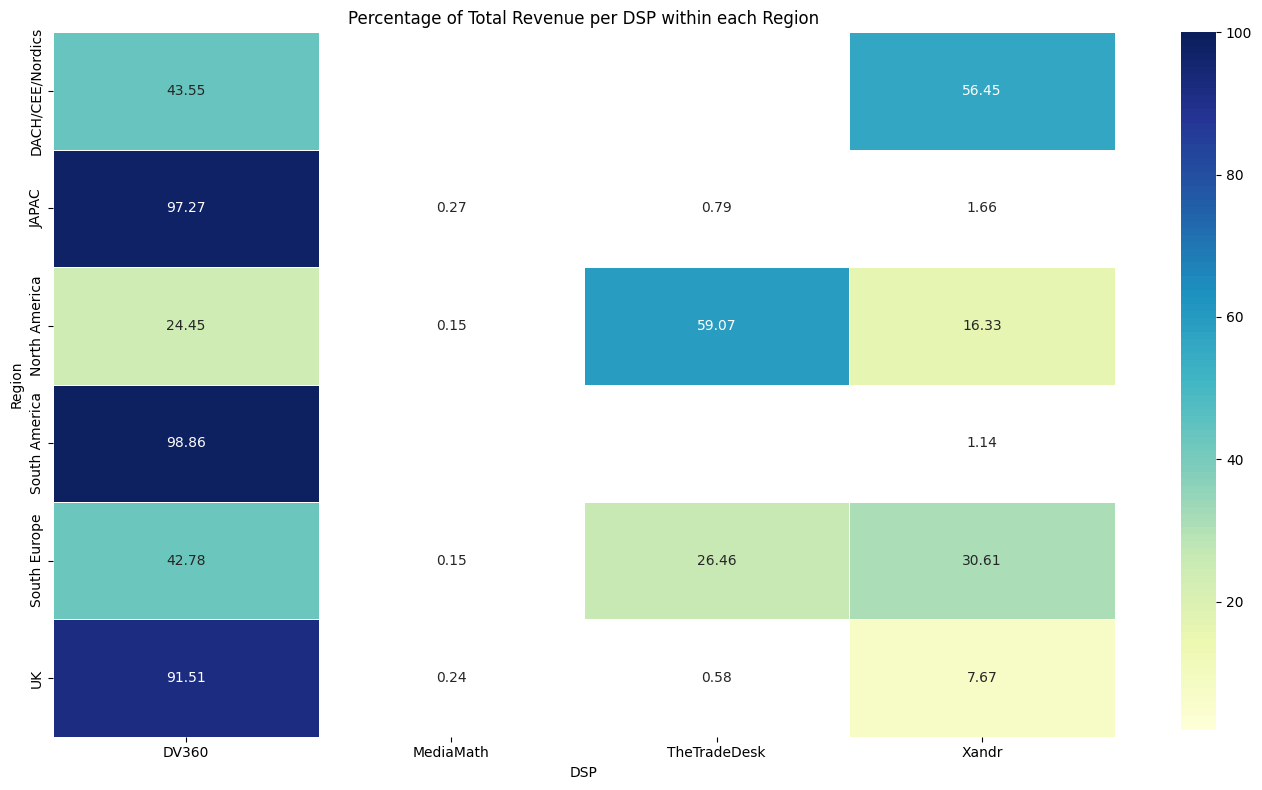

In [ ]:
# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_region = revenue_distribution_dsp_region.pivot('Clients Characteristics Scibids Region', 'Accessible IDs Dsp', '% of Total Revenue per Region').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_region == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_region.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_region, annot=annotations, cmap=cmap, fmt="", linewidths=.5, vmin=1, vmax=100, mask=mask)
plt.title('Percentage of Total Revenue per DSP within each Region')
plt.xlabel('DSP')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [ ]:
## Per insertion order

# Group by both Region and DSP to calculate the normalized revenue for each combination
normalized_revenue_distribution_dsp_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Accessible IDs Dsp'])\
    .apply(lambda x: x['Performance Measures Revenue USD'].sum() / x['Insertion Orders Distinct Count of IOs'].sum()).reset_index()

normalized_revenue_distribution_dsp_region.columns = ['Clients Characteristics Scibids Region', 'Accessible IDs Dsp', 'Normalized Revenue']

# Calculate the total normalized revenue per region for normalization
total_normalized_revenue_per_region = normalized_revenue_distribution_dsp_region.groupby('Clients Characteristics Scibids Region')['Normalized Revenue'].transform('sum')

# Calculate the percentage of total normalized revenue for each DSP within each region
normalized_revenue_distribution_dsp_region['% of Total Normalized Revenue per Region'] = (normalized_revenue_distribution_dsp_region['Normalized Revenue'] / total_normalized_revenue_per_region) * 100

normalized_revenue_distribution_dsp_region


Clients Characteristics Scibids Region Accessible IDs Dsp  \
0                        DACH/CEE/Nordics              DV360   
1                        DACH/CEE/Nordics              Xandr   
2                                   JAPAC              DV360   
3                                   JAPAC          MediaMath   
4                                   JAPAC       TheTradeDesk   
5                                   JAPAC              Xandr   
6                           North America              DV360   
7                           North America          MediaMath   
8                           North America       TheTradeDesk   
9                           North America              Xandr   
10                          South America              DV360   
11                          South America              Xandr   
12                           South Europe              DV360   
13                           South Europe          MediaMath   
14                           South Europe       TheTradeDesk   
15                           South Europe              Xandr   
16                                     UK              DV360   
17                                     UK          MediaMath   
18                                     UK       TheTradeDesk   
19                                     UK              Xandr   

    Normalized Revenue  % of Total Normalized Revenue per Region  
0          1084.622354                                 24.147063  
1          3407.113756                                 75.852937  
2          3637.006863                                 18.225304  
3          2654.439537                                 13.301588  
4          4279.463234                                 21.444699  
5          9384.899533                                 47.028409  
6         12563.770610                                 21.079851  
7         10418.479049                                 17.480420  
8         29423.229977                                 49.367130  
9          7195.371589                                 12.072599  
10         6617.263632                                 68.897417  
11         2987.252605                                 31.102583  
12         4152.767968                                 18.721130  
13         3845.574167                                 17.336267  
14         8937.887609                                 40.292970  
15         5246.020694                                 23.649632  
16         3630.167199                                 19.123976  
17         5232.983284                                 27.567724  
18         5812.075975                                 30.618425  
19         4307.056060                                 22.689874

<ipython-input-61-f1e03f3429e9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_normalized_region = normalized_revenue_distribution_dsp_region.pivot('Clients Characteristics Scibids Region', 'Accessible IDs Dsp', '% of Total Normalized Revenue per Region').fillna(0)


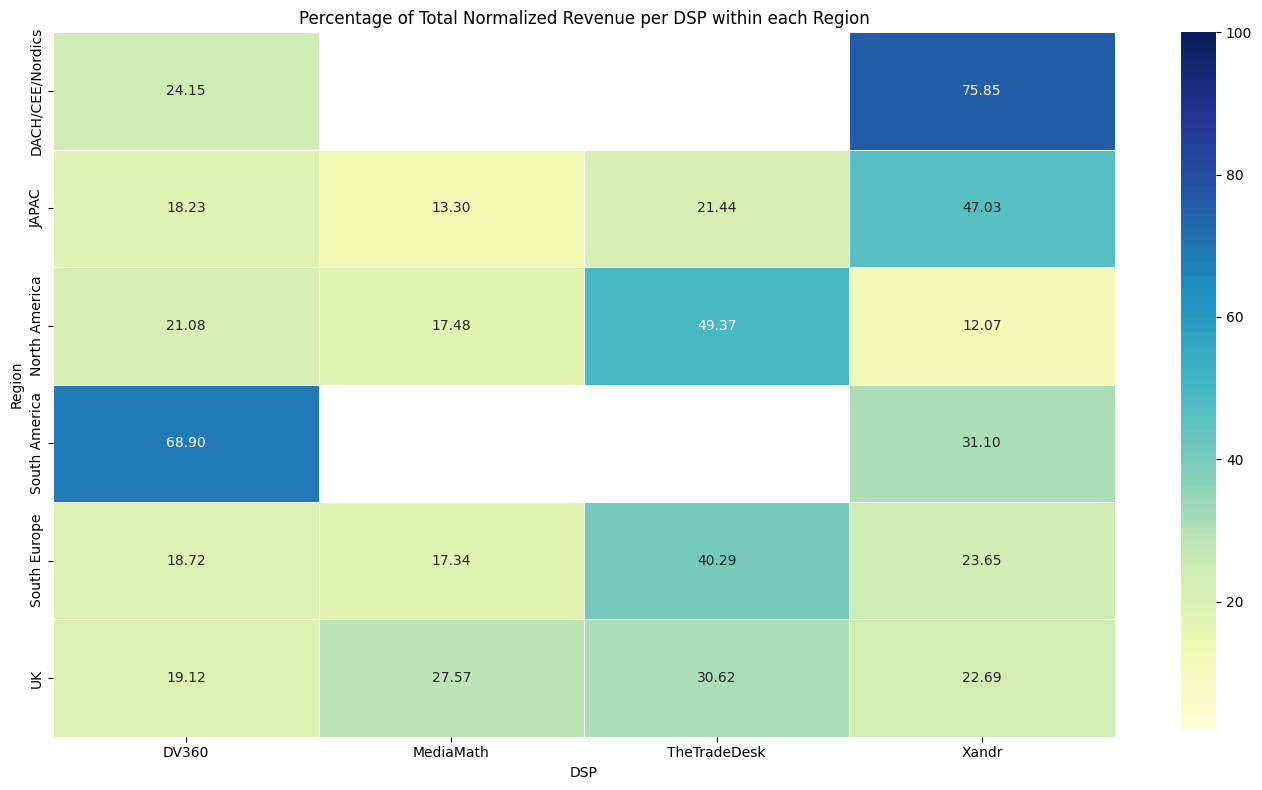

In [ ]:
# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_normalized_region = normalized_revenue_distribution_dsp_region.pivot('Clients Characteristics Scibids Region', 'Accessible IDs Dsp', '% of Total Normalized Revenue per Region').fillna(0)


# Create a mask for 0 values
mask = heatmap_data_normalized_region == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_normalized_region.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_normalized_region, annot=annotations, cmap=cmap, fmt="", linewidths=.5, vmin=1, vmax=100, mask=mask)
plt.title('Percentage of Total Normalized Revenue per DSP within each Region')
plt.xlabel('DSP')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## Total & Normalised Revenue Distribution per KPI by Typology

<ipython-input-62-c0bed0f9c2ca>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_typology_kpi = revenue_distribution_kpi_typology.pivot('Clients Characteristics Typology', 'unified_KPI', '% of Total Revenue per Typology').fillna(0)


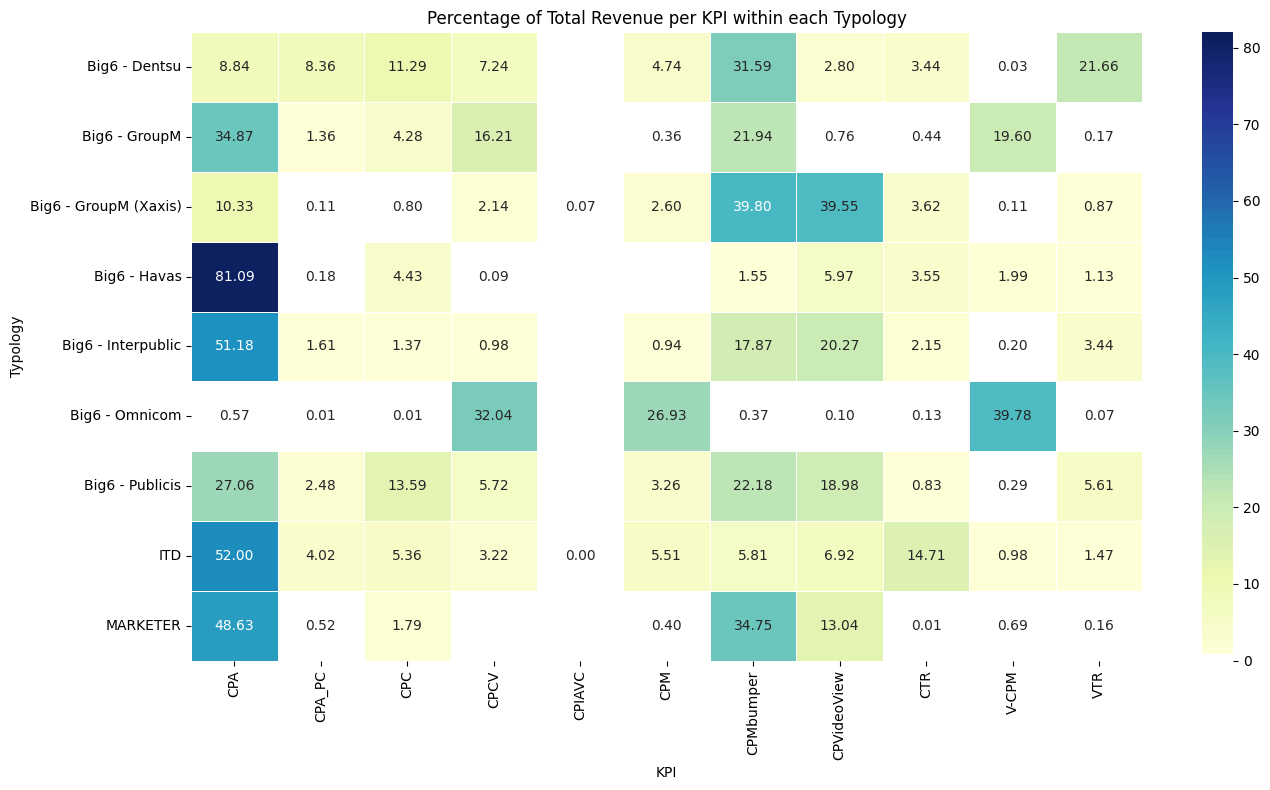

In [ ]:
## Total

# Group by both Typology and KPI to calculate the revenue for each combination
revenue_distribution_kpi_typology = scibids_active.groupby(['Clients Characteristics Typology', 'unified_KPI'])['Performance Measures Revenue USD'].sum().reset_index()

# Calculate the total revenue per typology for normalization
total_revenue_per_typology_kpi = revenue_distribution_kpi_typology.groupby('Clients Characteristics Typology')['Performance Measures Revenue USD'].transform('sum')

# Calculate the percentage of total revenue for each KPI within each typology
revenue_distribution_kpi_typology['% of Total Revenue per Typology'] = (revenue_distribution_kpi_typology['Performance Measures Revenue USD'] / total_revenue_per_typology_kpi) * 100

# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_typology_kpi = revenue_distribution_kpi_typology.pivot('Clients Characteristics Typology', 'unified_KPI', '% of Total Revenue per Typology').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_typology_kpi == 0

from matplotlib.colors import ListedColormap

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_typology_kpi.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_typology_kpi, annot=annotations, cmap=cmap, fmt="", linewidths=.5, vmin=1e-10, vmax=82, mask=mask)
plt.title('Percentage of Total Revenue per KPI within each Typology')
plt.xlabel('KPI')
plt.ylabel('Typology')
plt.tight_layout()
plt.show()


<ipython-input-63-4f2134dd4af0>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_normalized_typology_kpi = normalized_revenue_distribution_kpi_typology.pivot('Clients Characteristics Typology', 'unified_KPI', '% of Total Normalized Revenue per Typology').fillna(0)


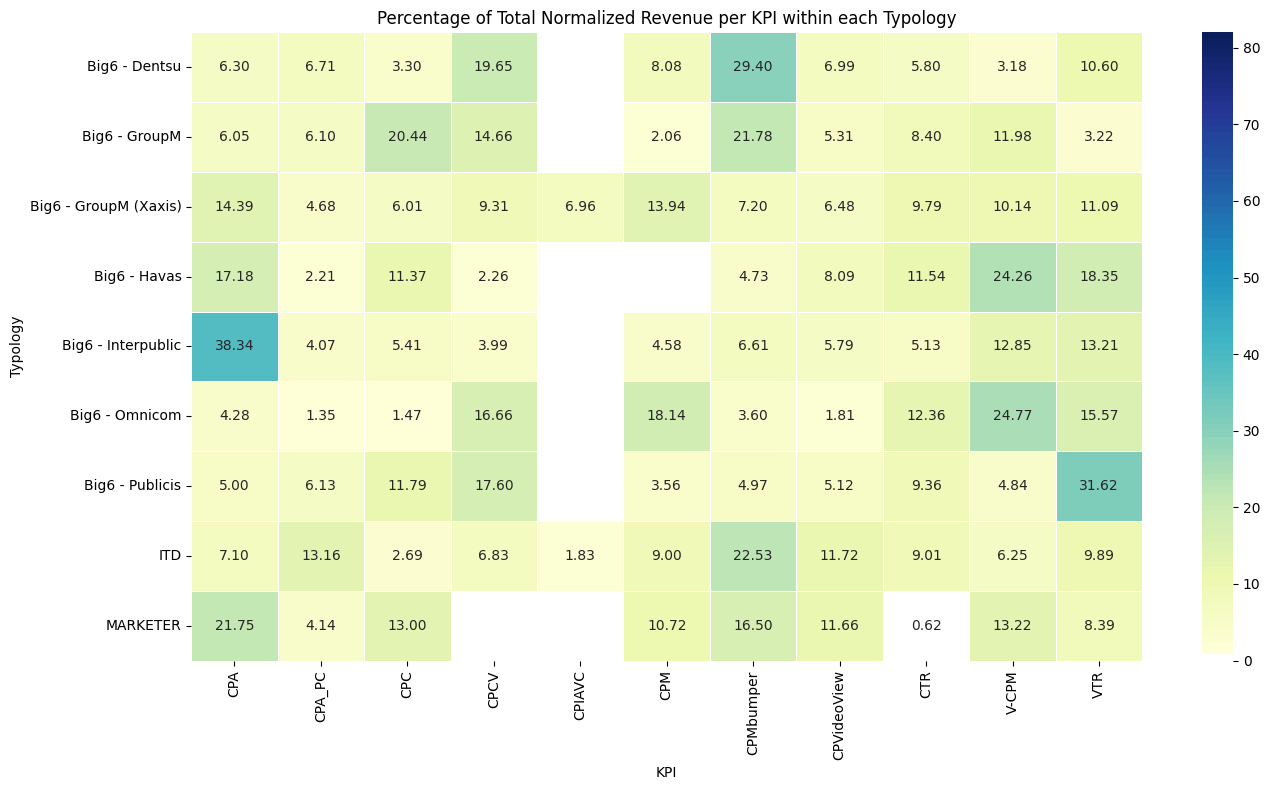

In [ ]:
## Per insertion order

# Group by both Typology and KPI to calculate the normalized revenue for each combination
normalized_revenue_distribution_kpi_typology = scibids_active.groupby(['Clients Characteristics Typology', 'unified_KPI'])\
    .apply(lambda x: x['Performance Measures Revenue USD'].sum() / x['Insertion Orders Distinct Count of IOs'].sum()).reset_index()

normalized_revenue_distribution_kpi_typology.columns = ['Clients Characteristics Typology', 'unified_KPI', 'Normalized Revenue']

# Calculate the total normalized revenue per typology for normalization
total_normalized_revenue_per_typology_kpi = normalized_revenue_distribution_kpi_typology.groupby('Clients Characteristics Typology')['Normalized Revenue'].transform('sum')

# Calculate the percentage of total normalized revenue for each KPI within each typology
normalized_revenue_distribution_kpi_typology['% of Total Normalized Revenue per Typology'] = (normalized_revenue_distribution_kpi_typology['Normalized Revenue'] / total_normalized_revenue_per_typology_kpi) * 100

# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_normalized_typology_kpi = normalized_revenue_distribution_kpi_typology.pivot('Clients Characteristics Typology', 'unified_KPI', '% of Total Normalized Revenue per Typology').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_normalized_typology_kpi == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_normalized_typology_kpi.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_normalized_typology_kpi, annot=annotations, cmap=cmap, fmt="", linewidths=.5, vmin=1e-10, vmax=82, mask=mask)
plt.title('Percentage of Total Normalized Revenue per KPI within each Typology')
plt.xlabel('KPI')
plt.ylabel('Typology')
plt.tight_layout()
plt.show()


## Total & Normalised Revenue Distribution per KPI by Region

In [ ]:
## Total

# Group by both Region and KPI to calculate the revenue for each combination
revenue_distribution_kpi_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'unified_KPI'])['Performance Measures Revenue USD'].sum().reset_index()

# Calculate the total revenue per region for normalization
total_revenue_per_region = revenue_distribution_kpi_region.groupby('Clients Characteristics Scibids Region')['Performance Measures Revenue USD'].transform('sum')

# Calculate the percentage of total revenue for each KPI within each region
revenue_distribution_kpi_region['% of Total Revenue per Region'] = (revenue_distribution_kpi_region['Performance Measures Revenue USD'] / total_revenue_per_region) * 100

revenue_distribution_kpi_region


Clients Characteristics Scibids Region  unified_KPI  \
0                        DACH/CEE/Nordics          CPA   
1                        DACH/CEE/Nordics       CPA_PC   
2                        DACH/CEE/Nordics          CPC   
3                        DACH/CEE/Nordics         CPCV   
4                        DACH/CEE/Nordics          CPM   
..                                    ...          ...   
56                                     UK    CPMbumper   
57                                     UK  CPVideoView   
58                                     UK          CTR   
59                                     UK        V-CPM   
60                                     UK          VTR   

    Performance Measures Revenue USD  % of Total Revenue per Region  
0                       1.299074e+05                      15.710755  
1                       1.580221e+04                       1.911090  
2                       6.513838e+04                       7.877713  
3                       1.373592e+04                       1.661197  
4                       4.276726e+04                       5.172191  
..                               ...                            ...  
56                      7.445484e+06                      26.368067  
57                      3.510125e+06                      12.431053  
58                      4.664537e+05                       1.651939  
59                      1.589734e+05                       0.563002  
60                      1.485726e+05                       0.526168  

[61 rows x 4 columns]

<ipython-input-65-ac2a07da5c05>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_kpi_region = revenue_distribution_kpi_region.pivot('Clients Characteristics Scibids Region', 'unified_KPI', '% of Total Revenue per Region').fillna(0)


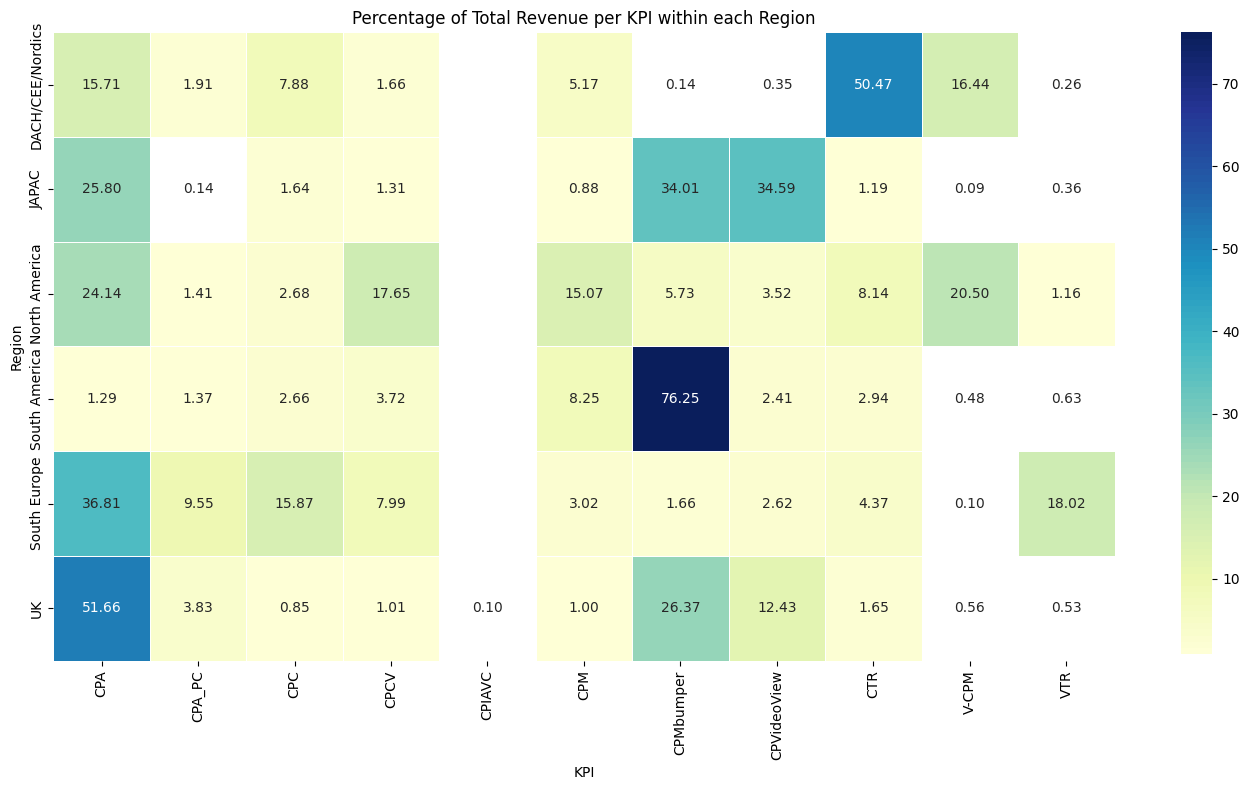

In [ ]:
# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_kpi_region = revenue_distribution_kpi_region.pivot('Clients Characteristics Scibids Region', 'unified_KPI', '% of Total Revenue per Region').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_kpi_region == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_kpi_region.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_kpi_region, annot=annotations, cmap=cmap, fmt="", linewidths=.5, mask=mask)
plt.title('Percentage of Total Revenue per KPI within each Region')
plt.xlabel('KPI')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [ ]:
## Per insertion order

# Group by both Region and KPI to calculate the revenue for each combination
revenue_distribution_kpi_region = scibids_active.groupby(['Clients Characteristics Scibids Region', 'unified_KPI']).apply(lambda x: x['Performance Measures Revenue USD'].sum() / x['Insertion Orders Distinct Count of IOs'].sum()).reset_index()

# Rename the columns for clarity
revenue_distribution_kpi_region.columns = ['Clients Characteristics Scibids Region', 'unified_KPI', 'Normalized Revenue']

# Calculate the total normalized revenue per region for percentage calculation
total_normalized_revenue_per_region = revenue_distribution_kpi_region.groupby('Clients Characteristics Scibids Region')['Normalized Revenue'].transform('sum')

# Calculate the percentage of total normalized revenue for each KPI within each region
revenue_distribution_kpi_region['% of Total Normalized Revenue per Region'] = (revenue_distribution_kpi_region['Normalized Revenue'] / total_normalized_revenue_per_region) * 100

revenue_distribution_kpi_region


Clients Characteristics Scibids Region  unified_KPI  Normalized Revenue  \
0                        DACH/CEE/Nordics          CPA         2239.782686   
1                        DACH/CEE/Nordics       CPA_PC         2633.702092   
2                        DACH/CEE/Nordics          CPC         1861.096602   
3                        DACH/CEE/Nordics         CPCV         6867.961867   
4                        DACH/CEE/Nordics          CPM         1425.575179   
..                                    ...          ...                 ...   
56                                     UK    CPMbumper        11931.865467   
57                                     UK  CPVideoView         6452.435545   
58                                     UK          CTR         3048.717264   
59                                     UK        V-CPM         3877.400856   
60                                     UK          VTR         5942.905974   

    % of Total Normalized Revenue per Region  
0                                   9.772582  
1                                  11.491325  
2                                   8.120305  
3                                  29.966175  
4                                   6.220046  
..                                       ...  
56                                 21.696841  
57                                 11.733075  
58                                  5.543771  
59                                  7.050645  
60                                 10.806549  

[61 rows x 4 columns]

<ipython-input-67-359bf133cfa5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_kpi_region = revenue_distribution_kpi_region.pivot('Clients Characteristics Scibids Region', 'unified_KPI', '% of Total Normalized Revenue per Region').fillna(0)


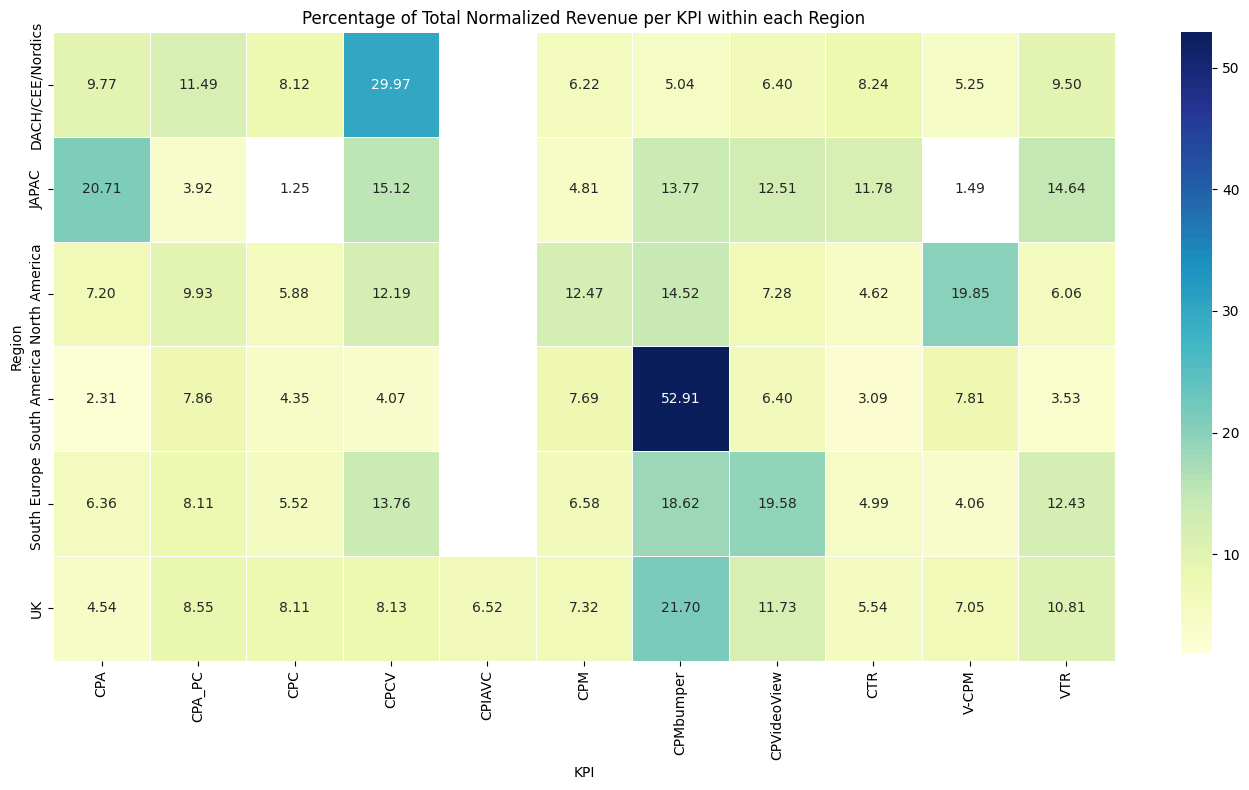

In [ ]:
# Pivot the dataframe to get a matrix suitable for heatmap
heatmap_data_kpi_region = revenue_distribution_kpi_region.pivot('Clients Characteristics Scibids Region', 'unified_KPI', '% of Total Normalized Revenue per Region').fillna(0)

# Create a mask for 0 values
mask = heatmap_data_kpi_region == 0

# Custom annotation function
def custom_annotation(val):
    return '' if val == 0 else f'{val:.2f}'

# Create an array of annotations
annotations = np.vectorize(custom_annotation)(heatmap_data_kpi_region.values)

# Create a custom colormap. Colors below 1e-10 will be white, and the rest will follow 'YlGnBu'
cmap = ListedColormap(['white'] + sns.color_palette("YlGnBu", 100).as_hex())

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_kpi_region, annot=annotations, cmap=cmap, fmt="", linewidths=.5, mask=mask)
plt.title('Percentage of Total Normalized Revenue per KPI within each Region')
plt.xlabel('KPI')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## Top 10 clients and campaigns per revenue

In [ ]:
# Top 10 clients with highest revenue
top_clients_revenue = scibids_active.groupby('Clients Characteristics Company Name')['Performance Measures Revenue USD'].sum().nlargest(10)


top_clients_revenue


Clients Characteristics Company Name
Diageo                                                     7.035511e+07
Tinuiti                                                    1.873466e+07
Redfuse (US) - Colgate                                     1.214796e+07
T MOBILE USA                                               1.164415e+07
Amnet FR                                                   1.130247e+07
Zetaglobal                                                 9.208371e+06
Matrix Publicities and Media India Private Ltd - Mumbai    8.616153e+06
Pokerstars ROW                                             7.610410e+06
Dentsu Mexico                                              7.531699e+06
Xaxis PH                                                   5.723919e+06
Name: Performance Measures Revenue USD, dtype: float64

In [ ]:
# Top 10 campaigns with highest revenue

top_campaigns_revenue = scibids_active.groupby('Insertion Orders Distinct Count of IOs')['Performance Measures Revenue USD'].sum().nlargest(10)
top_campaigns_revenue

Insertion Orders Distinct Count of IOs
1     7.787780e+07
2     4.313770e+07
3     3.342383e+07
4     2.707932e+07
5     2.357312e+07
6     1.769770e+07
8     1.279952e+07
7     7.537550e+06
19    3.835393e+06
9     3.477307e+06
Name: Performance Measures Revenue USD, dtype: float64

## Calculating the average revenue per campaign based on Scibids Activity and Client Typology


<ipython-input-70-5c25aa3788da>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_revenue_per_campaign_scibids = (df.groupby(['Clients Characteristics Typology', 'Performance Measures Billing Scibids Activity'])


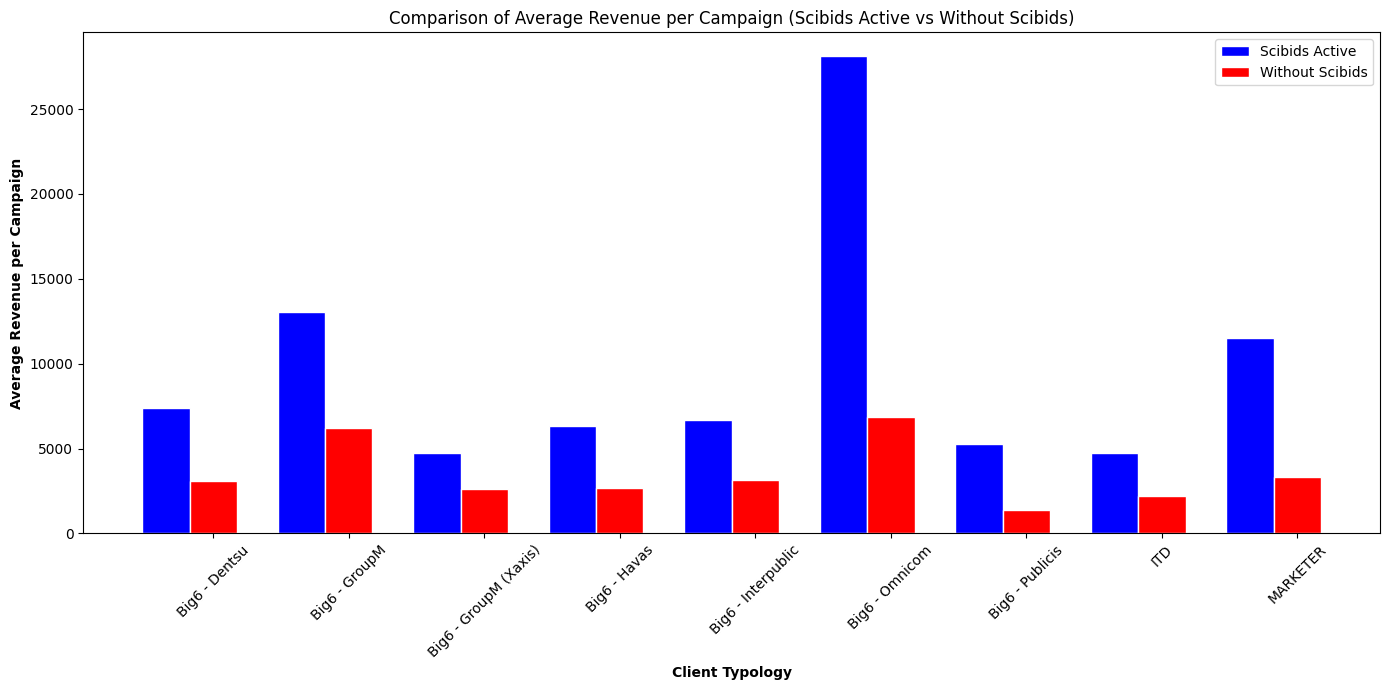

In [ ]:
# Grouping the data based on Scibids Activity, Client Typology and calculating the average revenue per campaign
avg_revenue_per_campaign_scibids = (df.groupby(['Clients Characteristics Typology', 'Performance Measures Billing Scibids Activity'])
                                    ['Performance Measures Revenue USD', 'Insertion Orders Distinct Count of IOs']
                                    .sum())

avg_revenue_per_campaign_scibids['Avg Revenue per Campaign'] = avg_revenue_per_campaign_scibids['Performance Measures Revenue USD'] / avg_revenue_per_campaign_scibids['Insertion Orders Distinct Count of IOs']
avg_revenue_per_campaign_scibids = avg_revenue_per_campaign_scibids.reset_index()

# Filtering for Scibids Active and Without Scibids
active_scibids = avg_revenue_per_campaign_scibids[avg_revenue_per_campaign_scibids['Performance Measures Billing Scibids Activity'] == 'Scibids Active']
without_scibids = avg_revenue_per_campaign_scibids[avg_revenue_per_campaign_scibids['Performance Measures Billing Scibids Activity'] == 'Without Scibids']

# Plotting
plt.figure(figsize=(14, 7))

barWidth = 0.35
r1 = np.arange(len(active_scibids))
r2 = [x + barWidth for x in r1]

plt.bar(r1, active_scibids['Avg Revenue per Campaign'], color='blue', width=barWidth, edgecolor='white', label='Scibids Active')
plt.bar(r2, without_scibids['Avg Revenue per Campaign'], color='red', width=barWidth, edgecolor='white', label='Without Scibids')

plt.xlabel('Client Typology', fontweight='bold')
plt.ylabel('Average Revenue per Campaign', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(active_scibids))], active_scibids['Clients Characteristics Typology'], rotation=45)
plt.legend()
plt.title('Comparison of Average Revenue per Campaign (Scibids Active vs Without Scibids)')

plt.tight_layout()
plt.show()


## Normalised Revenue per KPI and DSP Combination

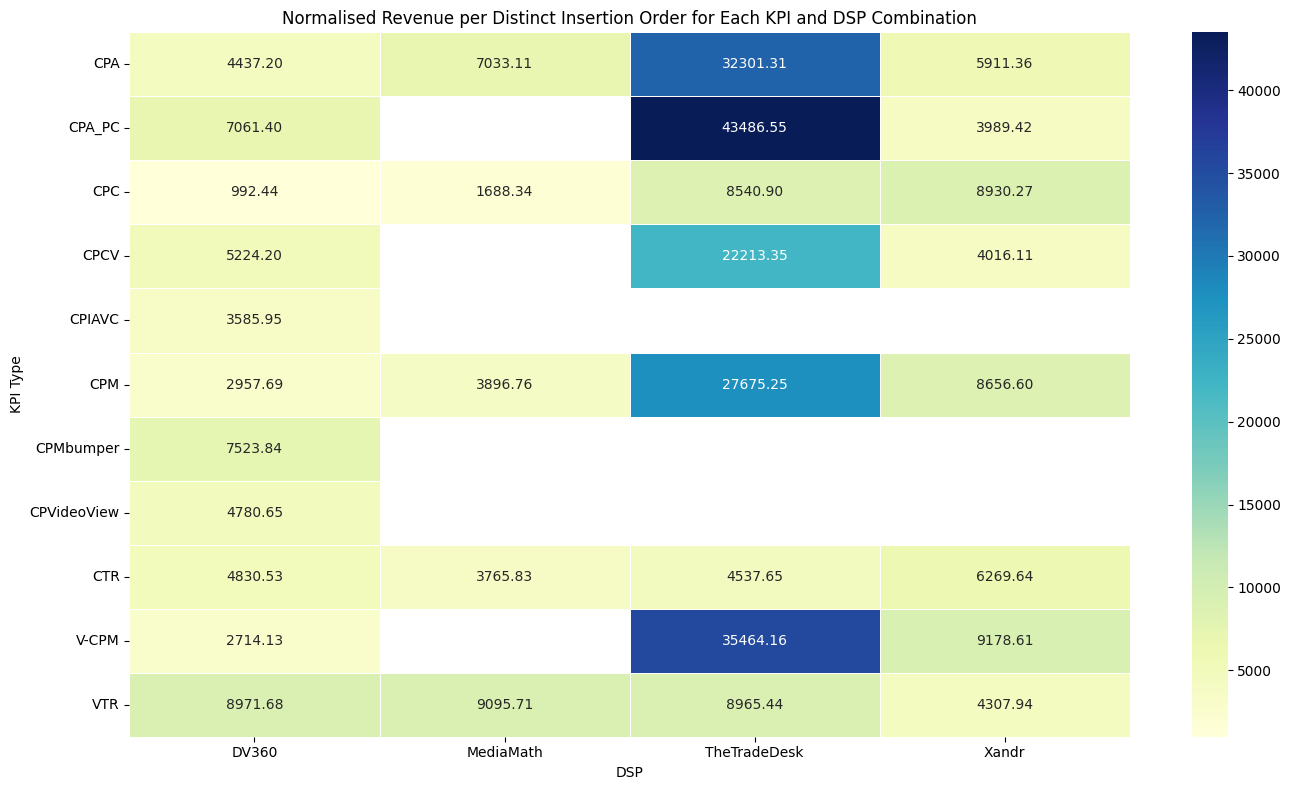

In [ ]:
# Calculating the normalised revenue per distinct insertion order for each KPI and DSP combination
norm_revenue_per_order_per_kpi_dsp = (scibids_active
                                     .groupby(['unified_KPI', 'Accessible IDs Dsp'])
                                     .apply(lambda x: x['Performance Measures Revenue USD'].sum() / x['Insertion Orders Distinct Count of IOs'].sum())
                                     .unstack())

# Visualizing the data
plt.figure(figsize=(14, 8))
sns.heatmap(norm_revenue_per_order_per_kpi_dsp, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Normalised Revenue per Distinct Insertion Order for Each KPI and DSP Combination')
plt.xlabel('DSP')
plt.ylabel('KPI Type')
plt.tight_layout()
plt.show()



Analysis:
General Trends: While DV360 dominates in many combinations, TheTradeDesk (TTD) showcases high average revenues per distinct order for certain KPIs.
Specifics:
TheTradeDesk (TTD) with CPA_PC and CPA displays high average revenues per distinct order, emphasizing its performance in these areas.
DV360 also has strong revenues for the CPA_PC KPI, but its performance with CPA is notably less compared to TTD.
Other KPIs like CPI and CPL also have notable revenues with TheTradeDesk, further highlighting its efficacy in generating revenue across different KPIs.
Conclusions:
TheTradeDesk's Efficacy: TheTradeDesk, while having fewer combinations compared to DV360, excels in generating revenue for specific KPIs like CPA_PC and CPA on a per distinct order basis.
Comparison with DV360: DV360 is a dominant DSP across various KPIs, but when we account for revenue per distinct order, TheTradeDesk often surpasses DV360 for certain KPIs.
Revenue Efficiency: While total volume and presence in the market are significant, the efficiency of revenue generation (revenue per distinct order) can be a crucial metric. In this context, TheTradeDesk demonstrates high efficiency for specific KPIs.

## TradeDesk preference distribution - high revenue

In [ ]:
# Filtering the data to only include entries where the DSP is TheTradeDesk
tradedesk_data = scibids_active[scibids_active['Accessible IDs Dsp'] == 'TheTradeDesk']

# Grouping by region and typology to count the number of occurrences
tradedesk_region_typology = tradedesk_data.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).size().unstack()

tradedesk_region_typology



Clients Characteristics Typology        Big6 - Dentsu  Big6 - GroupM  \
Clients Characteristics Scibids Region                                 
JAPAC                                             NaN            5.0   
North America                                     NaN           36.0   
South Europe                                    321.0           35.0   
UK                                                NaN            4.0   

Clients Characteristics Typology        Big6 - GroupM (Xaxis)  \
Clients Characteristics Scibids Region                          
JAPAC                                                    42.0   
North America                                            68.0   
South Europe                                              NaN   
UK                                                        NaN   

Clients Characteristics Typology        Big6 - Interpublic  Big6 - Omnicom  \
Clients Characteristics Scibids Region                                       
JAPAC                                                  6.0             NaN   
North America                                         27.0           961.0   
South Europe                                           NaN             3.0   
UK                                                     3.0             NaN   

Clients Characteristics Typology        Big6 - Publicis    ITD  MARKETER  
Clients Characteristics Scibids Region                                    
JAPAC                                               NaN   13.0       NaN  
North America                                       5.0  133.0       4.0  
South Europe                                       24.0    6.0       NaN  
UK                                                  NaN    NaN       NaN

In [ ]:
# Grouping by region and typology to count the number of occurrences for TheTradeDesk
tradedesk_region_typology = tradedesk_data.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).size().unstack()

tradedesk_region_typology.fillna(0)  # Filling NaN values with 0 for better representation


Clients Characteristics Typology        Big6 - Dentsu  Big6 - GroupM  \
Clients Characteristics Scibids Region                                 
JAPAC                                             0.0            5.0   
North America                                     0.0           36.0   
South Europe                                    321.0           35.0   
UK                                                0.0            4.0   

Clients Characteristics Typology        Big6 - GroupM (Xaxis)  \
Clients Characteristics Scibids Region                          
JAPAC                                                    42.0   
North America                                            68.0   
South Europe                                              0.0   
UK                                                        0.0   

Clients Characteristics Typology        Big6 - Interpublic  Big6 - Omnicom  \
Clients Characteristics Scibids Region                                       
JAPAC                                                  6.0             0.0   
North America                                         27.0           961.0   
South Europe                                           0.0             3.0   
UK                                                     3.0             0.0   

Clients Characteristics Typology        Big6 - Publicis    ITD  MARKETER  
Clients Characteristics Scibids Region                                    
JAPAC                                               0.0   13.0       0.0  
North America                                       5.0  133.0       4.0  
South Europe                                       24.0    6.0       0.0  
UK                                                  0.0    0.0       0.0

Big 6 Omnicom is a high revenue generator in North America because of Traderdesk

## Top 20 clients based on revenue, insertions orders, grouped by DSP, region, typology

In [ ]:
#
grouped_data = scibids_active.groupby(
    ['Clients Characteristics Scibids Region',
     'Clients Characteristics Company Name',
     'Accessible IDs Client Name',
     'Accessible IDs Advertiser Name',
     'Clients Characteristics Typology',
     'Accessible IDs Dsp']
).agg({
    'Performance Measures Revenue USD': 'sum',
    'Insertion Orders Distinct Count of IOs': 'sum'
}).reset_index()

# Sorting the data based on revenue
grouped_data_sorted = grouped_data.sort_values(by='Performance Measures Revenue USD', ascending=False)

# Displaying the top entities
top_entities = grouped_data_sorted.head(20)
top_entities


Clients Characteristics Scibids Region  \
757                           North America   
1033                          North America   
754                           North America   
1040                          North America   
778                           North America   
764                           North America   
753                           North America   
750                           North America   
1032                          North America   
759                           North America   
923                           North America   
766                           North America   
752                           North America   
212                                   JAPAC   
782                           North America   
761                           North America   
1326                          North America   
1030                          North America   
156                                   JAPAC   
779                           North America   

     Clients Characteristics Company Name  \
757                                Diageo   
1033               Redfuse (US) - Colgate   
754                                Diageo   
1040                         T MOBILE USA   
778                                Diageo   
764                                Diageo   
753                                Diageo   
750                                Diageo   
1032               Redfuse (US) - Colgate   
759                                Diageo   
923                     Home Depot Canada   
766                                Diageo   
752                                Diageo   
212                  KINESSO INDIA MUMBAI   
782                                Diageo   
761                                Diageo   
1326                           Zetaglobal   
1030                       Progressive US   
156           Hotstart SVOD c/o Mindshare   
779                                Diageo   

                 Accessible IDs Client Name Accessible IDs Advertiser Name  \
757                   Diageo Americas, Inc.                    Crown Royal   
1033  GroupM - Redfuse - Colgate - US - USD                        Colgate   
754                   Diageo Americas, Inc.                 Captain Morgan   
1040                               T-Mobile                       T-Mobile   
778                   Diageo Americas, Inc.                       Smirnoff   
764                   Diageo Americas, Inc.           Johnnie Walker Black   
753                   Diageo Americas, Inc.                        Bulleit   
750                   Diageo Americas, Inc.                        Baileys   
1032                   Colgate Programmatic                     Colgate NA   
759                   Diageo Americas, Inc.                      Don Julio   
923                       Home Depot Canada                Home Depot Corp   
766                   Diageo Americas, Inc.            Ketel One Trademark   
752                   Diageo Americas, Inc.                     Buchanan's   
212                  Matterkind India (INR)         Spotify India (Hybrid)   
782                   Diageo Americas, Inc.                   Tanqueray US   
761                   Diageo Americas, Inc.                       Guinness   
1326           Zeta Global Interactive Team          Progressive Insurance   
1030                  Progressive Insurance    Progressive - Special Lines   
156         IN_MS_West_TWDC_Hotstar SVOD_NA         1_HOTSTAR SVOD_WES_DCM   
779                   Diageo Americas, Inc.                   Smirnoff Ice   

     Clients Characteristics Typology Accessible IDs Dsp  \
757                    Big6 - Omnicom       TheTradeDesk   
1033                    Big6 - GroupM       TheTradeDesk   
754                    Big6 - Omnicom       TheTradeDesk   
1040                              ITD       TheTradeDesk   
778                    Big6 - Omnicom       TheTradeDesk   
764                    Big6 - Omnicom       TheTradeDesk   
753         

## Top 20 clients total revenue and IOs per DSP

In [ ]:
# Check how many times each DSP appears in the top 20
dsp_counts = top_entities['Accessible IDs Dsp'].value_counts()

dsp_counts


TheTradeDesk    15
DV360            4
Xandr            1
Name: Accessible IDs Dsp, dtype: int64

In [ ]:
# Aggregate revenue by DSP in the top 20
revenue_by_dsp = top_entities.groupby('Accessible IDs Dsp')['Performance Measures Revenue USD'].sum()

revenue_by_dsp



Accessible IDs Dsp
DV360           1.287711e+07
TheTradeDesk    7.337417e+07
Xandr           2.556203e+06
Name: Performance Measures Revenue USD, dtype: float64

In [ ]:
# Aggregate the number of campaigns by DSP in the top 20
campaigns_by_dsp = top_entities.groupby('Accessible IDs Dsp')['Insertion Orders Distinct Count of IOs'].sum()
campaigns_by_dsp

Accessible IDs Dsp
DV360            828
TheTradeDesk    2024
Xandr              8
Name: Insertion Orders Distinct Count of IOs, dtype: int64

In [ ]:
# Merge the three DSP-related insights into a single DataFrame
dsp_summary = pd.concat([
    dsp_counts.rename('DSP Counts in Top 20'),
    revenue_by_dsp.rename('Total Revenue by DSP'),
    campaigns_by_dsp.rename('Total Insertion Orders by DSP')
], axis=1).fillna(0)  # Fill any NaN values with 0

# Convert the 'Total Revenue by DSP' column to integers
dsp_summary['Total Revenue by DSP'] = dsp_summary['Total Revenue by DSP'].astype(int)

dsp_summary




DSP Counts in Top 20  Total Revenue by DSP  \
TheTradeDesk                    15              73374173   
DV360                            4              12877110   
Xandr                            1               2556203   

              Total Insertion Orders by DSP  
TheTradeDesk                           2024  
DV360                                   828  
Xandr                                     8

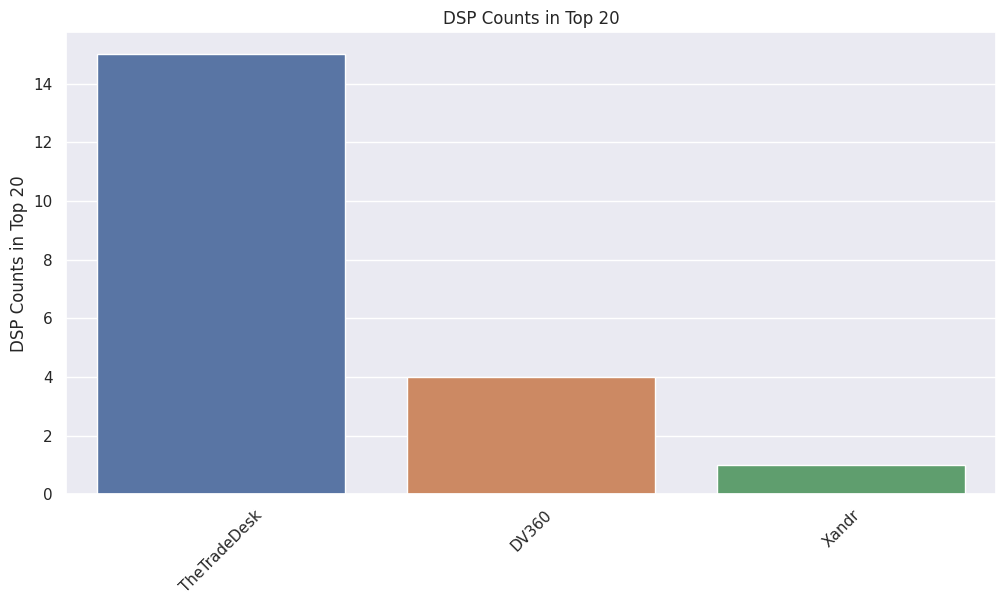

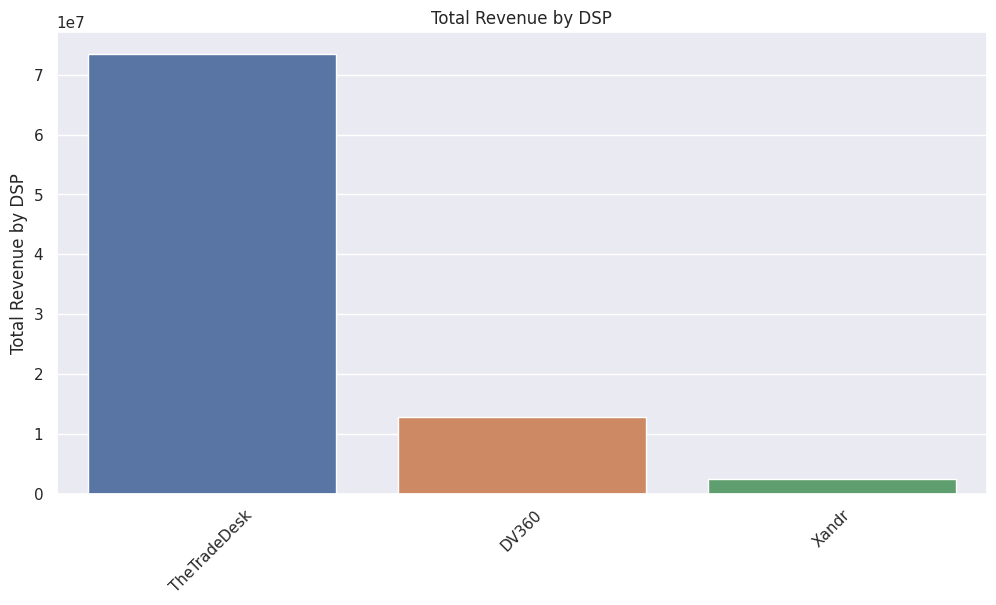

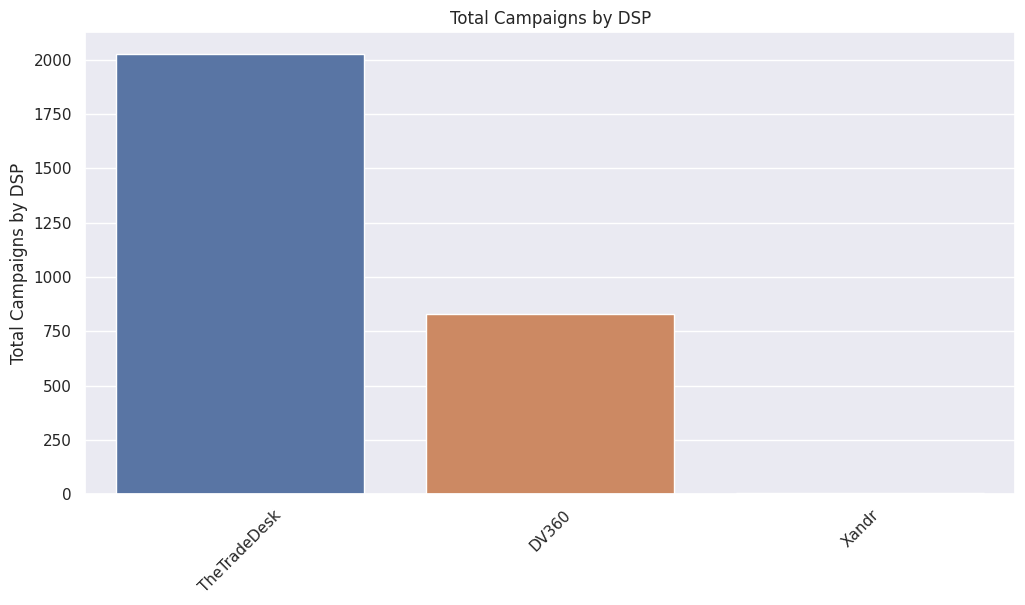

In [ ]:


# Set up the aesthetics
sns.set_theme()

# Plotting DSP Counts in Top 20
plt.figure(figsize=(12, 6))
sns.barplot(x=dsp_summary.index, y=dsp_summary['DSP Counts in Top 20'])
plt.title('DSP Counts in Top 20')
plt.xticks(rotation=45)
plt.show()

# Plotting Total Revenue by DSP
plt.figure(figsize=(12, 6))
sns.barplot(x=dsp_summary.index, y=dsp_summary['Total Revenue by DSP'])
plt.title('Total Revenue by DSP')
plt.xticks(rotation=45)
plt.show()

# Plotting Total Campaigns by DSP
plt.figure(figsize=(12, 6))
sns.barplot(x=dsp_summary.index, y=dsp_summary['Total Campaigns by DSP'])
plt.title('Total Campaigns by DSP')
plt.xticks(rotation=45)
plt.show()




In [ ]:
## Zetaglobal top client per revenue

# examine


zetaglobal_rows = df[df['Clients Characteristics Company Name'] == 'Zetaglobal']

zetaglobal_rows

Clients Characteristics Company ID  \
31                                     43   
52                                     43   
106                                    43   
145                                    43   
334                                    43   
...                                   ...   
26685                                  43   
26713                                  43   
26715                                  43   
26734                                  43   
26785                                  43   

      Clients Characteristics Company Name Accessible IDs Client ID  \
31                              Zetaglobal                     8437   
52                              Zetaglobal                     8437   
106                             Zetaglobal                     8437   
145                             Zetaglobal                     8437   
334                             Zetaglobal                     8437   
...                                    ...                      ...   
26685                           Zetaglobal                     8437   
26713                           Zetaglobal                     8437   
26715                           Zetaglobal                     8437   
26734                           Zetaglobal                     8437   
26785                           Zetaglobal                     8437   

         Accessible IDs Client Name Accessible IDs Advertiser ID  \
31     Zeta Global Interactive Team                      8057956   
52     Zeta Global Interactive Team                      2570595   
106    Zeta Global Interactive Team                      7488943   
145    Zeta Global Interactive Team                      6685782   
334    Zeta Global Interactive Team                      3041957   
...                             ...                          ...   
26685  Zeta Global Interactive Team                      3041957   
26713  Zeta Global Interactive Team                      2386024   
26715  Zeta Global Interactive Team                      4169818   
26734  Zeta Global Interactive Team                      4812818   
26785  Zeta Global Interactive Team                      2386024   

      Accessible IDs Advertiser Name Clients Characteristics Scibids Region  \
31                         Eli Lilly                          North America   
52         Navy Federal Credit Union                          North America   
106                       Nationwide                          North America   
145             Pennsylvania Lottery                          North America   
334            Gerber Life Insurance                          North America   
...                              ...                                    ...   
26685          Gerber Life Insurance                          North America   
26713                      Walgreens                          North America   
26715                          Lexus                          North America   
26734                           CBOE                          North America   
26785                      Walgreens                          North America   

      Clients Characteristics Typology Accessible IDs Dsp  \
31                                 ITD              Xandr   
52                                 ITD              Xandr   
106                                ITD              Xandr   
145                                ITD              Xandr   
334                                ITD              Xandr   
...                                ...                ...   
26685                              ITD              Xandr   
26713                              ITD              Xandr   
26715                              ITD              Xandr   
26734                              ITD              Xandr   
26785                              ITD              Xandr   

      Accessible IDs Sub Dsp  ...  \
31                   Display  ...   
52                   Display  ...   
106

In [ ]:
from google.colab import files
zetaglobal_rows.to_csv('zetaglobal_rows.csv')
files.download('zetaglobal_rows.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculate average CPC and CPM per insertion order again
zetaglobal_rows['CPC_per_IO'] = zetaglobal_rows['CPC'] / zetaglobal_rows['Insertion Orders Distinct Count of IOs']
zetaglobal_rows['CPM_per_IO'] = zetaglobal_rows['CPM'] / zetaglobal_rows['Insertion Orders Distinct Count of IOs']

# Grouping data by Scibids Activity and computing the mean for adjusted CPC and CPM
zetaglobal_cpc_cpm_per_io_summary = zetaglobal_rows.groupby('Performance Measures Billing Scibids Activity')[['CPC_per_IO', 'CPM_per_IO']].mean()

zetaglobal_cpc_cpm_per_io_summary


<ipython-input-91-1d6589bed1f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zetaglobal_rows['CPC_per_IO'] = zetaglobal_rows['CPC'] / zetaglobal_rows['Insertion Orders Distinct Count of IOs']
<ipython-input-91-1d6589bed1f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zetaglobal_rows['CPM_per_IO'] = zetaglobal_rows['CPM'] / zetaglobal_rows['Insertion Orders Distinct Count of IOs']


CPC_per_IO  CPM_per_IO
Performance Measures Billing Scibids Activity                        
Scibids Active                                 457.376973    3.920721
Without Scibids                                  5.209142    5.791215

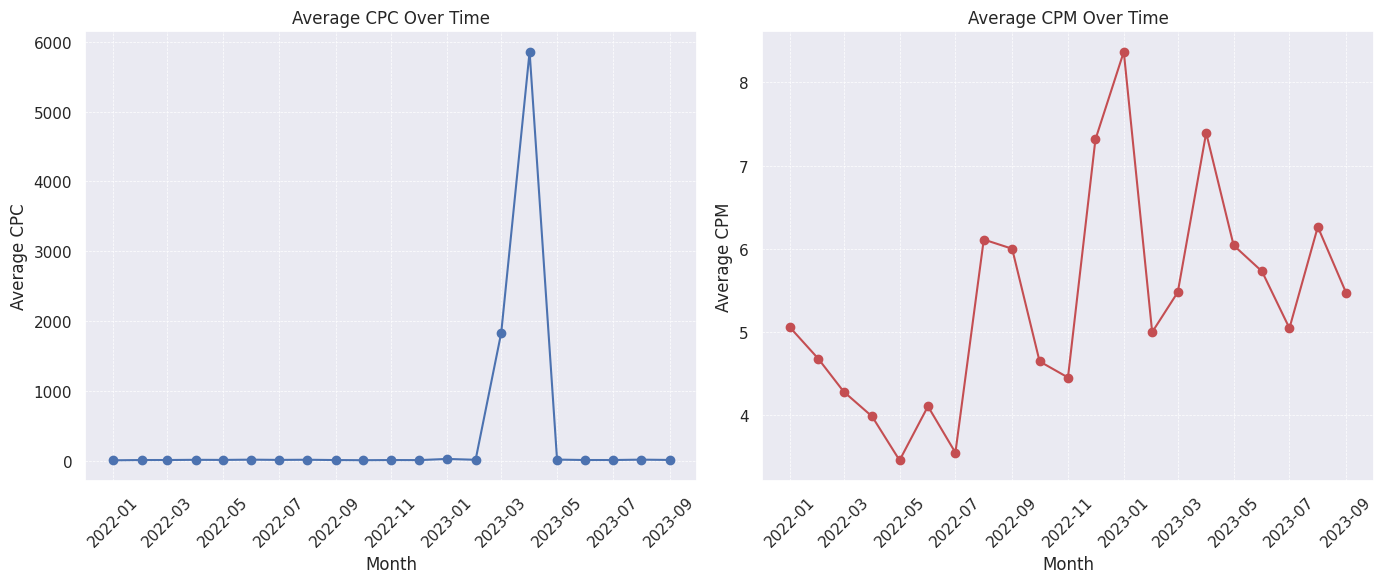

In [ ]:

# Filter data for Scibids active campaigns
scibids_active_data = zetaglobal_rows[zetaglobal_rows['Performance Measures Billing Scibids Activity'] == 'Scibids Active']

# Group by month and calculate average CPC and CPM
monthly_avg = scibids_active_data.groupby('Performance Measures Day Tz Month')[['CPC', 'CPM']].mean()
monthly_avg.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(14, 6))

# Plotting CPC
plt.subplot(1, 2, 1)
plt.plot(monthly_avg['Performance Measures Day Tz Month'], monthly_avg['CPC'], marker='o', color='b', label='CPC')
plt.xticks(rotation=45)
plt.title("Average CPC Over Time")
plt.xlabel("Month")
plt.ylabel("Average CPC")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Plotting CPM
plt.subplot(1, 2, 2)
plt.plot(monthly_avg['Performance Measures Day Tz Month'], monthly_avg['CPM'], marker='o', color='r', label='CPM')
plt.xticks(rotation=45)
plt.title("Average CPM Over Time")
plt.xlabel("Month")
plt.ylabel("Average CPM")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



In [ ]:
# Grouping by month, client ID, advertiser name, and insertion orders
grouped_cpc = scibids_active_data.groupby(['Performance Measures Day Tz Month', 'Accessible IDs Client ID',
                                           'Accessible IDs Advertiser Name', 'Insertion Orders Distinct Count of IOs'])['CPC'].mean().reset_index()

# Determining the 90th percentile as threshold
threshold = grouped_cpc['CPC'].quantile(0.90)

# Filtering campaigns with CPC greater than the threshold
high_cpc_campaigns = grouped_cpc[grouped_cpc['CPC'] > threshold]

high_cpc_campaigns


Performance Measures Day Tz Month  Accessible IDs Client ID  \
26                         2022-04-01                      8437   
41                         2022-05-01                      8437   
51                         2022-06-01                      8437   
59                         2022-07-01                      8437   
69                         2022-08-01                      8437   
92                         2022-11-01                      8437   
102                        2022-12-01                      8437   
109                        2023-01-01                      8437   
110                        2023-01-01                      8437   
119                        2023-02-01                      8437   
120                        2023-02-01                      8437   
131                        2023-03-01                      8437   
139                        2023-04-01                      8437   
141                        2023-04-01                      8437   
150                        2023-05-01                      8437   
155                        2023-05-01                      8437   
158                        2023-06-01                      8437   
167                        2023-07-01                      8437   
178                        2023-08-01                      8437   
181                        2023-08-01                      8437   

    Accessible IDs Advertiser Name  Insertion Orders Distinct Count of IOs  \
26           Gerber Life Insurance                                       1   
41                       Walgreens                                       1   
51                       Walgreens                                       1   
59                       Walgreens                                       1   
69                       Walgreens                                       1   
92           Gerber Life Insurance                                       1   
102          Gerber Life Insurance                                       1   
109                       Circle K                                       2   
110                 Erie Insurance                                       1   
119                       Circle K                                       2   
120          Gerber Life Insurance                                       3   
131      Navy Federal Credit Union                                       1   
139          Gerber Life Insurance                                       1   
141      Navy Federal Credit Union                                       1   
150      Navy Federal Credit Union                                       1   
155     Uptown Ventures Group, Inc                                       1   
158                      Eli Lilly                                       2   
167                   Choice Hotel                                       1   
178                   Choice Hotel                                       1   
181          Gerber Life Insurance                                       1   

              CPC  
26      34.894243  
41      27.711118  
51      53.953558  
59      35.384763  
69      48.234490  
92      29.495760  
102     24.539465  
109    105.592610  
110     38.175143  
119     48.813262  
120     23.581220  
131  23730.104540  
139     29.836920  
141  70157.542470  
150     64.468859  
155     32.354600  
158     25.605235  
167     25.863238  
178     26.506994  
181     28.443969

# Seasonal trends

## Campaigns trends

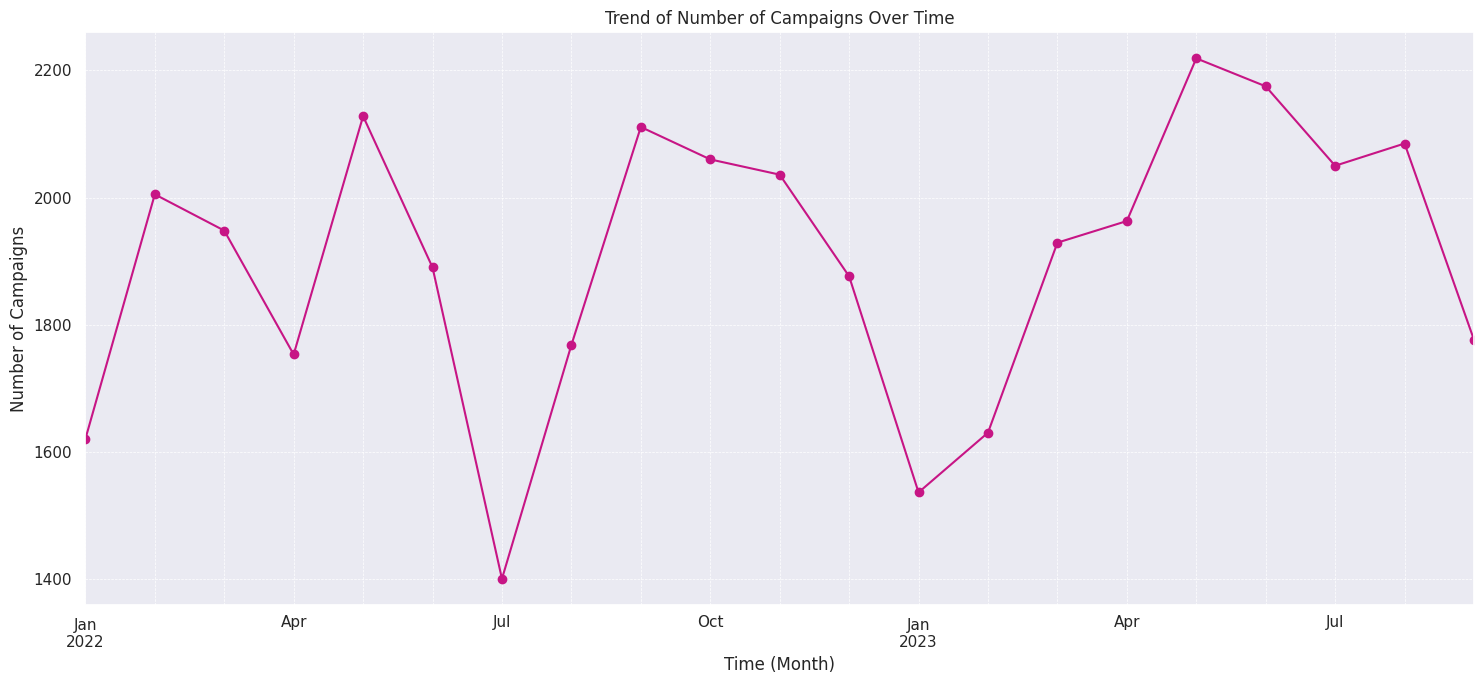

In [ ]:
# Grouping by month to get the total number of campaigns over time
campaigns_trend = scibids_active.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].sum()

# Plotting
plt.figure(figsize=(15, 7))
campaigns_trend.plot(kind='line', marker='o', color='mediumvioletred')
plt.title('Trend of Number of Campaigns Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Number of Campaigns')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Grouping by month, KPI, DSP, and region to get the sum of Insertion Orders and Revenue
combined_trends = scibids_active.groupby(['Performance Measures Day Tz Month',
                                         'unified_KPI',
                                         'Accessible IDs Dsp',
                                         'Clients Characteristics Scibids Region'])[['Insertion Orders Distinct Count of IOs',
                                                                                    'Performance Measures Revenue USD']].sum().reset_index()

# Normalizing the Insertion Orders and Revenue columns by month
combined_trends['Normalized IOs'] = combined_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
combined_trends['Normalized Revenue'] = combined_trends.groupby('Performance Measures Day Tz Month')['Performance Measures Revenue USD'].apply(lambda x: x / x.sum() * 100)

# Selecting a subset of columns for clarity
combined_trends = combined_trends[['Performance Measures Day Tz Month', 'unified_KPI', 'Accessible IDs Dsp', 'Clients Characteristics Scibids Region', 'Normalized IOs', 'Normalized Revenue']]

combined_trends.head(10)  # Displaying the first 10 rows for a quick overview


<ipython-input-96-0a1aaee2d688>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  combined_trends['Normalized IOs'] = combined_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
<ipython-input-96-0a1aaee2d688>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use

Performance Measures Day Tz Month unified_KPI Accessible IDs Dsp  \
0                        2022-01-01         CPA              DV360   
1                        2022-01-01         CPA              DV360   
2                        2022-01-01         CPA              DV360   
3                        2022-01-01         CPA              DV360   
4                        2022-01-01         CPA              DV360   
5                        2022-01-01         CPA          MediaMath   
6                        2022-01-01         CPA          MediaMath   
7                        2022-01-01         CPA       TheTradeDesk   
8                        2022-01-01         CPA       TheTradeDesk   
9                        2022-01-01         CPA              Xandr   

  Clients Characteristics Scibids Region  Normalized IOs  Normalized Revenue  
0                                  JAPAC        9.938272           17.194244  
1                          North America        0.617284            2.051407  
2                          South America        0.740741            0.150646  
3                           South Europe        2.777778            4.088268  
4                                     UK        6.790123            9.235936  
5                                  JAPAC        0.061728            0.137887  
6                          North America        0.061728            0.058493  
7                          North America        0.246914            0.014133  
8                           South Europe        0.555556            0.272796  
9                                  JAPAC        0.061728            0.203415

## DSP trends on insertion orders and revenue

In [ ]:
# Exploring trends in specific DSPs over time.

# Grouping by month and DSP for campaign counts and revenue
campaigns_per_month_dsp = scibids_active.groupby(['Performance Measures Day Tz Month', 'Accessible IDs Dsp'])['Insertion Orders Distinct Count of IOs'].sum()
revenue_per_month_dsp = scibids_active.groupby(['Performance Measures Day Tz Month', 'Accessible IDs Dsp'])['Performance Measures Revenue USD'].sum()

# Unstacking for visualization
campaigns_per_month_dsp_unstacked = campaigns_per_month_dsp.unstack('Accessible IDs Dsp').fillna(0)
revenue_per_month_dsp_unstacked = revenue_per_month_dsp.unstack('Accessible IDs Dsp').fillna(0)

campaigns_per_month_dsp_unstacked, revenue_per_month_dsp_unstacked


(Accessible IDs Dsp                  DV360  MediaMath  TheTradeDesk  Xandr
 Performance Measures Day Tz Month                                        
 2022-01-01                         1267.0        6.0          21.0  326.0
 2022-02-01                         1636.0        3.0          14.0  352.0
 2022-03-01                         1554.0       13.0          20.0  361.0
 2022-04-01                         1355.0        2.0          35.0  361.0
 2022-05-01                         1688.0        4.0          64.0  372.0
 2022-06-01                         1443.0        5.0          70.0  372.0
 2022-07-01                          988.0        3.0          88.0  321.0
 2022-08-01                         1183.0        2.0         243.0  340.0
 2022-09-01                         1473.0        2.0         275.0  361.0
 2022-10-01                         1520.0       10.0         231.0  299.0
 2022-11-01                         1460.0        8.0         246.0  322.0
 2022-12-01              

In [ ]:
# Grouping by month, DSP, and region to get the sum of Insertion Orders and Revenue
dsp_trends = scibids_active.groupby(['Performance Measures Day Tz Month',
                                     'Accessible IDs Dsp',
                                     'Clients Characteristics Scibids Region'])[['Insertion Orders Distinct Count of IOs',
                                                                                'Performance Measures Revenue USD']].sum().reset_index()

# Normalizing the Insertion Orders and Revenue columns by month
dsp_trends['Normalized IOs'] = dsp_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
dsp_trends['Normalized Revenue'] = dsp_trends.groupby('Performance Measures Day Tz Month')['Performance Measures Revenue USD'].apply(lambda x: x / x.sum() * 100)

# Selecting a subset of columns for clarity
dsp_trends = dsp_trends[['Performance Measures Day Tz Month', 'Accessible IDs Dsp', 'Clients Characteristics Scibids Region', 'Normalized IOs', 'Normalized Revenue']]

dsp_trends


<ipython-input-102-6862dc84b764>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dsp_trends['Normalized IOs'] = dsp_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
<ipython-input-102-6862dc84b764>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .

Performance Measures Day Tz Month Accessible IDs Dsp  \
0                          2022-01-01              DV360   
1                          2022-01-01              DV360   
2                          2022-01-01              DV360   
3                          2022-01-01              DV360   
4                          2022-01-01              DV360   
..                                ...                ...   
333                        2023-09-01              Xandr   
334                        2023-09-01              Xandr   
335                        2023-09-01              Xandr   
336                        2023-09-01              Xandr   
337                        2023-09-01              Xandr   

    Clients Characteristics Scibids Region  Normalized IOs  Normalized Revenue  
0                         DACH/CEE/Nordics        1.481481            0.422492  
1                                    JAPAC       52.901235           27.905516  
2                            North America        2.592593            3.152212  
3                            South America        3.395062            1.382177  
4                             South Europe        7.716049           16.472691  
..                                     ...             ...                 ...  
333                       DACH/CEE/Nordics        0.506757            0.053907  
334                                  JAPAC        0.168919            0.043415  
335                          North America        4.786036            8.755631  
336                           South Europe        3.772523            1.488474  
337                                     UK        1.407658            0.210324  

[338 rows x 5 columns]

In [ ]:
# Setting up the figure for DSP trends based on normalized IOs
plt.figure(figsize=(18, 15))

# Creating a line plot for each region based on normalized IOs for DSPs
for idx, region in enumerate(regions, start=1):
    plt.subplot(3, 2, idx)
    region_data = dsp_trends[dsp_trends['Clients Characteristics Scibids Region'] == region]
    sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='Accessible IDs Dsp', ci=None)
    plt.title(f'DSP Trends in {region} (Normalized IOs)')
    plt.xticks(rotation=45)
    plt.ylabel('Normalized IOs (%)')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1800x1500 with 0 Axes>

<ipython-input-117-2144c9f6c388>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='Accessible IDs Dsp', ci=None)
<ipython-input-117-2144c9f6c388>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='Accessible IDs Dsp', ci=None)
<ipython-input-117-2144c9f6c388>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='Accessible IDs Dsp', ci=None)
<ipython-input-117-2144c9f6c388>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized R

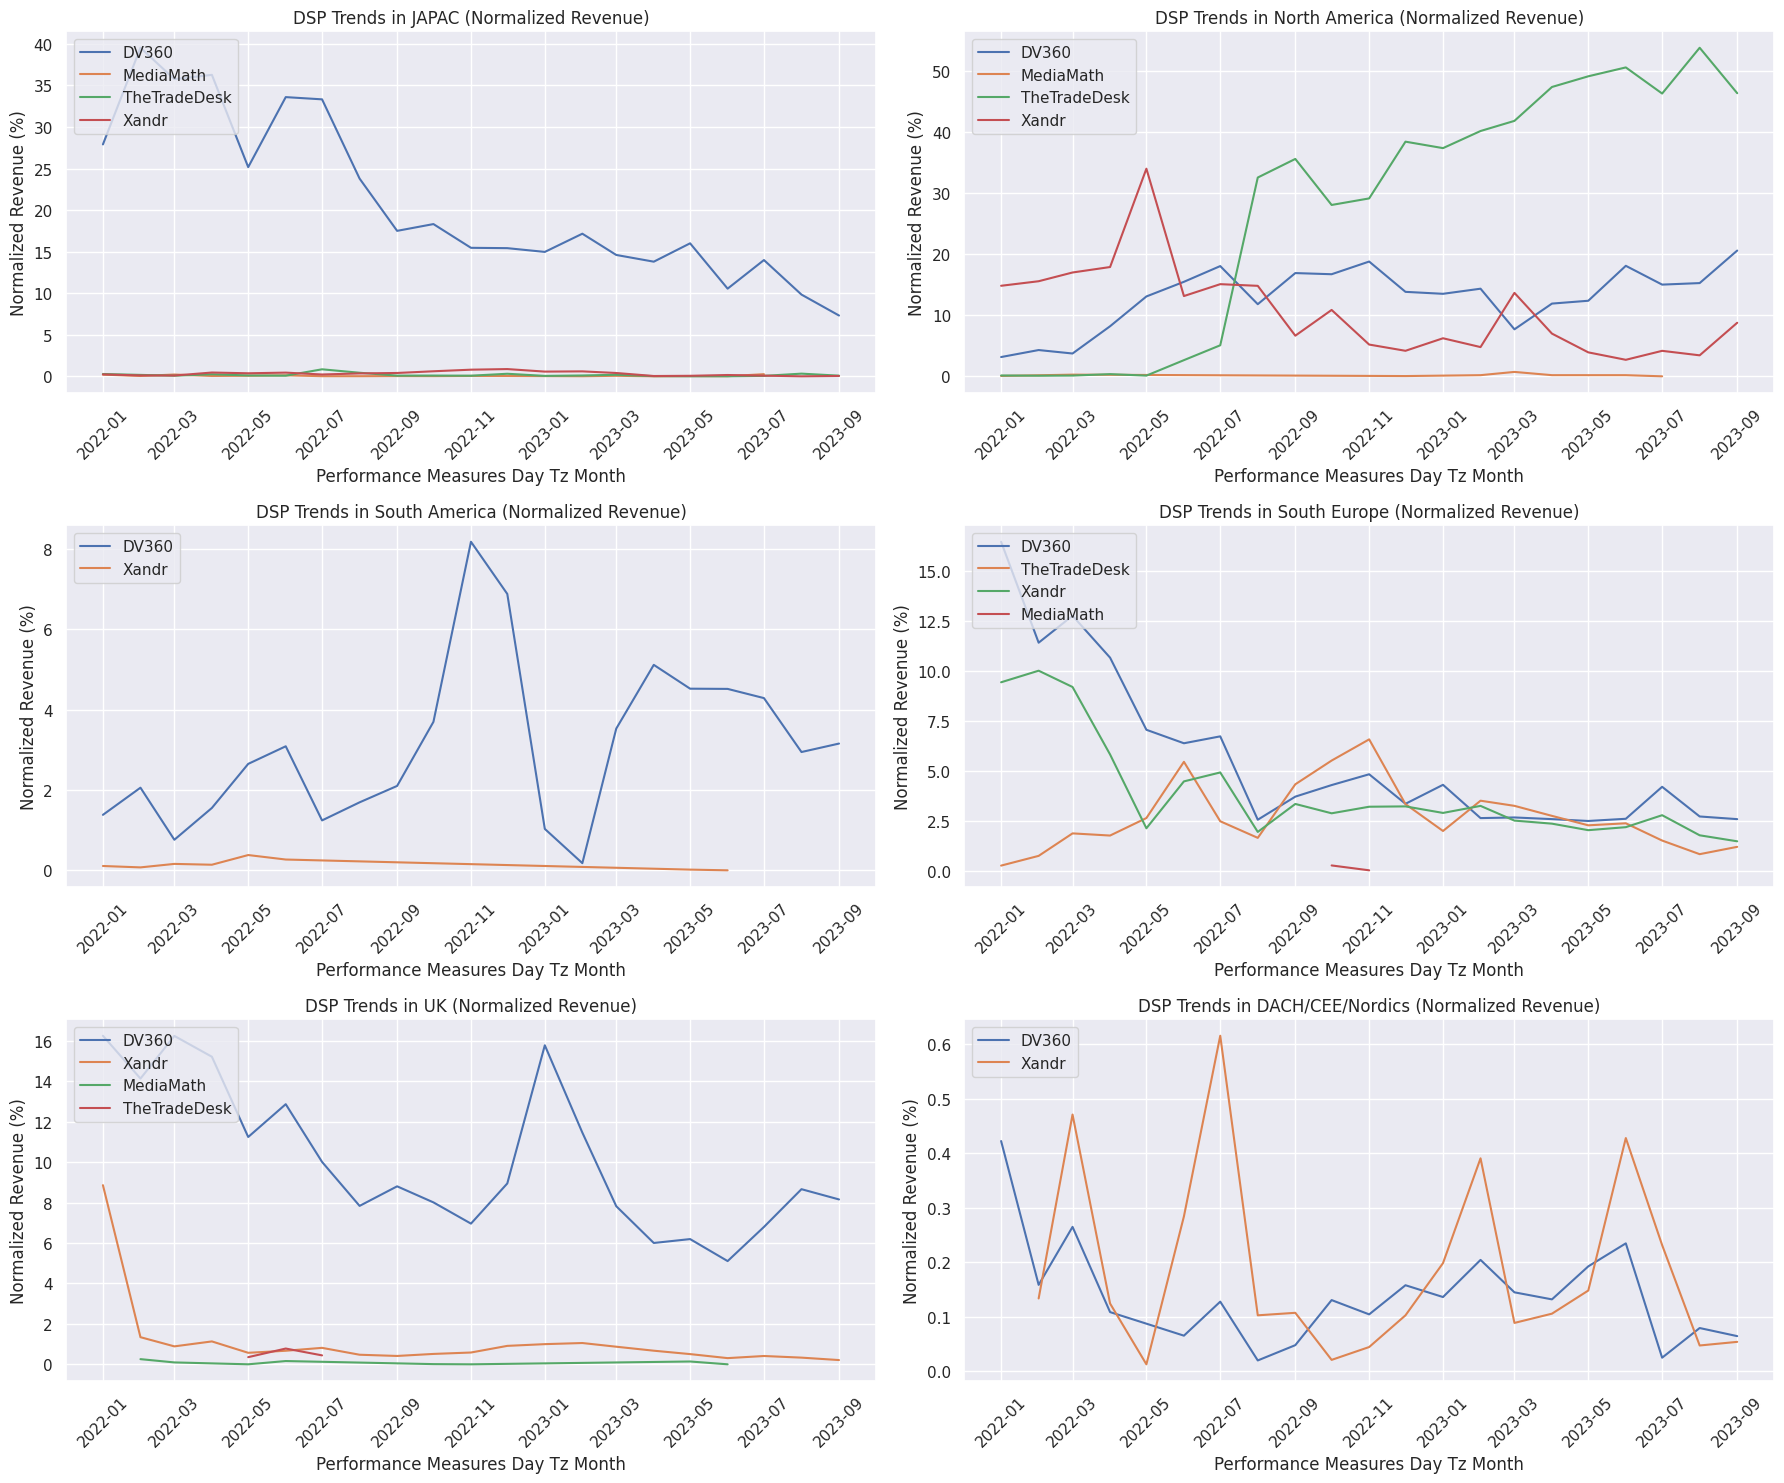

In [ ]:
# Setting up the figure for DSP trends based on normalized revenue
regions = kpi_trends['Clients Characteristics Scibids Region'].unique()


plt.figure(figsize=(18, 15))

# Creating a line plot for each region based on normalized revenue for DSPs
for idx, region in enumerate(regions, start=1):
    plt.subplot(3, 2, idx)
    region_data = dsp_trends[dsp_trends['Clients Characteristics Scibids Region'] == region]
    sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='Accessible IDs Dsp', ci=None)
    plt.title(f'DSP Trends in {region} (Normalized Revenue)')
    plt.xticks(rotation=45)
    plt.ylabel('Normalized Revenue (%)')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the seasonal trends based on revenue for each DSP in each market


plt.figure(figsize=(18, 12))

for dsp in dsps:
    dsp_subset = dsp_data[dsp_data['Accessible IDs Dsp'] == dsp]
    plt.subplot(3, 2, dsps.tolist().index(dsp) + 1)
    sns.lineplot(data=dsp_subset, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='Clients Characteristics Scibids Region', marker='o')
    plt.title(f'Revenue Trend for {dsp}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1800x1200 with 0 Axes>

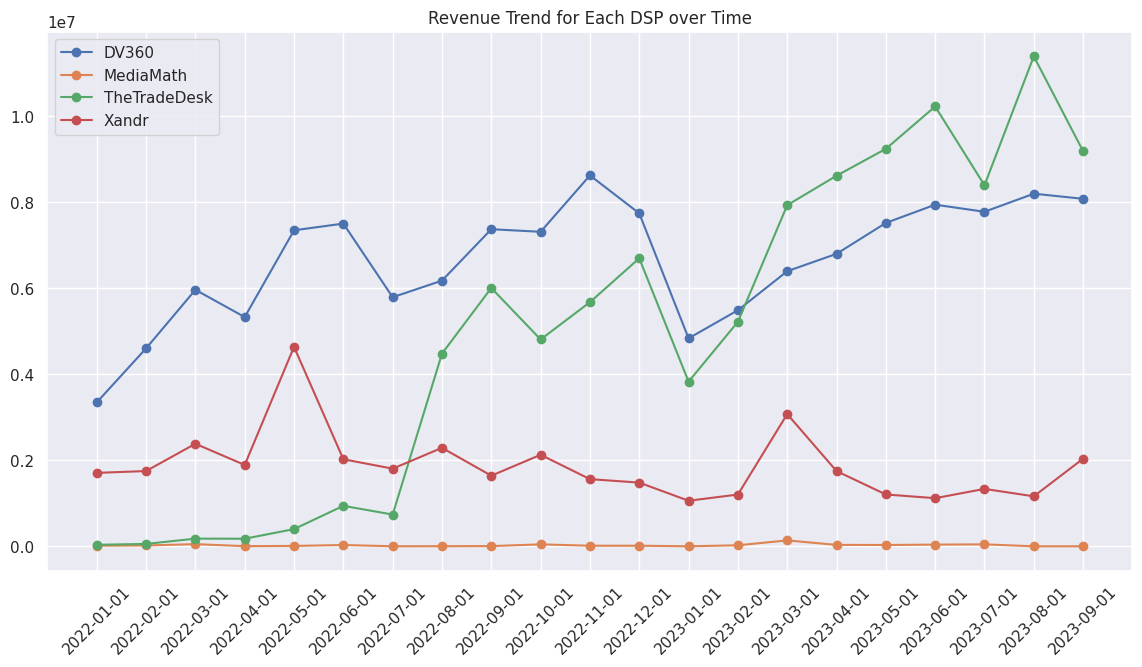

In [ ]:
# Plotting the revenue trend for each DSP over time

plt.figure(figsize=(14, 7))
for dsp in revenue_per_month_dsp_unstacked.columns:
    # Convert the 'Period' index to string
    plt.plot(revenue_per_month_dsp_unstacked.index.astype(str), revenue_per_month_dsp_unstacked[dsp], label=dsp, marker='o')

plt.title('Revenue Trend for Each DSP over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend()
plt.show()



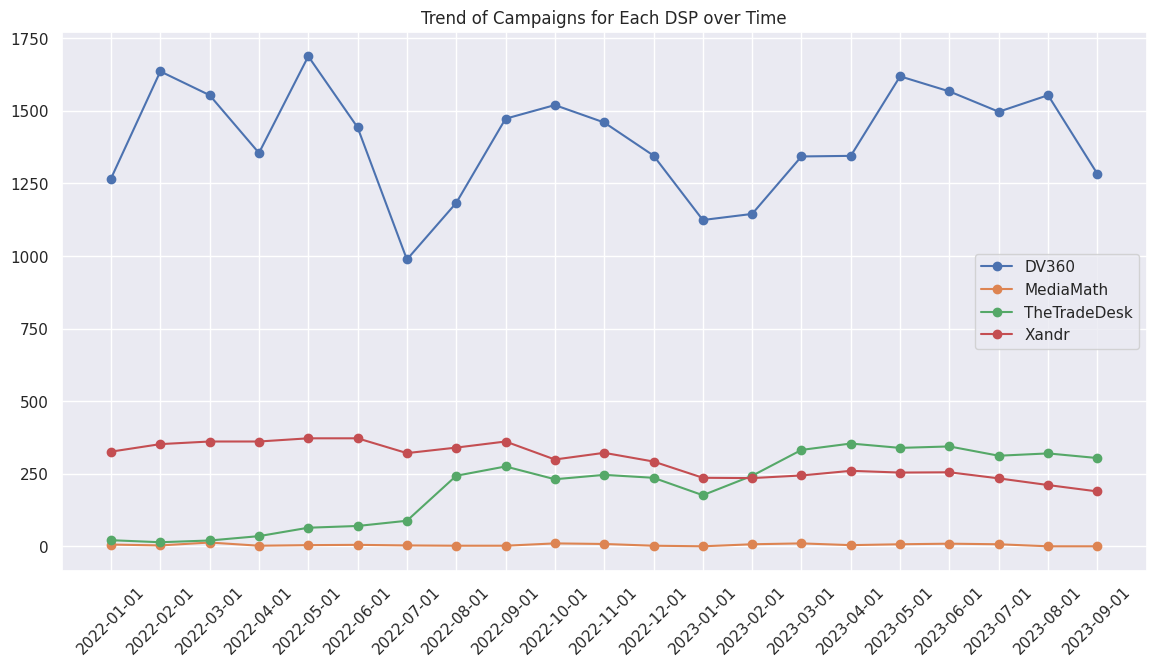

In [ ]:
# Plotting the trend of campaigns for each DSP over time

plt.figure(figsize=(14, 7))
for dsp in campaigns_per_month_dsp_unstacked.columns:
    # Convert the 'Period' index to string
    plt.plot(campaigns_per_month_dsp_unstacked.index.astype(str), campaigns_per_month_dsp_unstacked[dsp], label=dsp, marker='o')

plt.title('Trend of Campaigns for Each DSP over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend()
plt.show()


## Monthly Revenue Evolution for Scibids Active Grouped by Client Typology

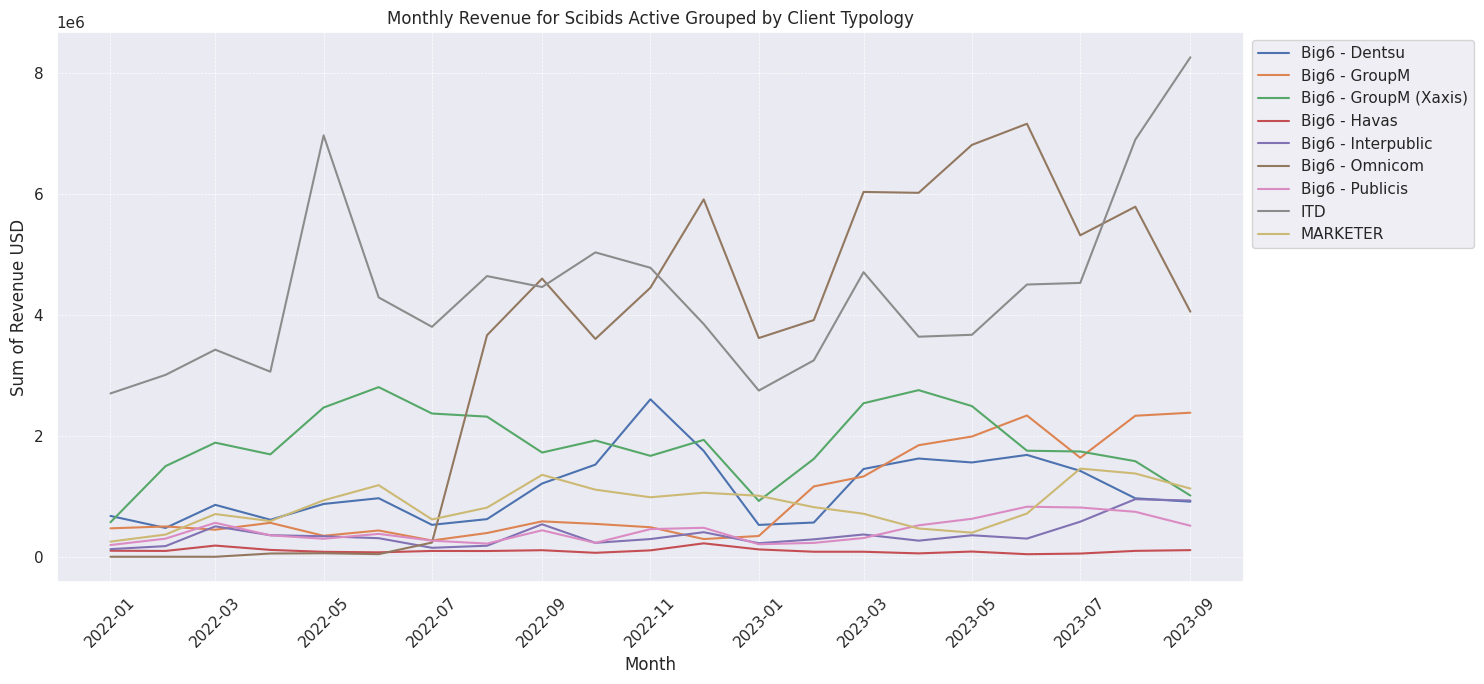

In [ ]:


# Grouping the data by Month and Client Typology for "Scibids Active"
revenue_per_month_active_typology = scibids_active.groupby(['Performance Measures Day Tz Month', 'Clients Characteristics Typology'])['Performance Measures Revenue USD'].sum()

# Unstacking the data for visualization by typology
revenue_per_month_df_active_typology = revenue_per_month_active_typology.unstack('Clients Characteristics Typology').fillna(0)

plt.figure(figsize=(15, 7))

# Looping through each typology to create a line
for typology in revenue_per_month_df_active_typology.columns:
    plt.plot(revenue_per_month_df_active_typology.index, revenue_per_month_df_active_typology[typology], label=typology)

plt.title('Monthly Revenue for Scibids Active Grouped by Client Typology')
plt.xlabel('Month')
plt.ylabel('Sum of Revenue USD')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Monthly Revenue Evolution for Scibids Active Grouped by Region

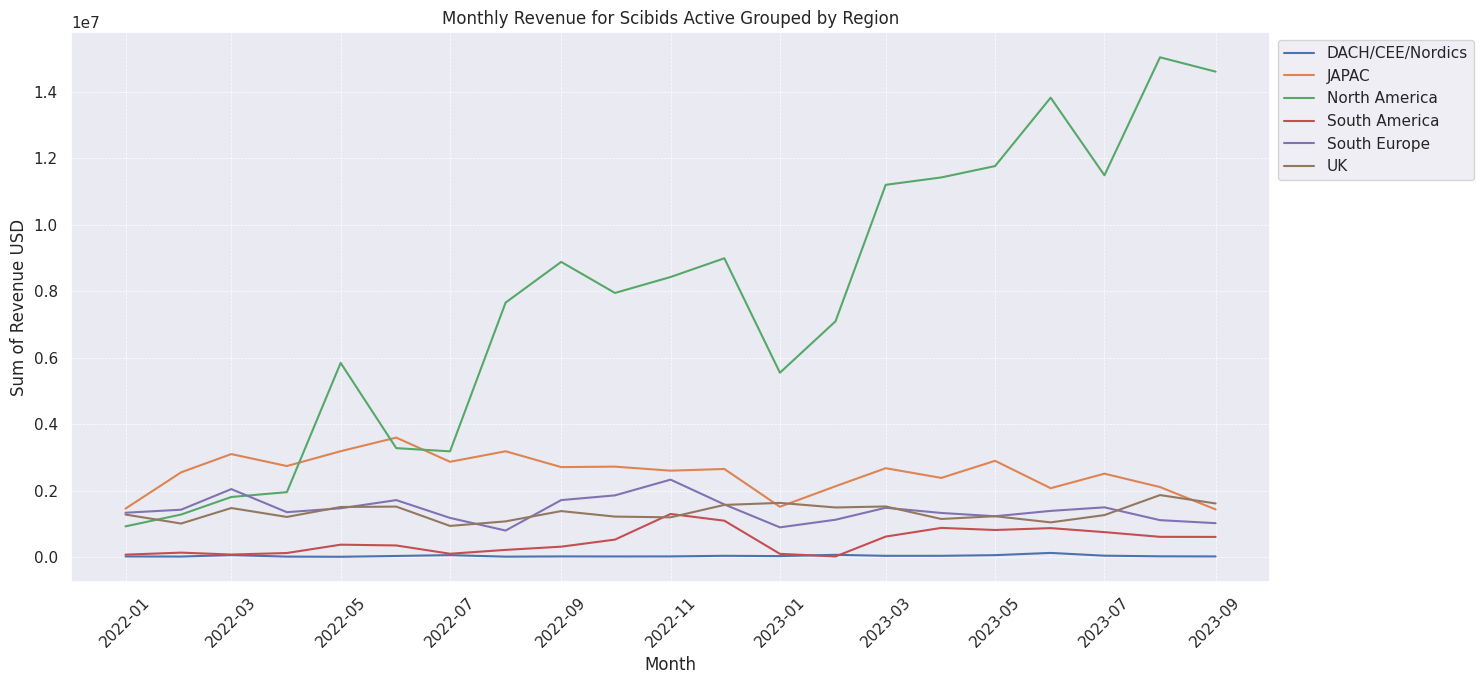

In [ ]:


# Grouping the data by Month and Region for "Scibids Active"
revenue_per_month_active_region = scibids_active.groupby(['Performance Measures Day Tz Month', 'Clients Characteristics Scibids Region'])['Performance Measures Revenue USD'].sum()

# Unstacking the data for visualization by region
revenue_per_month_df_active_region = revenue_per_month_active_region.unstack('Clients Characteristics Scibids Region').fillna(0)

plt.figure(figsize=(15, 7))

# Looping through each region to create a line
for region in revenue_per_month_df_active_region.columns:
    plt.plot(revenue_per_month_df_active_region.index, revenue_per_month_df_active_region[region], label=region)

plt.title('Monthly Revenue for Scibids Active Grouped by Region')
plt.xlabel('Month')
plt.ylabel('Sum of Revenue USD')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
revenue_per_month_region = scibids_active.groupby(['Performance Measures Day Tz Month', 'Clients Characteristics Scibids Region', 'Clients Characteristics Typology', 'Insertion Orders Distinct Count of IOs'])['Performance Measures Revenue USD'].sum()
revenue_per_month_region



Performance Measures Day Tz Month  Clients Characteristics Scibids Region  Clients Characteristics Typology  Insertion Orders Distinct Count of IOs
2022-01-01                         DACH/CEE/Nordics                        Big6 - GroupM                     3                                           8495.585697
                                                                           ITD                               1                                            837.500854
                                                                                                             2                                           9722.902047
                                                                                                             5                                           2509.842579
                                   JAPAC                                   Big6 - Dentsu                     1                                           4684.116320
                           

## KPI trends per insertion orders and revenue

In [ ]:
# Exploring trends in specific KPIs over time.

# Grouping by month and KPI for campaign counts and revenue
campaigns_per_month_kpi = scibids_active.groupby(['Performance Measures Day Tz Month', 'Insertion Orders Kpi to Optimize'])['Insertion Orders Distinct Count of IOs'].sum()
revenue_per_month_kpi = scibids_active.groupby(['Performance Measures Day Tz Month', 'Insertion Orders Kpi to Optimize'])['Performance Measures Revenue USD'].sum()

# Unstacking for visualization
campaigns_per_month_kpi_unstacked = campaigns_per_month_kpi.unstack('Insertion Orders Kpi to Optimize').fillna(0)
revenue_per_month_kpi_unstacked = revenue_per_month_kpi.unstack('Insertion Orders Kpi to Optimize').fillna(0)

campaigns_per_month_kpi_unstacked, revenue_per_month_kpi_unstacked


(Insertion Orders Kpi to Optimize     CPA  CPA_PC    CPC   CPCV  CPIAVC    CPM  \
 Performance Measures Day Tz Month                                               
 2022-01-01                         499.0    71.0  650.0   24.0     0.0   67.0   
 2022-02-01                         571.0    67.0  718.0   37.0     0.0   90.0   
 2022-03-01                         614.0    91.0  412.0   49.0     1.0   97.0   
 2022-04-01                         609.0    71.0  249.0   49.0     3.0   75.0   
 2022-05-01                         636.0    56.0  264.0   53.0     2.0   96.0   
 2022-06-01                         601.0    56.0  182.0   64.0     2.0   70.0   
 2022-07-01                         570.0    50.0  149.0   52.0     0.0   48.0   
 2022-08-01                         636.0    42.0  135.0  110.0     0.0  106.0   
 2022-09-01                         740.0    46.0  156.0  119.0     0.0  117.0   
 2022-10-01                         738.0    41.0  151.0  132.0     0.0  105.0   
 2022-11-01     

In [ ]:
# Grouping by month, KPI, and region to get the sum of Insertion Orders and Revenue
kpi_trends = scibids_active.groupby(['Performance Measures Day Tz Month',
                                     'unified_KPI',
                                     'Clients Characteristics Scibids Region'])[['Insertion Orders Distinct Count of IOs',
                                                                                'Performance Measures Revenue USD']].sum().reset_index()

# Normalizing the Insertion Orders and Revenue columns by month
kpi_trends['Normalized IOs'] = kpi_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
kpi_trends['Normalized Revenue'] = kpi_trends.groupby('Performance Measures Day Tz Month')['Performance Measures Revenue USD'].apply(lambda x: x / x.sum() * 100)

# Selecting a subset of columns for clarity
kpi_trends = kpi_trends[['Performance Measures Day Tz Month', 'unified_KPI', 'Clients Characteristics Scibids Region', 'Normalized IOs', 'Normalized Revenue']]

kpi_trends


<ipython-input-113-6e383d636bbb>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  kpi_trends['Normalized IOs'] = kpi_trends.groupby('Performance Measures Day Tz Month')['Insertion Orders Distinct Count of IOs'].apply(lambda x: x / x.sum() * 100)
<ipython-input-113-6e383d636bbb>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .

Performance Measures Day Tz Month unified_KPI  \
0                           2022-01-01         CPA   
1                           2022-01-01         CPA   
2                           2022-01-01         CPA   
3                           2022-01-01         CPA   
4                           2022-01-01         CPA   
...                                ...         ...   
1035                        2023-09-01       V-CPM   
1036                        2023-09-01       V-CPM   
1037                        2023-09-01         VTR   
1038                        2023-09-01         VTR   
1039                        2023-09-01         VTR   

     Clients Characteristics Scibids Region  Normalized IOs  \
0                                     JAPAC       10.061728   
1                             North America        5.740741   
2                             South America        0.740741   
3                              South Europe        6.172840   
4                                        UK        8.086420   
...                                     ...             ...   
1035                          North America        4.448198   
1036                                     UK        0.056306   
1037                          North America        0.225225   
1038                          South America        0.112613   
1039                           South Europe        1.295045   

      Normalized Revenue  
0              17.535545  
1               7.940735  
2               0.150646  
3               8.157724  
4              17.367840  
...                  ...  
1035           10.444831  
1036            0.062465  
1037            0.228340  
1038            0.009151  
1039            0.559693  

[1040 rows x 5 columns]

<ipython-input-114-ef8682c225ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='unified_KPI', ci=None)
<ipython-input-114-ef8682c225ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='unified_KPI', ci=None)
<ipython-input-114-ef8682c225ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='unified_KPI', ci=None)
<ipython-input-114-ef8682c225ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='unified_KPI', ci=None)


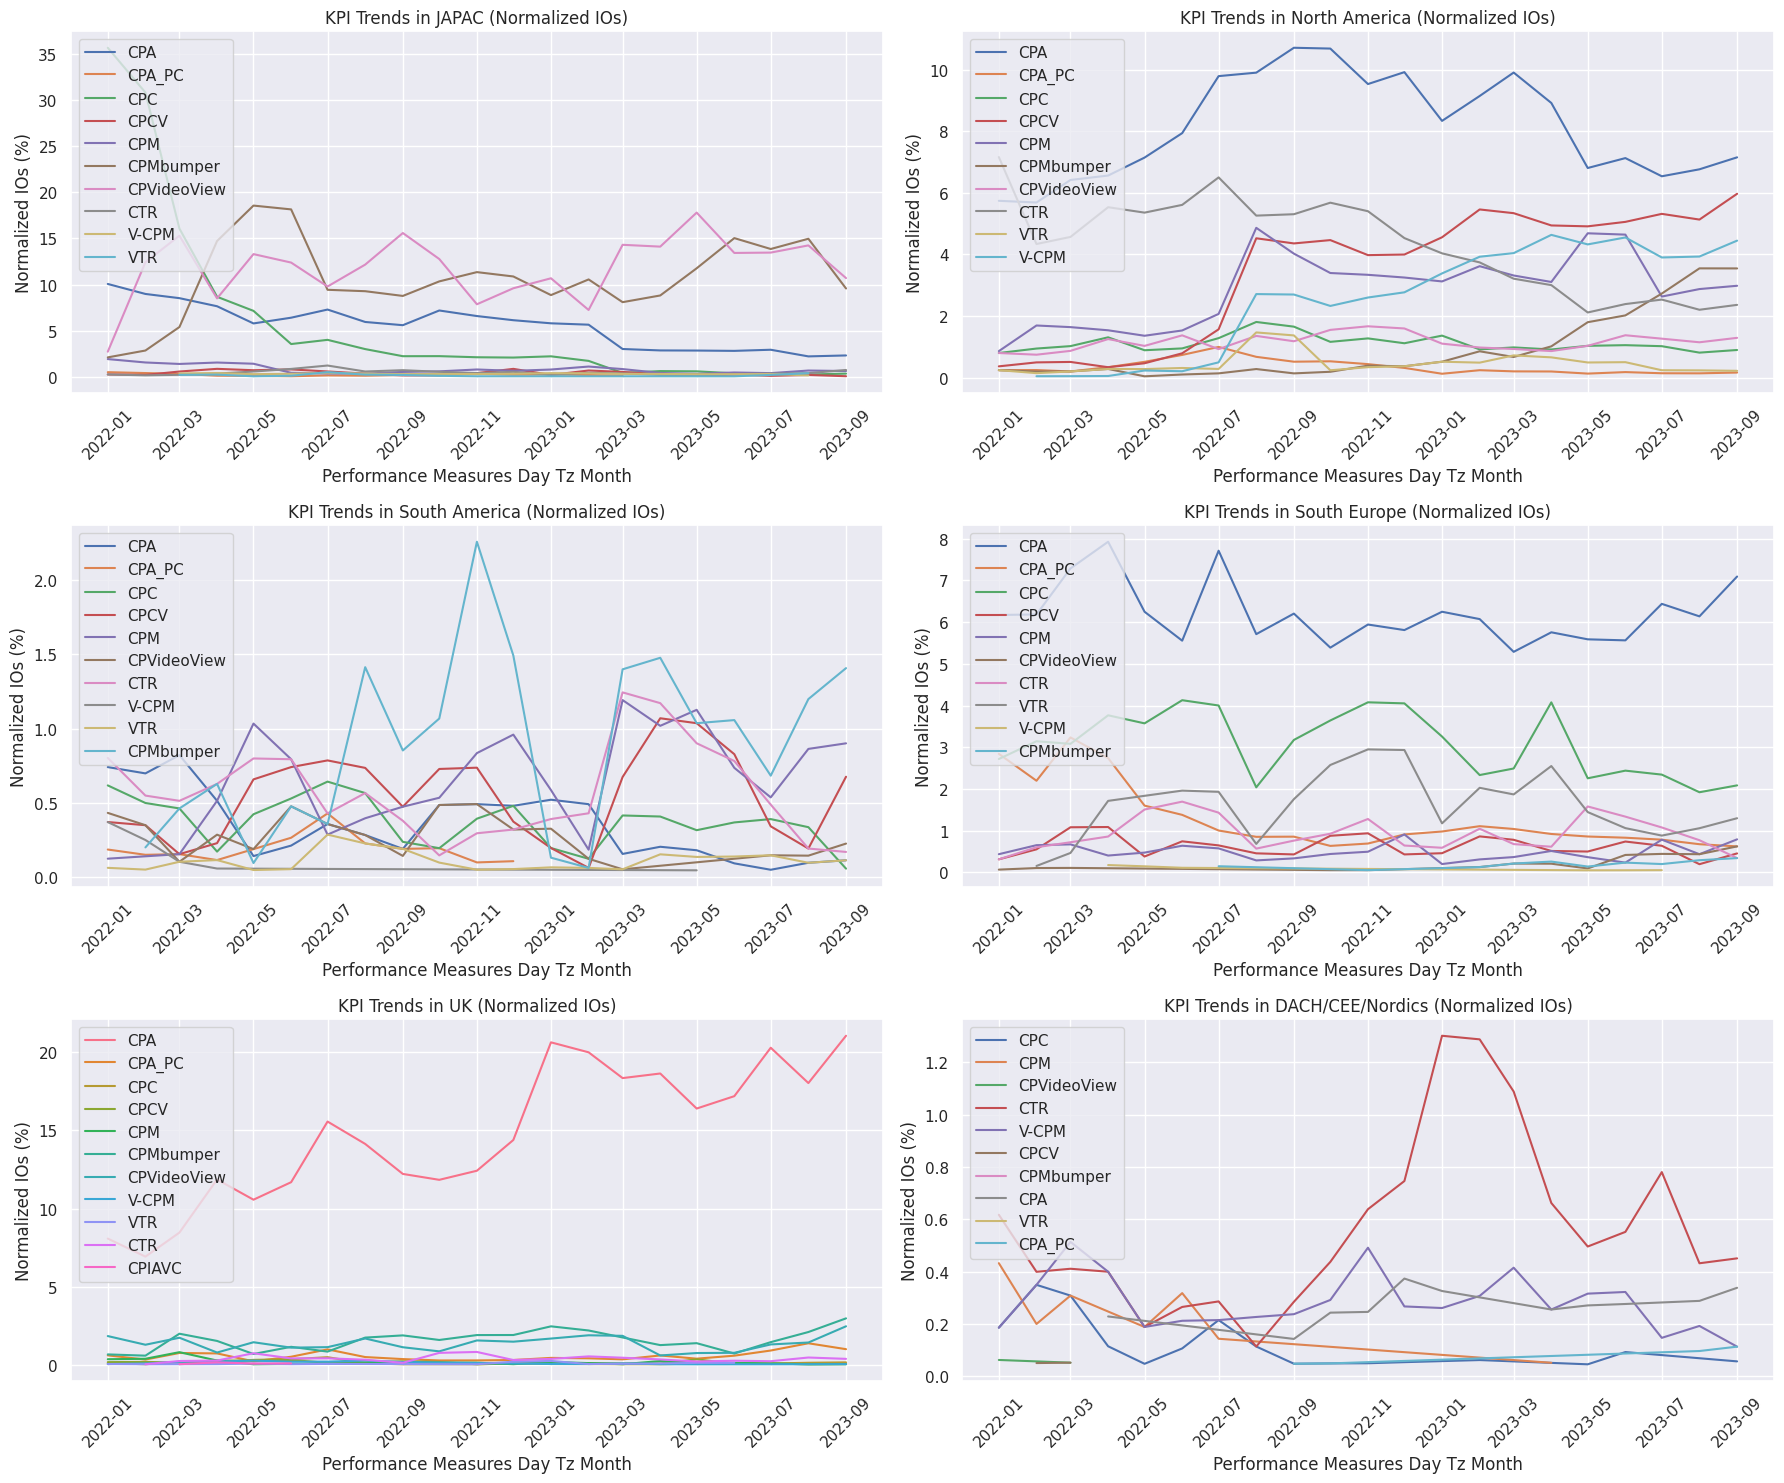

In [ ]:
# List of unique regions in the dataset
regions = kpi_trends['Clients Characteristics Scibids Region'].unique()

# Setting up the figure
plt.figure(figsize=(18, 15))

# Creating a line plot for each region
for idx, region in enumerate(regions, start=1):
    plt.subplot(3, 2, idx)
    region_data = kpi_trends[kpi_trends['Clients Characteristics Scibids Region'] == region]
    sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized IOs', hue='unified_KPI', ci=None)
    plt.title(f'KPI Trends in {region} (Normalized IOs)')
    plt.xticks(rotation=45)
    plt.ylabel('Normalized IOs (%)')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-31-a5bb2f026629>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='unified_KPI', ci=None)
<ipython-input-31-a5bb2f026629>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='unified_KPI', ci=None)
<ipython-input-31-a5bb2f026629>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='unified_KPI', ci=None)
<ipython-input-31-a5bb2f026629>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='unified_KPI', c

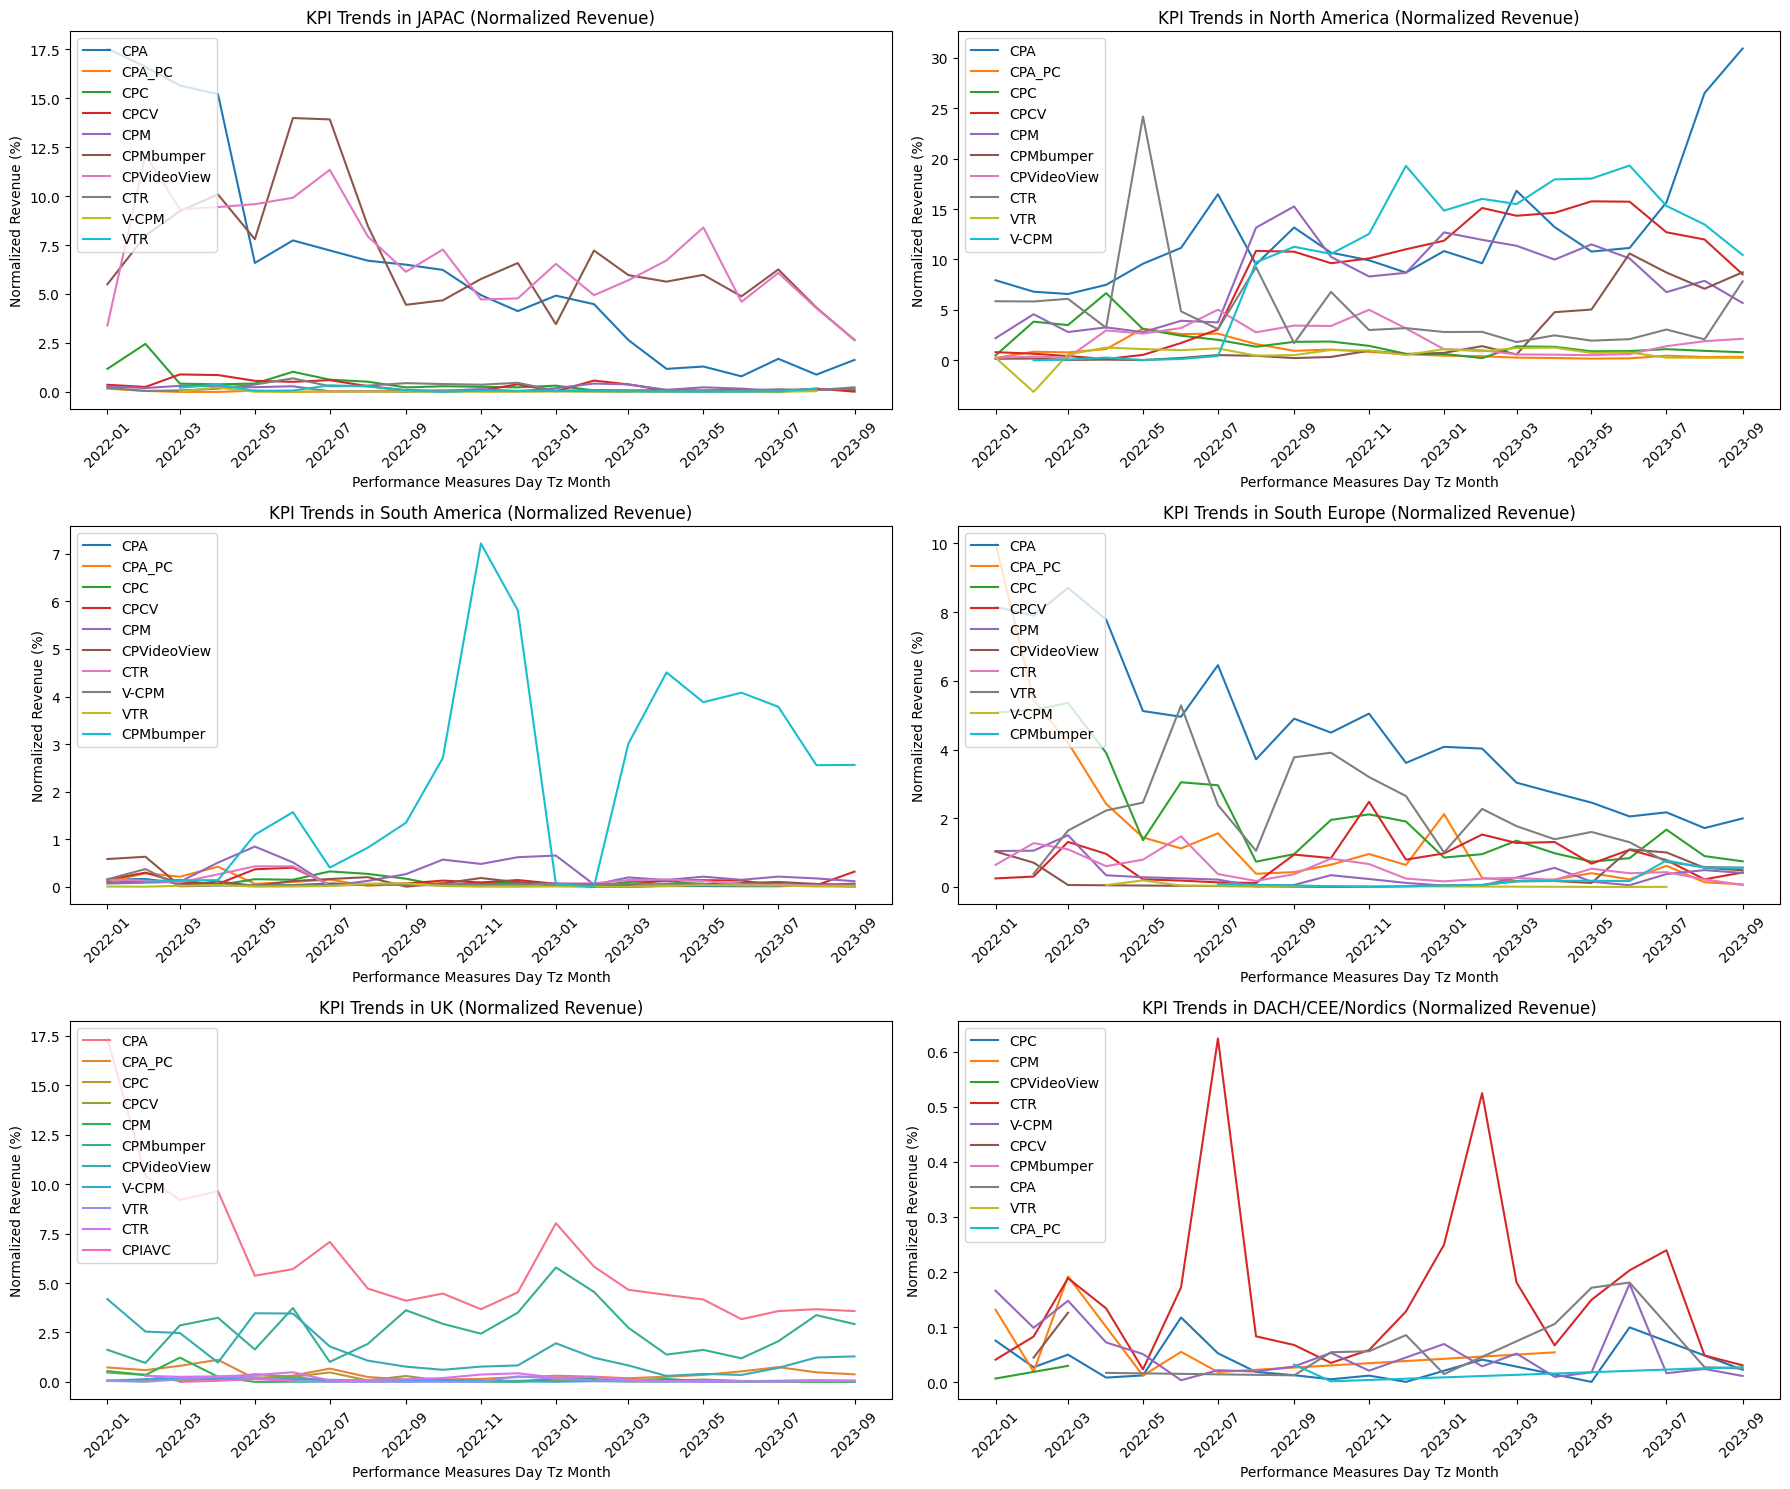

In [ ]:
# Setting up the figure for normalized revenue plots
plt.figure(figsize=(18, 15))

# Creating a line plot for each region based on normalized revenue
for idx, region in enumerate(regions, start=1):
    plt.subplot(3, 2, idx)
    region_data = kpi_trends[kpi_trends['Clients Characteristics Scibids Region'] == region]
    sns.lineplot(data=region_data, x='Performance Measures Day Tz Month', y='Normalized Revenue', hue='unified_KPI', ci=None)
    plt.title(f'KPI Trends in {region} (Normalized Revenue)')
    plt.xticks(rotation=45)
    plt.ylabel('Normalized Revenue (%)')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()




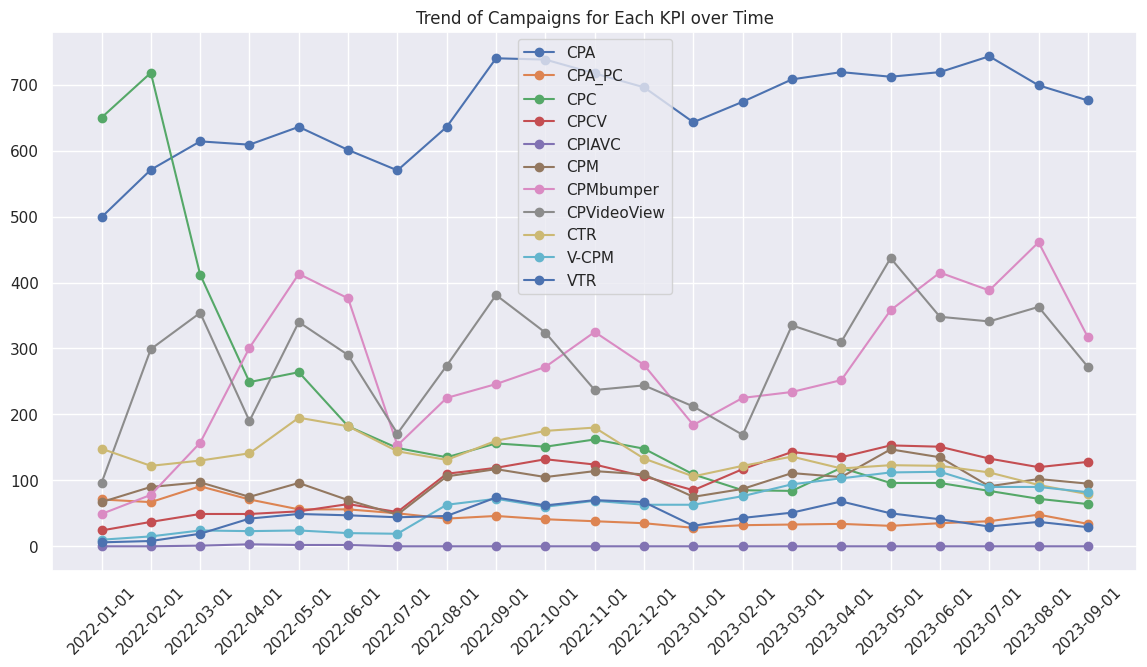

In [ ]:
# Plotting the trend of campaigns for each KPI over time

plt.figure(figsize=(14, 7))
for kpi in campaigns_per_month_kpi_unstacked.columns:
    # Convert the 'Period' index to string
    plt.plot(campaigns_per_month_kpi_unstacked.index.astype(str), campaigns_per_month_kpi_unstacked[kpi], label=kpi, marker='o')

plt.title('Trend of Campaigns for Each KPI over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.show()



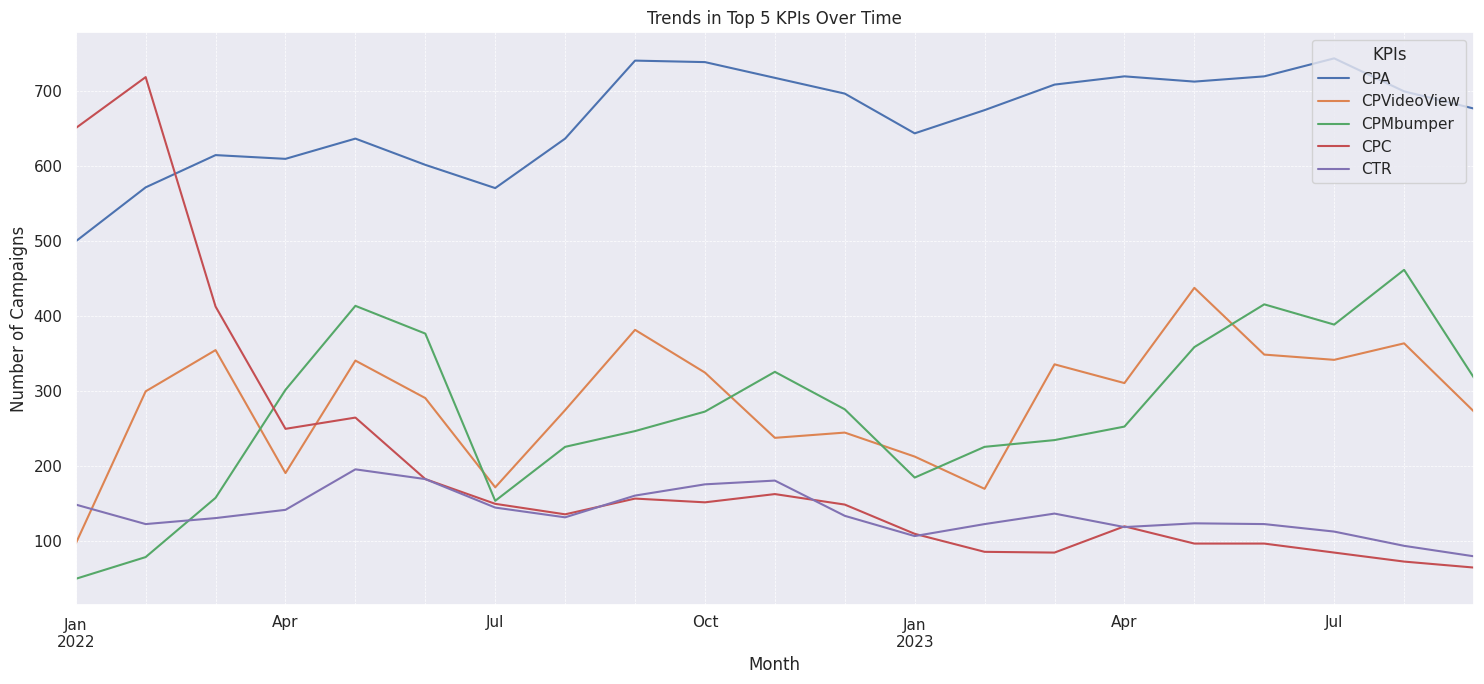

In [ ]:
# Exploring trends in KPIs over time

# Grouping by month and KPI to get the total number of campaigns and revenue for each KPI over time
kpi_trends = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Active'].groupby(['Performance Measures Day Tz Month', 'unified_KPI'])[['Insertion Orders Distinct Count of IOs', 'Performance Measures Revenue USD']].sum()

# Unstacking the KPI values for visualization
kpi_trends_unstacked = kpi_trends['Insertion Orders Distinct Count of IOs'].unstack().fillna(0)

# Plotting the trends for the top 5 KPIs based on the number of campaigns
plt.figure(figsize=(15, 7))
top_kpis = kpi_trends_unstacked.sum().nlargest(5).index
kpi_trends_unstacked[top_kpis].plot(ax=plt.gca())
plt.title('Trends in Top 5 KPIs Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Campaigns')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(title='KPIs')
plt.show()


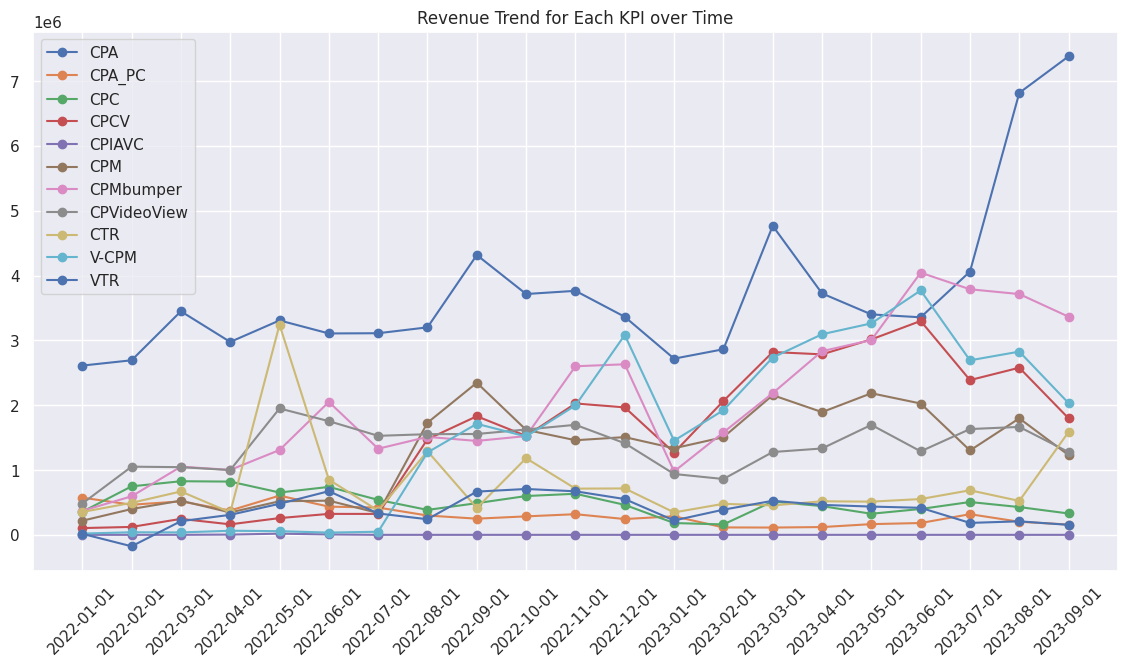

In [ ]:
# Plotting the revenue trend for each KPI over time

plt.figure(figsize=(14, 7))
for kpi in revenue_per_month_kpi_unstacked.columns:
    # Convert the 'Period' index to string
    plt.plot(revenue_per_month_kpi_unstacked.index.astype(str), revenue_per_month_kpi_unstacked[kpi], label=kpi, marker='o')

plt.title('Revenue Trend for Each KPI over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.show()


# Performance measures

## Weighted revenue, CPM, CPC by typology Scibids active

In [ ]:
# Calculate average performance measures by typology, taking into account distinct order ids
typology_segmentation_weighted = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Active'].groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
typology_segmentation_weighted = typology_segmentation_weighted.sort_values(by='Weighted Revenue', ascending=False)

typology_segmentation_weighted

Weighted Revenue  Weighted CPC  Weighted CPM
Clients Characteristics Typology                                              
Big6 - Omnicom                        28110.984751      1.943311      2.206558
Big6 - GroupM                         13070.725312      1.294424      1.167081
MARKETER                              11500.387499     35.796191      2.349462
Big6 - Dentsu                          7377.203229      1.721780      2.282874
Big6 - Interpublic                     6669.592026      1.025153      0.948013
Big6 - Havas                           6313.553292      2.387223      2.569664
Big6 - Publicis                        5294.266224     38.506469      1.355668
ITD                                    4734.758497     22.409190     70.947796
Big6 - GroupM (Xaxis)                  4711.763298      3.194146      1.624868

## Weighted revenue, CPM, CPC by typology groupoed by region

In [ ]:
# Calculate average performance measures by region and typology, taking into account distinct order ids
region_typology_segmentation_weighted = scibids_active.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_typology_segmentation_weighted = region_typology_segmentation_weighted.sort_values(by='Weighted Revenue', ascending=False)

region_typology_segmentation_weighted


Weighted Revenue  \
Clients Characteristics Scibids Region Clients Characteristics Typology                     
North America                          Big6 - Interpublic                    30643.965365   
                                       Big6 - Omnicom                        29261.185065   
                                       Big6 - GroupM                         28004.999901   
South America                          Big6 - Dentsu                         24437.400469   
JAPAC                                  MARKETER                              17797.702313   
North America                          MARKETER                              16753.308383   
                                       Big6 - GroupM (Xaxis)                 12985.061857   
UK                                     Big6 - GroupM                         12400.004147   
North America                          Big6 - Havas                          11853.145177   
UK                                     Big6 - GroupM (Xaxis)                 11292.002206   
                                       Big6 - Interpublic                    10966.787032   
North America                          ITD                                   10211.376804   
                                       Big6 - Publicis                        9778.400092   
UK                                     MARKETER                               8822.597696   
                                       Big6 - Havas                           8415.929925   
                                       Big6 - Omnicom                         8301.341492   
JAPAC                                  Big6 - GroupM                          7031.879127   
                                       Big6 - Havas                           6849.475604   
South Europe                           Big6 - Publicis                        6808.535107   
                                       Big6 - Dentsu                          5559.154344   
South America                          Big6 - GroupM                          5433.297522   
JAPAC                                  Big6 - Dentsu                          5379.594369   
                                       Big6 - Interpublic                     5247.592277   
South Europe                           Big6 - GroupM                          4916.121827   
                                       Big6 - Omnicom                         4448.016345   
                                       ITD                                    4439.298757   
JAPAC                                  Big6 - GroupM (Xaxis)                  4284.518971   
South America                          Big6 - Interpublic                     4259.792259   
South Europe                           Big6 - Havas                           3843.095530   
                                       MARKETER                               3227.050283   
                                       Big6 - GroupM (Xaxis)                  3172.728030   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                  3039.011942   
JAPAC                                  Big6 - Publicis                        2936.715759   
                                       Big6 - Omnicom                         2760.087396   
South America                          MARKETER                               2677.795754   
DACH/CEE/Nordics                       MARKETER                               2663.535053   
UK                                     ITD                                    2024.627654   
South America                          ITD                                    2008.615230   
DACH/CEE/Nordics                       ITD                                    1956.046261   
South America                          Big6 - GroupM (Xaxis)                  1717.526366   
JAPAC                                  ITD                                    1430.728238   
South America                          Big6 - Havas                       

## Client and advertiser details

In [ ]:
# Grouping by typology, region, DSP, sub DSP, company name, client name, and advertiser name
# and calculating the weighted measures
summary_counts = scibids_active.groupby(['Clients Characteristics Typology',
                                         'Clients Characteristics Scibids Region',
                                         'Accessible IDs Dsp',
                                         'Accessible IDs Sub Dsp',
                                         'Clients Characteristics Company Name',
                                         'Accessible IDs Client Name',
                                         'Accessible IDs Advertiser Name']).apply(
    lambda df: pd.Series({
        'Count': df.shape[0],
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

summary_counts

Clients Characteristics Typology Clients Characteristics Scibids Region  \
0                       Big6 - Dentsu                                  JAPAC   
1                       Big6 - Dentsu                                  JAPAC   
2                       Big6 - Dentsu                                  JAPAC   
3                       Big6 - Dentsu                                  JAPAC   
4                       Big6 - Dentsu                                  JAPAC   
...                               ...                                    ...   
2532                         MARKETER                                     UK   
2533                         MARKETER                                     UK   
2534                         MARKETER                                     UK   
2535                         MARKETER                                     UK   
2536                         MARKETER                                     UK   

     Accessible IDs Dsp Accessible IDs Sub Dsp  \
0                 DV360                Display   
1                 DV360                Display   
2                 DV360                Display   
3                 DV360                Display   
4                 DV360                Display   
...                 ...                    ...   
2532          MediaMath                Display   
2533          MediaMath                Display   
2534              Xandr                Display   
2535              Xandr                Display   
2536              Xandr                Display   

     Clients Characteristics Company Name  \
0                        Dentsu Indonesia   
1                            Dentsu Japan   
2                            Dentsu Japan   
3                Dentsu Solutions Pte Ltd   
4            Sokrati Technologies Pvt Ltd   
...                                   ...   
2532                               Betway   
2533                               Betway   
2534             LC INTERNATIONAL LIMITED   
2535             LC INTERNATIONAL LIMITED   
2536                       Pokerstars ROW   

                Accessible IDs Client Name  \
0     DAN Indonesia (Dentsu Aegis Network)   
1                      DENTSU DIGITAL Inc.   
2                      DENTSU DIGITAL Inc.   
3            dentsu – Heineken c/o Redstar   
4          Angel Broking c/o Sokrati India   
...                                    ...   
2532                            Betway LTD   
2533                            Betway LTD   
2534              LC International Limited   
2535              LC International Limited   
2536                            Pokerstars   

           Accessible IDs Advertiser Name  Count  Weighted Revenue  \
0                          ULTRA MIMI_DSP    1.0        620.054311   
1     [DD]Coca-Cola(Japan)Company_AQ(DCM)    1.0        904.713605   
2            [DD]McDonald’s Company Japan    1.0       2612.647631   
3                             SG_HEINEKEN   23.0       8856.436675   
4                  Angel_Broking_IN DV360    3.0        640.636800   
...                                   ...    ...               ...   
2532                        BetWay Sports    5.0       4841.140013   
2533                          Brazil (BR)    1.0       1177.311145   
2534                           Foxy Bingo    2.0       2416.256385   
2535                           Gala Bingo    2.0       1912.127820   
2536                           Pokerstars   19.0       3078.982221   

      Weighted CPC  Weighted CPM  
0         0.047638      0.979959  
1         0.345839      0.560830  
2         0.090107      0.074548  
3         1.311921      4.431671  
4         0.086530      0.077820  
...            ...           ...  
2532     19.200153     25.819340  
2533      0.000000      1.561414  
2534      4.455729      4.804919  
2535      1.889471      1.729603  
2536      0.787921      0.907438  

[2537 rows x 11 columns]

## Weighted revenue, CPM, CPC by typology without Scibids

In [ ]:
# Calculate average performance measures by typology, taking into account distinct order ids
typology_segmentation_weighted_without = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'].groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue 2': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC 2': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM 2': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)


typology_segmentation_weighted_without

Weighted Revenue 2  Weighted CPC 2  \
Clients Characteristics Typology                                       
Big6 - Dentsu                            3104.964949        2.595384   
Big6 - GroupM                            6205.859755        2.078139   
Big6 - GroupM (Xaxis)                    2612.029175       14.584661   
Big6 - Havas                             2664.098568        2.369307   
Big6 - Interpublic                       3173.402642        0.828373   
Big6 - Omnicom                           6887.558724        4.292975   
Big6 - Publicis                          1356.932367        6.952286   
ITD                                      2222.534977       39.855938   
MARKETER                                 3294.909989       26.243771   

                                  Weighted CPM 2  
Clients Characteristics Typology                  
Big6 - Dentsu                           2.775435  
Big6 - GroupM                           1.563208  
Big6 - GroupM (Xaxis)                   1.415302  
Big6 - Havas                            1.999042  
Big6 - Interpublic                      0.960132  
Big6 - Omnicom                          4.336947  
Big6 - Publicis                         1.049631  
ITD                                   244.353678  
MARKETER                                1.950625

## Weighted revenue, CPM, CPC by typology grouped by region Without Scibids

In [ ]:
# Without

# Calculate average performance measures by region and typology, taking into account distinct order ids
region_typology_without_weighted = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'].groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_typology_without_weighted = region_typology_without_weighted.sort_values(by='Weighted Revenue', ascending=False)

region_typology_without_weighted


Weighted Revenue  \
Clients Characteristics Scibids Region Clients Characteristics Typology                     
North America                          Big6 - Interpublic                    16610.294285   
                                       Big6 - GroupM                         11826.203969   
UK                                     Big6 - GroupM                          8676.547335   
South America                          Big6 - Dentsu                          7733.422550   
North America                          Big6 - GroupM (Xaxis)                  7628.007612   
                                       Big6 - Omnicom                         7318.979742   
                                       ITD                                    7056.866920   
                                       MARKETER                               5568.293751   
UK                                     Big6 - Interpublic                     5415.022162   
South America                          Big6 - GroupM                          5286.516714   
UK                                     Big6 - GroupM (Xaxis)                  4845.879839   
South Europe                           Big6 - Havas                           4185.846636   
JAPAC                                  Big6 - Havas                           3599.711042   
                                       MARKETER                               3331.299947   
South Europe                           Big6 - Omnicom                         3301.111828   
JAPAC                                  Big6 - GroupM                          3196.418552   
                                       Big6 - Dentsu                          3192.567723   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                  2765.500171   
JAPAC                                  Big6 - Interpublic                     2545.962249   
South Europe                           ITD                                    2423.399465   
UK                                     Big6 - Havas                           2273.436716   
JAPAC                                  Big6 - GroupM (Xaxis)                  2206.798057   
UK                                     MARKETER                               2160.621242   
South Europe                           Big6 - Dentsu                          2142.356437   
South America                          ITD                                    2081.946152   
UK                                     Big6 - Omnicom                         2032.336989   
South Europe                           Big6 - Publicis                        1883.167466   
                                       Big6 - GroupM (Xaxis)                  1775.290113   
                                       Big6 - GroupM                          1552.470075   
JAPAC                                  Big6 - Omnicom                         1458.847418   
DACH/CEE/Nordics                       ITD                                    1223.878042   
South America                          Big6 - Interpublic                     1174.845497   
North America                          Big6 - Havas                           1116.024604   
                                       Big6 - Publicis                        1101.397209   
South America                          Big6 - GroupM (Xaxis)                  1071.271354   
UK                                     ITD                                    1055.573985   
JAPAC                                  Big6 - Publicis                        1047.461371   
South America                          Big6 - Havas                            772.417311   
JAPAC                                  ITD                                     593.904585   
South America                          MARKETER                                545.407305   
South Europe                           MARKETER                                510.975656   
DACH/CEE/Nordics                       Big6 - GroupM                      

## Comparison with and without Scibids by typology and region

In [ ]:


# Concatenate the two dataframes with a multi-level column index
performance_combined = pd.concat([region_typology_without_weighted, region_typology_segmentation_weighted], axis=1, keys=['With Scibids', 'Without Scibids'])

performance_combined




With Scibids  \
                                                                        Weighted Revenue   
Clients Characteristics Scibids Region Clients Characteristics Typology                    
North America                          Big6 - Interpublic                   16610.294285   
                                       Big6 - GroupM                        11826.203969   
UK                                     Big6 - GroupM                         8676.547335   
South America                          Big6 - Dentsu                         7733.422550   
North America                          Big6 - GroupM (Xaxis)                 7628.007612   
                                       Big6 - Omnicom                        7318.979742   
                                       ITD                                   7056.866920   
                                       MARKETER                              5568.293751   
UK                                     Big6 - Interpublic                    5415.022162   
South America                          Big6 - GroupM                         5286.516714   
UK                                     Big6 - GroupM (Xaxis)                 4845.879839   
South Europe                           Big6 - Havas                          4185.846636   
JAPAC                                  Big6 - Havas                          3599.711042   
                                       MARKETER                              3331.299947   
South Europe                           Big6 - Omnicom                        3301.111828   
JAPAC                                  Big6 - GroupM                         3196.418552   
                                       Big6 - Dentsu                         3192.567723   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                 2765.500171   
JAPAC                                  Big6 - Interpublic                    2545.962249   
South Europe                           ITD                                   2423.399465   
UK                                     Big6 - Havas                          2273.436716   
JAPAC                                  Big6 - GroupM (Xaxis)                 2206.798057   
UK                                     MARKETER                              2160.621242   
South Europe                           Big6 - Dentsu                         2142.356437   
South America                          ITD                                   2081.946152   
UK                                     Big6 - Omnicom                        2032.336989   
South Europe                           Big6 - Publicis                       1883.167466   
                                       Big6 - GroupM (Xaxis)                 1775.290113   
                                       Big6 - GroupM                         1552.470075   
JAPAC                                  Big6 - Omnicom                        1458.847418   
DACH/CEE/Nordics                       ITD                                   1223.878042   
South America                          Big6 - Interpublic                    1174.845497   
North America                          Big6 - Havas                          1116.024604   
                                       Big6 - Publicis                       1101.397209   
South America                          Big6 - GroupM (Xaxis)                 1071.271354   
UK                                     ITD                                   1055.573985   
JAPAC                                  Big6 - Publicis                       1047.461371   
South America                          Big6 - Havas                           772.417311   
JAPAC                                  ITD                                    593.904585   
South America                          MARKETER                               545.407305   
South Europe                           MARKETER                               510.975656   
DACH/CEE/Nordics            

In [ ]:
performance_combined.to_excel('performance_combined.xlsx')
files.download('performance_combined.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploring the unusually high values by checking distribution

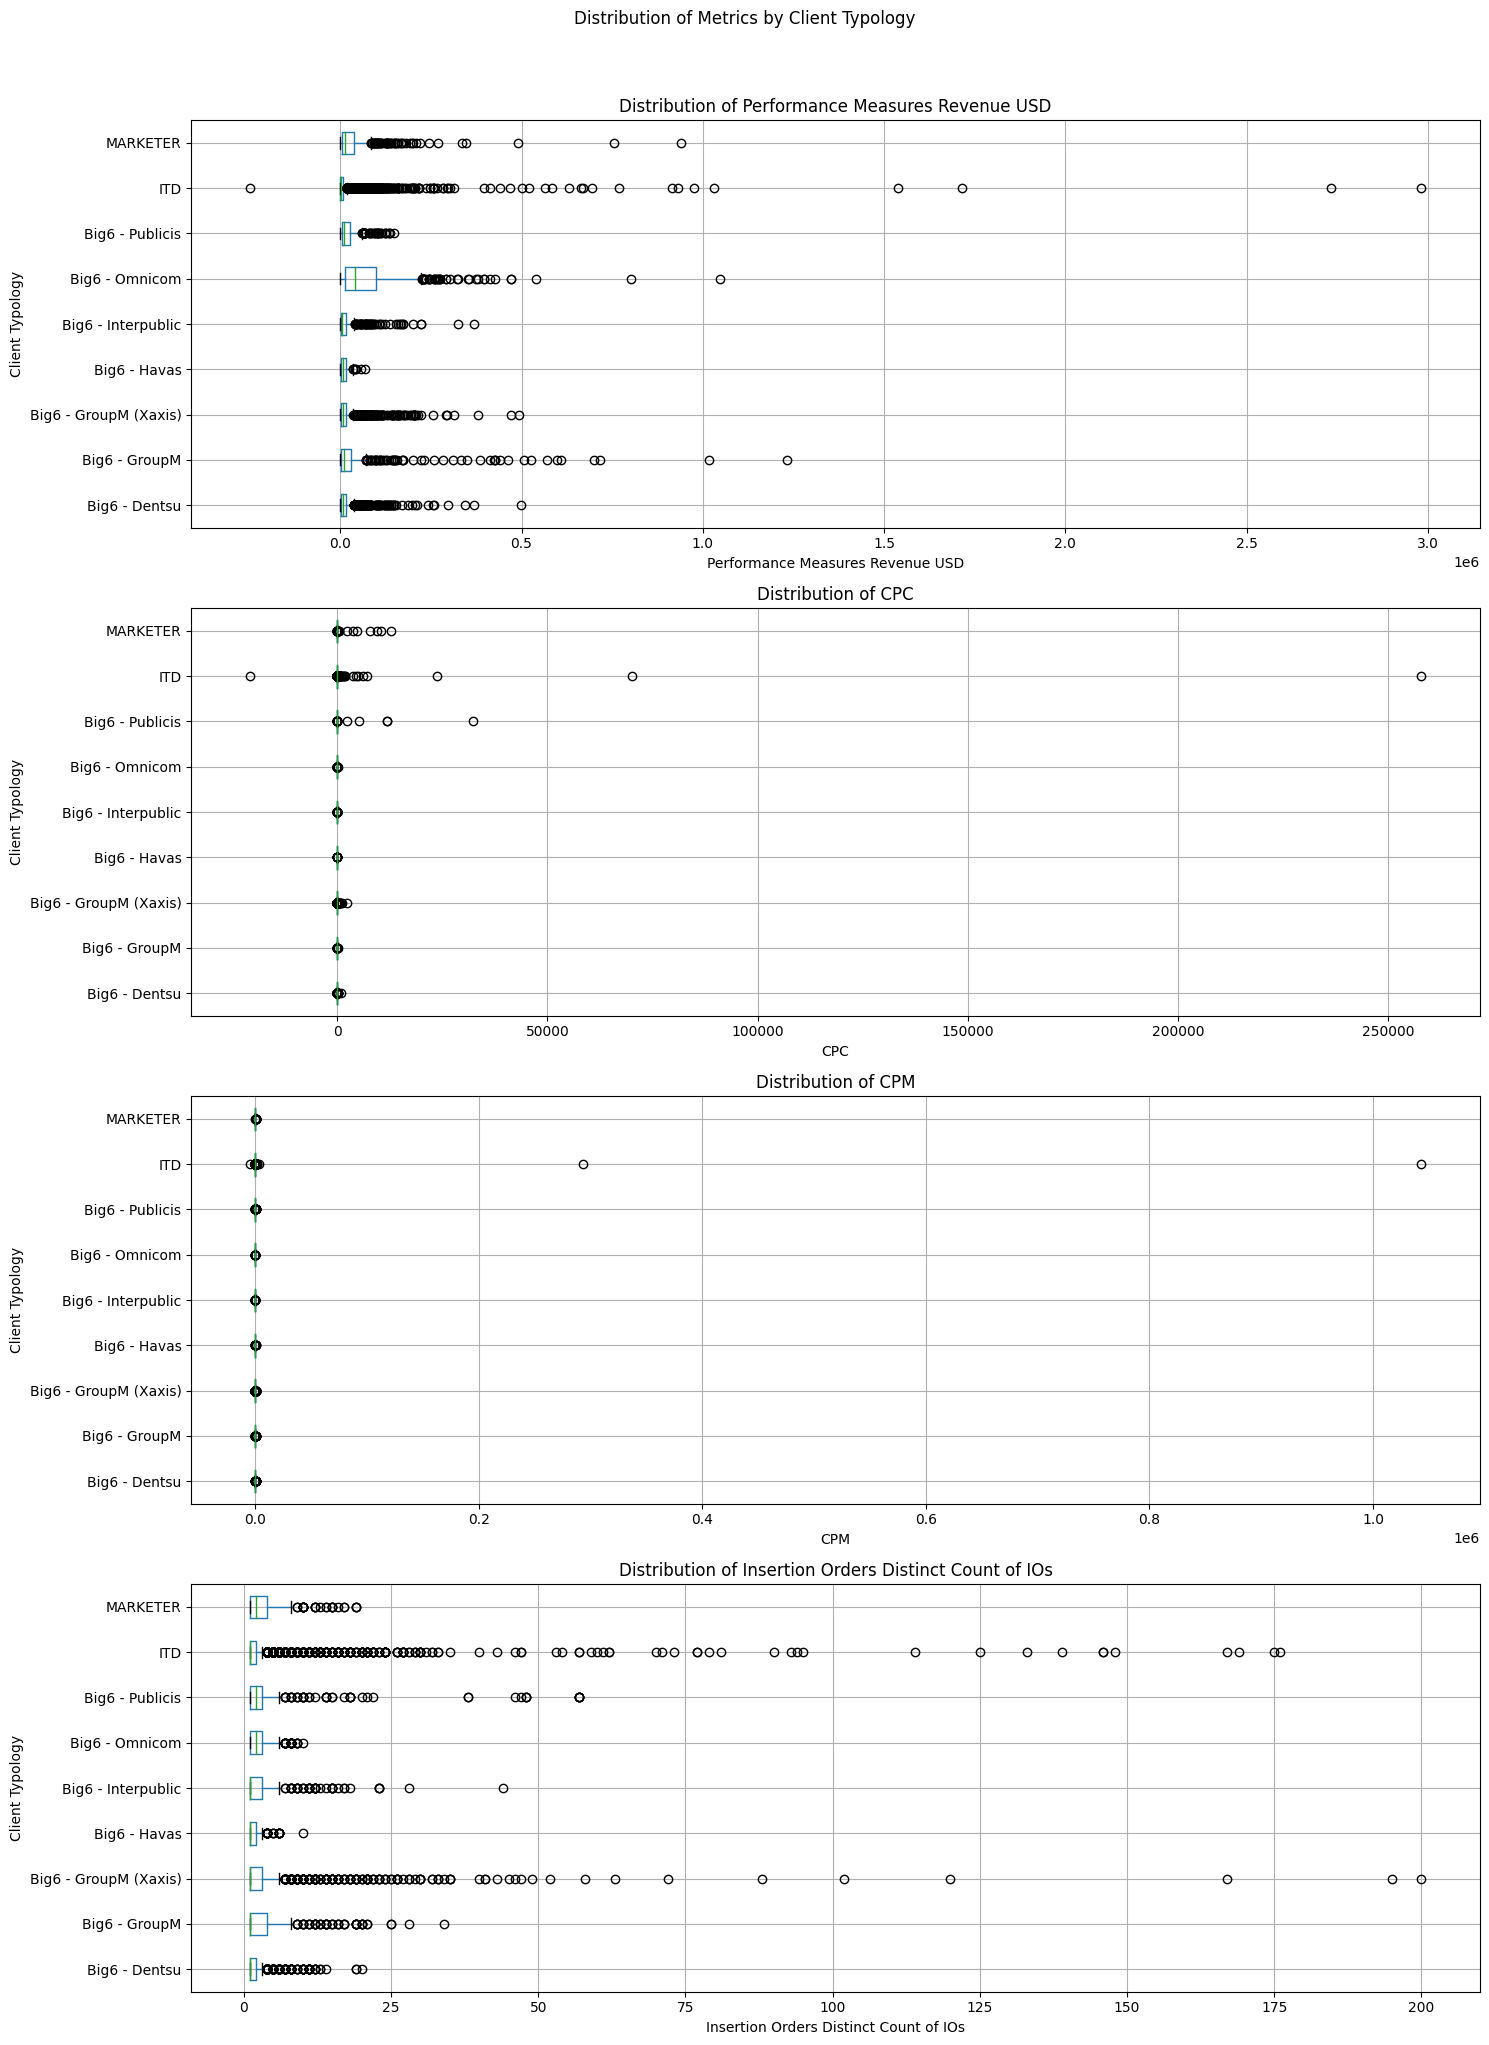

In [ ]:
# unusually high values

# List of columns to inspect
scibids_active

columns_to_inspect = [
     'Performance Measures Revenue USD',
    'CPC',
    'CPM',
    'Insertion Orders Distinct Count of IOs'

]

# Plotting the distributions for each column grouped by typology
fig, axes = plt.subplots(nrows=len(columns_to_inspect), ncols=1, figsize=(15, 20))

for i, col in enumerate(columns_to_inspect):
    scibids_active.boxplot(column=col, by='Clients Characteristics Typology', ax=axes[i], vert=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Client Typology')

plt.tight_layout()
plt.suptitle('Distribution of Metrics by Client Typology', y=1.02)
plt.show()


## Detect outliers Scibids active

In [ ]:
# Function to detect outliers based on the IQR method

# With Scibids

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detecting outliers for the key metrics
outliers_cpc_with = detect_outliers(scibids_active, 'CPC')
outliers_cpm_with = detect_outliers(scibids_active, 'CPM')
outliers_revenue_with = detect_outliers(scibids_active, 'Performance Measures Revenue USD')

outliers_cpc_with, outliers_cpm_with, outliers_revenue_with


(       Clients Characteristics Company ID  \
 20                                     19   
 31                                     43   
 41                                    258   
 46                                    209   
 52                                     43   
 ...                                   ...   
 15004                                 209   
 15006                                   3   
 15012                                  78   
 15018                                  40   
 15023                                 244   
 
       Clients Characteristics Company Name Accessible IDs Client ID  \
 20                                Rommatic                  3624633   
 31                              Zetaglobal                     8437   
 41                          Pokerstars ROW                  3489535   
 46                                Hivewyre                     1672   
 52                              Zetaglobal                     8437   
 ...          

## Detect outliers without Scibids

In [ ]:
# Function to detect outliers based on the IQR method

# Without Scibids

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detecting outliers for the key metrics
outliers_cpc_without = detect_outliers(df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'], 'CPC')
outliers_cpm_without = detect_outliers(df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'], 'CPM')
outliers_revenue_without = detect_outliers(df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'], 'Performance Measures Revenue USD')

outliers_cpc_without, outliers_cpm_without, outliers_revenue_without

outliers_cpc_without_count = outliers_cpc_without.shape[0]
outliers_cpm_without_count = outliers_cpm_without.shape[0]
outliers_revenue_without_count = outliers_revenue_without.shape[0]

outliers_cpc_without_count, outliers_cpm_without_count, outliers_revenue_without_count

(1321, 968, 1493)

In [ ]:
outliers_cpc_with_count = outliers_cpc_with.shape[0]
outliers_cpm_with_count = outliers_cpm_with.shape[0]
outliers_revenue_with_count = outliers_revenue_with.shape[0]

outliers_cpc_with_count, outliers_cpm_with_count, outliers_revenue_with_count

(1705, 1362, 1818)

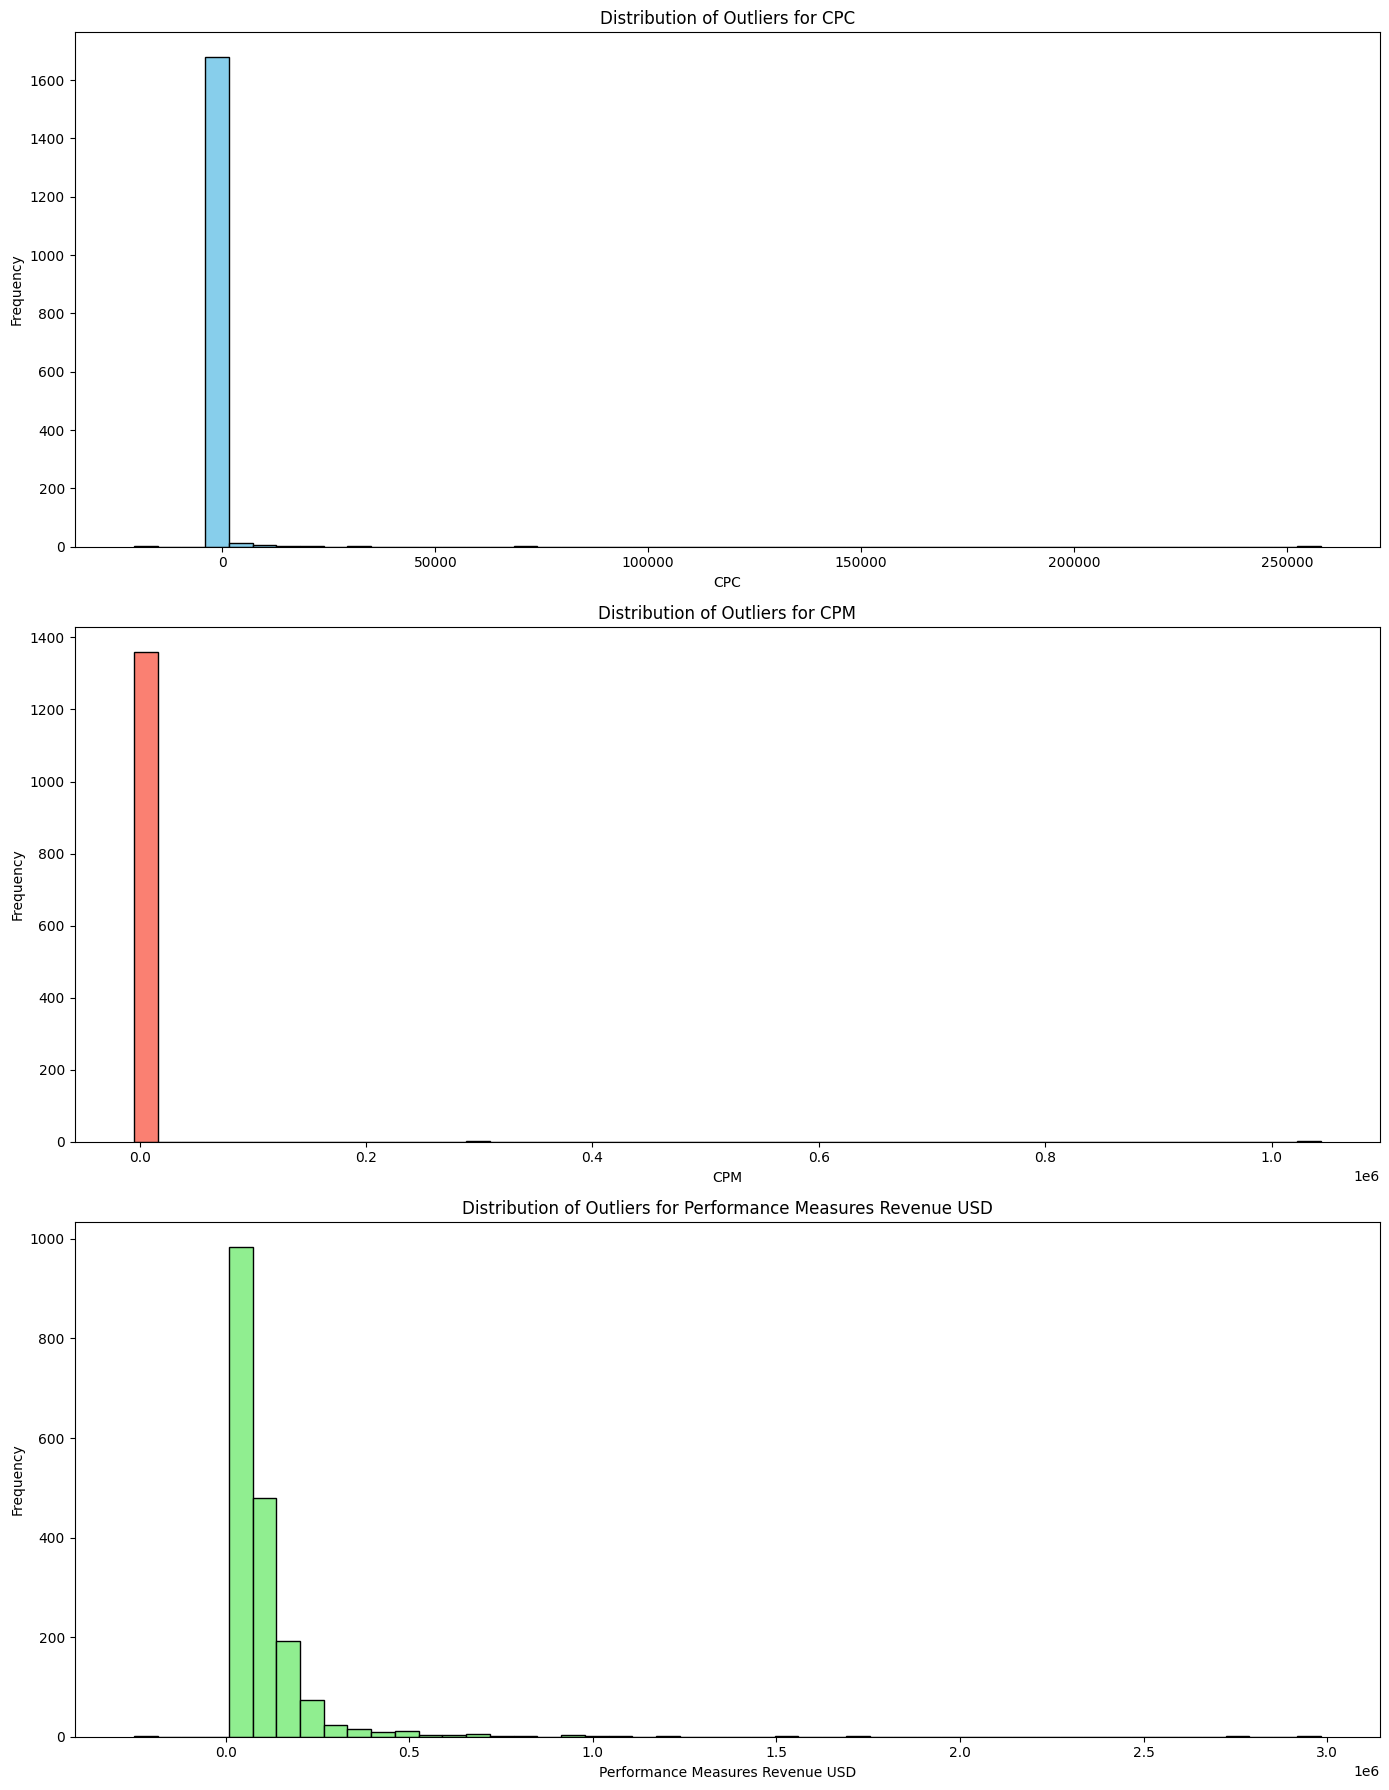

In [ ]:
# Plotting the distribution of outliers for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Plotting outliers for CPC
outliers_cpc_with['CPC'].plot(kind='hist', bins=50, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Outliers for CPC')
axes[0].set_xlabel('CPC')
axes[0].set_ylabel('Frequency')

# Plotting outliers for CPM
outliers_cpm_with['CPM'].plot(kind='hist', bins=50, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Outliers for CPM')
axes[1].set_xlabel('CPM')
axes[1].set_ylabel('Frequency')

# Plotting outliers for Revenue
outliers_revenue_with['Performance Measures Revenue USD'].plot(kind='hist', bins=50, ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Outliers for Performance Measures Revenue USD')
axes[2].set_xlabel('Performance Measures Revenue USD')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Outliers by typology and metric

In [ ]:
# Getting counts of outliers by client typology for each metric
outliers_cpc_typology = outliers_cpc_with['Clients Characteristics Typology'].value_counts()
outliers_cpm_typology = outliers_cpm_with['Clients Characteristics Typology'].value_counts()
outliers_revenue_typology = outliers_revenue_with['Clients Characteristics Typology'].value_counts()

outliers_cpc_typology, outliers_cpm_typology, outliers_revenue_typology

(ITD                      1080
 Big6 - GroupM (Xaxis)     387
 MARKETER                   84
 Big6 - Dentsu              39
 Big6 - GroupM              31
 Big6 - Interpublic         28
 Big6 - Publicis            22
 Big6 - Omnicom             21
 Big6 - Havas               13
 Name: Clients Characteristics Typology, dtype: int64,
 ITD                      796
 Big6 - GroupM (Xaxis)    214
 Big6 - Dentsu            152
 MARKETER                  67
 Big6 - Publicis           56
 Big6 - GroupM             39
 Big6 - Havas              16
 Big6 - Omnicom            14
 Big6 - Interpublic         8
 Name: Clients Characteristics Typology, dtype: int64,
 Big6 - Omnicom           561
 ITD                      494
 Big6 - GroupM (Xaxis)    248
 Big6 - Dentsu            152
 MARKETER                 128
 Big6 - GroupM             98
 Big6 - Publicis           75
 Big6 - Interpublic        56
 Big6 - Havas               6
 Name: Clients Characteristics Typology, dtype: int64)

In [ ]:


# Combining the counts into a single DataFrame for easier visualization
outliers_by_typology = pd.DataFrame({
    'CPC Outliers': outliers_cpc_typology,
    'CPM Outliers': outliers_cpm_typology,
    'Revenue Outliers': outliers_revenue_typology
}).fillna(0).astype(int)

# Sorting by total outliers across all metrics
outliers_by_typology['Total Outliers'] = outliers_by_typology.sum(axis=1)
outliers_by_typology = outliers_by_typology.sort_values(by='Total Outliers', ascending=False)

outliers_by_typology


CPC Outliers  CPM Outliers  Revenue Outliers  \
ITD                            1080           796               494   
Big6 - GroupM (Xaxis)           387           214               248   
Big6 - Omnicom                   21            14               561   
Big6 - Dentsu                    39           152               152   
MARKETER                         84            67               128   
Big6 - GroupM                    31            39                98   
Big6 - Publicis                  22            56                75   
Big6 - Interpublic               28             8                56   
Big6 - Havas                     13            16                 6   

                       Total Outliers  
ITD                              2370  
Big6 - GroupM (Xaxis)             849  
Big6 - Omnicom                    596  
Big6 - Dentsu                     343  
MARKETER                          279  
Big6 - GroupM                     168  
Big6 - Publicis                   153  
Big6 - Interpublic                 92  
Big6 - Havas                       35

In [ ]:
# Count outliers per DSP
dsp_outliers_counts = {
    'CPC Outliers': outliers_cpc_with['Accessible IDs Dsp'].value_counts(),
    'CPM Outliers': outliers_cpm_with['Accessible IDs Dsp'].value_counts(),
    'Revenue Outliers': outliers_revenue_with['Accessible IDs Dsp'].value_counts()
}

# Count outliers per Region
region_outliers_counts = {
    'CPC Outliers': outliers_cpc_with['Clients Characteristics Scibids Region'].value_counts(),
    'CPM Outliers': outliers_cpm_with['Clients Characteristics Scibids Region'].value_counts(),
    'Revenue Outliers': outliers_revenue_with['Clients Characteristics Scibids Region'].value_counts()
}

# Combine counts into DataFrames for easier visualization
outliers_by_dsp = pd.DataFrame(dsp_outliers_counts).fillna(0).astype(int)
outliers_by_region = pd.DataFrame(region_outliers_counts).fillna(0).astype(int)

outliers_by_dsp

CPC Outliers  CPM Outliers  Revenue Outliers
DV360                 1034           609               922
MediaMath                8            10                 2
TheTradeDesk           119           221               699
Xandr                  544           522               195

In [ ]:
outliers_by_region

CPC Outliers  CPM Outliers  Revenue Outliers
DACH/CEE/Nordics            15            25                 0
JAPAC                      420           251               333
North America              865           645              1046
South America               13             2                63
South Europe                46           196               181
UK                         346           243               195

In [ ]:


# Combine the outliers dataframes
combined_outliers = pd.concat([outliers_cpc_with, outliers_cpm_with, outliers_revenue_with]).drop_duplicates()

# Grouping by typology, region, DSP, sub DSP, company name, client name, and advertiser name
# and calculating the weighted measures for the outliers
summary_counts_outliers = combined_outliers.groupby(['Clients Characteristics Typology',
                                                     'Clients Characteristics Scibids Region',
                                                     'Accessible IDs Dsp',
                                                     'Accessible IDs Sub Dsp',
                                                     'Clients Characteristics Company Name',
                                                     'Accessible IDs Client Name',
                                                     'Accessible IDs Advertiser Name']).apply(
    lambda df: pd.Series({
        'Count': df.shape[0],
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

summary_counts_outliers


Clients Characteristics Typology Clients Characteristics Scibids Region  \
0                      Big6 - Dentsu                                  JAPAC   
1                      Big6 - Dentsu                                  JAPAC   
2                      Big6 - Dentsu                                  JAPAC   
3                      Big6 - Dentsu                                  JAPAC   
4                      Big6 - Dentsu                          South America   
..                               ...                                    ...   
856                         MARKETER                                     UK   
857                         MARKETER                                     UK   
858                         MARKETER                                     UK   
859                         MARKETER                                     UK   
860                         MARKETER                                     UK   

    Accessible IDs Dsp Accessible IDs Sub Dsp  \
0                DV360                Display   
1                DV360               TrueView   
2                DV360               TrueView   
3                DV360               TrueView   
4                DV360               TrueView   
..                 ...                    ...   
856              DV360               TrueView   
857              DV360               TrueView   
858              DV360               TrueView   
859          MediaMath                Display   
860              Xandr                Display   

    Clients Characteristics Company Name        Accessible IDs Client Name  \
0           Sokrati Technologies Pvt Ltd        Games 24*7 C/o Amnet India   
1                               Carat AU            Dentsu Programmatic AU   
2           Sokrati Technologies Pvt Ltd           Sokrati C/O AMNET India   
3           Sokrati Technologies Pvt Ltd           Sokrati C/O AMNET India   
4                          Dentsu Mexico  HEINEKEN-MEXICO-MXN-LB-LO-DENTSU   
..                                   ...                               ...   
856                       Pokerstars ROW                     PokerStars IL   
857                       Pokerstars ROW                     PokerStars IL   
858                     Pokerstars SPAIN                     PokerStars IL   
859                               Betway                        Betway LTD   
860                       Pokerstars ROW                        Pokerstars   

    Accessible IDs Advertiser Name  Count  Weighted Revenue  Weighted CPC  \
0                   IN_RummyCircle    4.0      36050.833049      0.013758   
1                        GWF_00560    4.0       3368.377769     13.367117   
2                IN_Bajaj_Auto_DCM    1.0       6237.745592      0.006700   
3         IN_IDFC_BRANDING_DCM_NEW    1.0      44432.648242      0.226194   
4     AMSTEL ULTRA HARD SELTZER MX    1.0      28682.946557      0.281880   
..                             ...    ...               ...           ...   
856                  StarsGroup UK   25.0      15869.932584      9.511025   
857                  StarsGroup US   13.0      13555.042349    188.641891   
858                  StarsGroup ES   16.0       8113.854327      1.911365   
859                  BetWay Sports    3.0       8039.135432     32.000255   
860                     Pokerstars    5.0       3990.723038      0.623014   

     Weighted CPM  
0        0.040415  
1        6.062330  
2        0.027303  
3        1.806709  
4        0.678302  
..            ...  
856      2.945333  
857      6.244060  
858      5.356469  
859     35.680881  
860      0.844122  

[861 rows x 11 columns]

In [ ]:

from google.colab import files
summary_counts_outliers.to_csv('summary_counts_outliers.csv')
files.download('summary_counts_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Isolating the top 1% outliers for each metric to inspect them in more detail
top_1_percent_cpc = outliers_cpc_with.nlargest(int(0.01 * len(outliers_cpc_with)), 'CPC')
top_1_percent_cpm = outliers_cpm_with.nlargest(int(0.01 * len(outliers_cpm_with)), 'CPM')
top_1_percent_revenue = outliers_revenue_with.nlargest(int(0.01 * len(outliers_revenue_with)), 'Performance Measures Revenue USD')

# Checking the basic statistics of the top 1% outliers
top_outliers_stats = {
    'CPC Top 1%': top_1_percent_cpc['CPC'].describe(),
    'CPM Top 1%': top_1_percent_cpm['CPM'].describe(),
    'Revenue Top 1%': top_1_percent_revenue['Performance Measures Revenue USD'].describe()
}

pd.DataFrame(top_outliers_stats)


CPC Top 1%    CPM Top 1%  Revenue Top 1%
count      17.000000  1.300000e+01    1.800000e+01
mean    28517.874531  1.033641e+05    1.194136e+06
std     61310.561611  2.937458e+05    6.660831e+05
min      3832.689500  8.898436e+01    6.932099e+05
25%      5297.800286  1.573128e+02    7.772232e+05
50%      9480.653721  4.436454e+02    9.571671e+05
75%     12726.722900  1.066787e+03    1.186696e+06
max    257960.750000  1.043320e+06    2.982465e+06

## Outliers by region and DSP

In [ ]:
# Grouping the top outliers by Region and DSP to see the counts
region_outliers_counts = {
    'CPC Top 1%': top_1_percent_cpc['Clients Characteristics Scibids Region'].value_counts(),
    'CPM Top 1%': top_1_percent_cpm['Clients Characteristics Scibids Region'].value_counts(),
    'Revenue Top 1%': top_1_percent_revenue['Clients Characteristics Scibids Region'].value_counts()
}

dsp_outliers_counts = {
    'CPC Top 1%': top_1_percent_cpc['Accessible IDs Dsp'].value_counts(),
    'CPM Top 1%': top_1_percent_cpm['Accessible IDs Dsp'].value_counts(),
    'Revenue Top 1%': top_1_percent_revenue['Accessible IDs Dsp'].value_counts()
}

# Combining the counts into DataFrames for easier visualization
outliers_by_region = pd.DataFrame(region_outliers_counts).fillna(0).astype(int)
outliers_by_dsp = pd.DataFrame(dsp_outliers_counts).fillna(0).astype(int)

outliers_by_region


CPC Top 1%  CPM Top 1%  Revenue Top 1%
JAPAC                   0           2               0
North America          12          10              18
UK                      5           1               0

In [ ]:
outliers_by_dsp

CPC Top 1%  CPM Top 1%  Revenue Top 1%
DV360                  9           3               4
MediaMath              0           2               0
TheTradeDesk           0           0               9
Xandr                  8           8               5

## Top clients

In [ ]:
 # Group by Company and sum the Revenue
top_companies = df.groupby('Clients Characteristics Company Name')['Performance Measures Revenue USD'].sum().sort_values(ascending=False).head(10)

# Group by Client and sum the Revenue
top_clients = df.groupby('Accessible IDs Client Name')['Performance Measures Revenue USD'].sum().sort_values(ascending=False).head(10)

# Group by Advertiser and sum the Revenue
top_advertisers = df.groupby('Accessible IDs Advertiser Name')['Performance Measures Revenue USD'].sum().sort_values(ascending=False).head(10)

top_companies, top_clients, top_advertisers


(Clients Characteristics Company Name
 Diageo                                                     7.776144e+07
 Tinuiti                                                    2.533372e+07
 Redfuse (US) - Colgate                                     1.468311e+07
 Amnet FR                                                   1.437791e+07
 T MOBILE USA                                               1.435639e+07
 Lasso Marketing                                            1.228684e+07
 Matrix Publicities and Media India Private Ltd - Mumbai    1.227825e+07
 Dentsu Mexico                                              1.003172e+07
 Zetaglobal                                                 1.001117e+07
 Xaxis USA                                                  9.228630e+06
 Name: Performance Measures Revenue USD, dtype: float64,
 Accessible IDs Client Name
 Diageo Americas, Inc.                    7.776144e+07
 Xaxis India                              2.160578e+07
 Lasso Marketing, Inc                

In [ ]:
# Calculate the weighted revenue, CPC, and CPM for each row
df['Weighted_Revenue'] = df['Performance Measures Revenue USD'] / df['Insertion Orders Distinct Count of IOs']
df['Weighted_CPC'] = df['CPC'] / df['Insertion Orders Distinct Count of IOs']
df['Weighted_CPM'] = df['CPM'] / df['Insertion Orders Distinct Count of IOs']



In [ ]:
# Grouping by hierarchy: Region > Company > Client > Advertiser and summing the weighted metrics
grouped_weighted_values_by_region = df.groupby(
    ['Clients Characteristics Scibids Region', 'Clients Characteristics Company Name', 'Accessible IDs Client Name', 'Accessible IDs Advertiser Name', 'Clients Characteristics Typology', 'Insertion Orders Distinct Count of IOs']
).agg({
    'Weighted_Revenue': 'sum',
    'Weighted_CPC': 'sum',
    'Weighted_CPM': 'sum'
}).reset_index()

# Sorting to get the top entities based on Weighted Revenue for each region
grouped_weighted_values_by_region = grouped_weighted_values_by_region.sort_values(by=['Clients Characteristics Scibids Region', 'Weighted_Revenue', 'Clients Characteristics Typology', 'Insertion Orders Distinct Count of IOs'], ascending=[False, False, False, False])

# Displaying the top 10 for each region (if you have fewer regions, you might want to adjust this)
top_entities_by_region = grouped_weighted_values_by_region.groupby('Clients Characteristics Scibids Region').head()
top_entities_by_region

Clients Characteristics Scibids Region  \
4172                                     UK   
4728                                     UK   
4228                                     UK   
4733                                     UK   
4711                                     UK   
3694                           South Europe   
3729                           South Europe   
4051                           South Europe   
3728                           South Europe   
3725                           South Europe   
3007                          South America   
2865                          South America   
2941                          South America   
2849                          South America   
2887                          South America   
2795                          North America   
1931                          North America   
2437                          North America   
2284                          North America   
2007                          North America   
1246                                  JAPAC   
1051                                  JAPAC   
1052                                  JAPAC   
579                                   JAPAC   
862                                   JAPAC   
37                         DACH/CEE/Nordics   
30                         DACH/CEE/Nordics   
41                         DACH/CEE/Nordics   
59                         DACH/CEE/Nordics   
35                         DACH/CEE/Nordics   

                   Clients Characteristics Company Name  \
4172                                      Brain Labs UK   
4728                       m/SIX Communications Limited   
4228                                      Matterkind UK   
4733                       m/SIX Communications Limited   
4711                                           Xaxis UK   
3694                         Independance Media (Xandr)   
3729                                             Jakala   
4051                                        Weborama FR   
3728                                             Jakala   
3725                                             Jakala   
3007                                             Publya   
2865                                      Dentsu Mexico   
2941                                   Myntelligence BR   
2849                                      Dentsu Mexico   
2887                                      Dentsu Mexico   
2795                                         Zetaglobal   
1931                                     Digital Remedy   
2437                                            Tinuiti   
2284                                       T MOBILE USA   
2007                                     Digital Remedy   
1246                                    Xaxis Australia   
1051                                            Rakuten   
1052                                            Rakuten   
579                                KINESSO INDIA MUMBAI   
862   Matrix Publicities and Media India Private Ltd...   
37                                     Romandie Network   
30                                     Romandie Network   
41                                     Romandie Network   
59                                     Romandie Network   
35                                     Romandie Network   

             Accessible IDs Client Name  \
4172   TP - Wayfair - BLDC - DV360 - UK   
4728      TP - Ocado - ACC - DV360 - UK   
4228                         Cadreon UK   
4733                               mSix   
4711                         Xaxis - UK   
3694               PRECISION GUARANTEED   
3729                       77Agency USA   
4051                    Weborama France   
3728                        77Agency UK   
3725                        77Agency UK   
3007           MightyHive - Publya - BR   
2865   HEINEKEN-MEXICO-MXN-LB-LO-DENTSU   
2941              BETC HAVAS - TIM - BR   
2849   HEINEKEN-MEXICO-MXN-LB-LO-DENTSU   
2887                           Heineken   
2795       Zeta Global Intera

## Weighted measures outliners by typology with and Without Scibids

In [ ]:
# Concatenate outlier dataframes
all_outliers_with = pd.concat([outliers_cpc_with, outliers_cpm_with, outliers_revenue_with])

# Group by 'Clients Characteristics Typology' and calculate the weighted metrics
outliers_weighted_with = all_outliers_with.groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue 4': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC 4': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM 4': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

outliers_weighted_with

Clients Characteristics Typology  Weighted Revenue 4  Weighted CPC 4  \
0                    Big6 - Dentsu        17670.429696        4.362077   
1                    Big6 - GroupM        18993.640545        1.900143   
2            Big6 - GroupM (Xaxis)         6818.499925        7.492980   
3                     Big6 - Havas         9023.897347        7.455074   
4               Big6 - Interpublic        16303.166220        2.510218   
5                   Big6 - Omnicom        34308.324423        1.676305   
6                  Big6 - Publicis         7382.081494      114.605353   
7                              ITD        14145.580718      155.224959   
8                         MARKETER        16418.901992       83.073606   

   Weighted CPM 4  
0        4.585027  
1        1.548263  
2        2.605546  
3        8.055969  
4        1.713943  
5        1.837458  
6        2.224969  
7      542.442288  
8        3.343244

In [ ]:
# Concatenate outlier dataframes
all_outliers_without = pd.concat([outliers_cpc_without, outliers_cpm_without, outliers_revenue_without])

# Group by 'Clients Characteristics Typology' and calculate the weighted metrics
outliers_weighted_without = all_outliers_without.groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue 3': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC 3': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM 3': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

outliers_weighted_without


Clients Characteristics Typology  Weighted Revenue 3  Weighted CPC 3  \
0                    Big6 - Dentsu         8324.693688        9.273789   
1                    Big6 - GroupM        16688.683279        5.471925   
2            Big6 - GroupM (Xaxis)         4231.967967       64.436001   
3                     Big6 - Havas         9205.937707       11.055896   
4               Big6 - Interpublic         7669.441728        2.131780   
5                   Big6 - Omnicom        11478.160022        5.558622   
6                  Big6 - Publicis         3266.233290       45.534090   
7                              ITD        10109.581084      350.113375   
8                         MARKETER         7831.251825       86.066992   

   Weighted CPM 3  
0        4.691415  
1        2.023765  
2        1.848681  
3        5.608223  
4        1.424771  
5        4.324205  
6        0.992474  
7     2217.062718  
8        2.525847

In [ ]:
# Concatenate the two dataframes with a multi-level column index
concatenated_weighted_outliners = pd.concat([outliers_weighted_with, outliers_weighted_without], axis=1, keys=['With Scibids', 'Without Scibids'])

concatenated_weighted_outliners

With Scibids                                    \
  Clients Characteristics Typology Weighted Revenue 4 Weighted CPC 4   
0                    Big6 - Dentsu       17670.429696       4.362077   
1                    Big6 - GroupM       18993.640545       1.900143   
2            Big6 - GroupM (Xaxis)        6818.499925       7.492980   
3                     Big6 - Havas        9023.897347       7.455074   
4               Big6 - Interpublic       16303.166220       2.510218   
5                   Big6 - Omnicom       34308.324423       1.676305   
6                  Big6 - Publicis        7382.081494     114.605353   
7                              ITD       14145.580718     155.224959   
8                         MARKETER       16418.901992      83.073606   

                                  Without Scibids                     \
  Weighted CPM 4 Clients Characteristics Typology Weighted Revenue 3   
0       4.585027                    Big6 - Dentsu        8324.693688   
1       1.548263                    Big6 - GroupM       16688.683279   
2       2.605546            Big6 - GroupM (Xaxis)        4231.967967   
3       8.055969                     Big6 - Havas        9205.937707   
4       1.713943               Big6 - Interpublic        7669.441728   
5       1.837458                   Big6 - Omnicom       11478.160022   
6       2.224969                  Big6 - Publicis        3266.233290   
7     542.442288                              ITD       10109.581084   
8       3.343244                         MARKETER        7831.251825   

                                 
  Weighted CPC 3 Weighted CPM 3  
0       9.273789       4.691415  
1       5.471925       2.023765  
2      64.436001       1.848681  
3      11.055896       5.608223  
4       2.131780       1.424771  
5       5.558622       4.324205  
6      45.534090       0.992474  
7     350.113375    2217.062718  
8      86.066992       2.525847

## Dsitribution of low and high outliers per region

 To identify outliers based on regional benchmarks instead of the overall dataset, we will calculate the quantiles for revenue, CPC, and CPM within each specific region. This will provide a more accurate and regionally relevant understanding of what constitutes an outlier.
 This ensures that the identification of outliers is based on the specific characteristics of each region, which is more meaningful and insightful for regional analysis.

In [ ]:
# Extract the unique regions from the dataset
regions = summary_counts_outliers['Clients Characteristics Scibids Region'].unique()

# Initialize dictionaries to store high and low outliers for each region
high_outliers_per_region = {}
low_outliers_per_region = {}

# Loop through each region to find the high and low outliers
for region in regions:
    region_data = summary_counts_outliers[summary_counts_outliers['Clients Characteristics Scibids Region'] == region]

    # Calculate the quantiles for the region
    high_quantile = region_data['Weighted Revenue'].quantile(0.75)
    low_quantile = region_data['Weighted Revenue'].quantile(0.25)

    # Find the top 5 high outliers for the region
    high_outliers = region_data[region_data['Weighted Revenue'] > high_quantile].sort_values(by='Weighted Revenue', ascending=False).head(5)
    high_outliers_per_region[region] = high_outliers

    # Find the top 5 low outliers for the region
    low_outliers = region_data[region_data['Weighted Revenue'] < low_quantile].sort_values(by='Weighted Revenue').head(5)
    low_outliers_per_region[region] = low_outliers

# Display the top 5 high and low outliers for each region
high_outliers_per_region, low_outliers_per_region



NameError: ignored

## % Difference with and Without Scibids outliners

In [ ]:
# Adjusting the dataframe creation to match the provided data
data_adjusted = {
    'Clients Characteristics Typology': ['Big6 - Dentsu', 'Big6 - GroupM', 'Big6 - GroupM (Xaxis)', 'Big6 - Havas', 'Big6 - Interpublic', 'Big6 - Omnicom', 'Big6 - Publicis', 'ITD', 'MARKETER'],
    'Weighted Revenue With Scibids': [17670.429696492385, 18993.640545221813, 6818.499925494859, 9023.897346736823, 16303.166220269539, 34308.32442318348, 7382.081493580547, 14145.58071755349, 16418.901992085554],
    'Weighted CPC With Scibids': [4.362077461512162, 1.9001434997048123, 7.492980119585618, 7.455073930384209, 2.5102182172273553, 1.6763046237948613, 114.60535257884163, 155.22495938821808, 83.07360588458734],
    'Weighted CPM With Scibids': [4.5850266072688965, 1.548263274526432, 2.6055463019658216, 8.055968670392105, 1.7139430753051133, 1.8374584999389518, 2.224968643535371, 542.4422879498977, 3.3432440850294256],
    'Weighted Revenue Without Scibids': [8324.693687937366, 16688.683279333956, 4231.967967002519, 9205.937707117631, 7669.441728010122, 11478.160022371909, 3266.2332897353, 10109.581083526165, 7831.251825499758],
    'Weighted CPC Without Scibids': [9.273789222374413, 5.471925241690157, 64.43600100657562, 11.055896024035293, 2.1317796828988103, 5.558622073906645, 45.53409014835987, 350.11337504859364, 86.06699201483191],
    'Weighted CPM Without Scibids': [4.691415495560559, 2.0237646028959118, 1.8486812164121935, 5.608222638747058, 1.4247714342576212, 4.324205286633228, 0.9924742611668895, 2217.0627179404337, 2.525846971361017]
}

dff_adjusted = pd.DataFrame(data_adjusted)

# Calculate percentage differences for each metric using the adjusted column names
dff_adjusted['Revenue % Difference'] = ((dff_adjusted['Weighted Revenue With Scibids'] - dff_adjusted['Weighted Revenue Without Scibids']) / dff_adjusted['Weighted Revenue Without Scibids']) * 100
dff_adjusted['CPC % Difference'] = ((dff_adjusted['Weighted CPC With Scibids'] - dff_adjusted['Weighted CPC Without Scibids']) / dff_adjusted['Weighted CPC Without Scibids']) * 100
dff_adjusted['CPM % Difference'] = ((dff_adjusted['Weighted CPM With Scibids'] - dff_adjusted['Weighted CPM Without Scibids']) / dff_adjusted['Weighted CPM Without Scibids']) * 100

# Return the dataframe with percentage differences
dff_adjusted[['Clients Characteristics Typology', 'Revenue % Difference', 'CPC % Difference', 'CPM % Difference']]


Clients Characteristics Typology  Revenue % Difference  CPC % Difference  \
0                    Big6 - Dentsu            112.265224        -52.963375   
1                    Big6 - GroupM             13.811499        -65.274681   
2            Big6 - GroupM (Xaxis)             61.118893        -88.371438   
3                     Big6 - Havas             -1.977423        -32.569247   
4               Big6 - Interpublic            112.573050         17.752235   
5                   Big6 - Omnicom            198.900907        -69.843163   
6                  Big6 - Publicis            126.012071        151.691320   
7                              ITD             39.922521        -55.664373   
8                         MARKETER            109.658716         -3.477972   

   CPM % Difference  
0         -2.267735  
1        -23.495881  
2         40.940811  
3         43.645664  
4         20.296002  
5        -57.507602  
6        124.184015  
7        -75.533291  
8         32.361308

Big6 - Dentsu:

Revenue increased by approximately 112.27% with Scibids.
CPC decreased by approximately 52.96% with Scibids.
CPM decreased by approximately 2.27% with Scibids.
Big6 - GroupM:

Revenue increased by approximately 13.81% with Scibids.
CPC decreased by approximately 65.27% with Scibids.
CPM decreased by approximately 23.50% with Scibids.
Big6 - GroupM (Xaxis):

Revenue increased by approximately 61.12% with Scibids.
CPC decreased by approximately 88.37% with Scibids.
CPM increased by approximately 40.94% with Scibids.
Big6 - Havas:

Revenue decreased by approximately 1.98% with Scibids.
CPC decreased by approximately 32.57% with Scibids.
CPM increased by approximately 43.65% with Scibids.
Big6 - Interpublic:

Revenue increased by approximately 112.57% with Scibids.
CPC increased by approximately 17.75% with Scibids.
CPM increased by approximately 20.30% with Scibids.
Big6 - Omnicom:

Revenue increased by approximately 198.90% with Scibids.
CPC decreased by approximately 69.84% with Scibids.
CPM decreased by approximately 57.51% with Scibids.
Big6 - Publicis:

Revenue increased by approximately 126.01% with Scibids.
CPC increased by approximately 151.69% with Scibids.
CPM increased by approximately 124.18% with Scibids.
ITD:

Revenue increased by approximately 39.92% with Scibids.
CPC decreased by approximately 55.66% with Scibids.
CPM decreased by approximately 75.53% with Scibids.
MARKETER:

Revenue increased by approximately 109.66% with Scibids.
CPC decreased by approximately 3.48% with Scibids.
CPM increased by approximately 32.36% with Scibids.

CPC (Benefit Perspective): Most clients have a more favorable (lower) CPC when using Scibids, which means they are achieving better efficiency in terms of cost-per-click. This is a benefit for the clients.

CPM (Benefit Perspective): The results are mixed. Some clients see a benefit (lower CPM) with Scibids, while others don't.

## Details on top outliners based on revenue, CPC, and CPM for a global overview

In [ ]:
# Extracting relevant columns for the top outliers
columns_of_interest = [
    'Clients Characteristics Company Name',
    'Accessible IDs Client Name',
    'Accessible IDs Advertiser Name',
    'Clients Characteristics Scibids Region',
    'Clients Characteristics Typology',
    'Accessible IDs Dsp',
    'Accessible IDs Sub Dsp',
    'unified_KPI',
    'Insertion Orders Distinct Count of IOs'
]

# Extracting the details for the top 1% outliers in each metric
cpc_outliers_details = top_1_percent_cpc[columns_of_interest]


cpc_outliers_details



Clients Characteristics Company Name    Accessible IDs Client Name  \
573                             Vici Media                    Vici Media   
4163                            Zetaglobal  Zeta Global Interactive Team   
7659                         Spark Foundry     Vivaki_Publicis-Mediavest   
4373                            Zetaglobal  Zeta Global Interactive Team   
9086                        Pokerstars ROW                 PokerStars IL   
6435                         Spark Foundry     Vivaki_Publicis-Mediavest   
6706                         Spark Foundry     Vivaki_Publicis-Mediavest   
5209                        Pokerstars ROW                 PokerStars IL   
7100                        Pokerstars ROW                 PokerStars IL   
7940                        Pokerstars ROW                 PokerStars IL   
11296                       Digital Remedy                       AdReady   
12128                       Digital Remedy                       AdReady   
2737                         Spark Foundry     Vivaki_Publicis-Mediavest   
12139                           Vici Media                    Vici Media   
14844                       Pokerstars ROW                 PokerStars IL   
11303                           Vici Media                    Vici Media   
12499                       Digital Remedy                       AdReady   

                    Accessible IDs Advertiser Name  \
573                              Belle Vie Med Spa   
4163                     Navy Federal Credit Union   
7659                    New York Life_US_Mediavest   
4373                     Navy Federal Credit Union   
9086                               StarsGroup CAON   
6435                    New York Life_US_Mediavest   
6706                    New York Life_US_Mediavest   
5209                                 StarsGroup US   
7100                               StarsGroup CAON   
7940                               StarsGroup CAON   
11296            Global Value Commerce, Inc. *ABC*   
12128            Global Value Commerce, Inc. *ABC*   
2737                    New York Life_US_Mediavest   
12139                              Wasatch Medical   
14844                               StarsGroup NET   
11303  Tribal Community Coordinating Center (TCCC)   
12499            Morgan and Co - Louisiana Tourism   

      Clients Characteristics Scibids Region Clients Characteristics Typology  \
573                            North America                              ITD   
4163                           North America                              ITD   
7659                           North America                  Big6 - Publicis   
4373                           North America                              ITD   
9086                                      UK                         MARKETER   
6435                           North America                  Big6 - Publicis   
6706                           North America                  Big6 - Publicis   
5209                                      UK                         MARKETER   
7100                                      UK                         MARKETER   
7940                                      UK                         MARKETER   
11296                          North America                              ITD   
12128                          North America                              ITD   
2737                           North America                  Big6 - Publicis   
12139                          North America                              ITD   
14844                                     UK                         MARKETER   
11303                          North America                              ITD   
12499                          North America                              ITD   

      Accessible IDs Dsp Accessible IDs Sub Dsp  unified_KPI  \
573                Xandr                Display          CTR   
4163               Xandr                Display          CPA   
7659         

In [ ]:
# Extracting the details for the top 1% outliers in each metric
cpc_outliers_details = top_1_percent_cpc[columns_of_interest]
cpm_outliers_details = top_1_percent_cpm[columns_of_interest]



cpm_outliers_details


Clients Characteristics Company Name  \
573                             Vici Media   
1907                    Wishmedia Co. Ltd.   
12139                           Vici Media   
11650                       Digital Remedy   
9679                        Digital Remedy   
8311                        Digital Remedy   
10698                       Digital Remedy   
11496                             Xaxis UK   
1775                        APX Pact (SGD)   
8739                               Hotspex   
13823                      Lasso Marketing   
1308                            Good Apple   
14497                      Lasso Marketing   

                      Accessible IDs Client Name  \
573                                   Vici Media   
1907                             Wishmedia Korea   
12139                                 Vici Media   
11650                                    AdReady   
9679                                     AdReady   
8311                                     AdReady   
10698                                    AdReady   
11496                                   Xaxis UK   
1775                      APX Pact - SEA - DV360   
8739   MightyHive Canada - Hotspex - DV360 - CAD   
13823                       Lasso Marketing, Inc   
1308                          Good Apple Digital   
14497                       Lasso Marketing, Inc   

                    Accessible IDs Advertiser Name  \
573                              Belle Vie Med Spa   
1907                                  Shopee Korea   
12139                              Wasatch Medical   
11650           SFM - Edelman, Krasin & Jaye, PLLC   
9679                SFM - Turley Redmond & Rosasco   
8311                SFM - Turley Redmond & Rosasco   
10698                        MAG - Magnolia Bakery   
11496                   {WM} UK~WM~Evergreen~[DCM]   
1775                        SG Gov-MSE_SG_SGD_APEX   
8739                                   HSM - Midea   
13823          CMI - GSK - Cabenuva_406_2022-12-14   
1308                            Alkermes - Lybalvi   
14497  CMI - Novo Nordisk - Ozempic_462_2022-11-28   

      Clients Characteristics Scibids Region Clients Characteristics Typology  \
573                            North America                              ITD   
1907                                   JAPAC                              ITD   
12139                          North America                              ITD   
11650                          North America                              ITD   
9679                           North America                              ITD   
8311                           North America                              ITD   
10698                          North America                              ITD   
11496                                     UK            Big6 - GroupM (Xaxis)   
1775                                   JAPAC                  Big6 - Publicis   
8739                           North America                              ITD   
13823                          North America                              ITD   
1308                           North America                              ITD   
14497                          North America                              ITD   

      Accessible IDs Dsp Accessible IDs Sub Dsp  unified_KPI  \
573                Xandr                Display          CTR   
1907           MediaMath                Display          CPA   
12139              Xandr                Display          CTR   
11650              Xandr                Display          CTR   
9679               Xandr                Display          CTR   
8311               Xandr                Display          CTR   
10698              Xandr                Display          CPA   
11496              DV360                Display         CPCV   
1775               DV360               TrueView  CPVideoView   
8739               DV360               TrueView  CPVideoView   
13823              Xandr            

In [ ]:
# Extracting the details for the top 1% outliers in each metric

revenue_outliers_details = top_1_percent_revenue[columns_of_interest]


revenue_outliers_details

Clients Characteristics Company Name  \
738                           T MOBILE USA   
462                           T MOBILE USA   
4725                            Zetaglobal   
12139                           Vici Media   
346                 Redfuse (US) - Colgate   
6285                                Diageo   
573                             Vici Media   
2373                Redfuse (US) - Colgate   
11650                       Digital Remedy   
1300                        Progressive US   
9679                        Digital Remedy   
502                           T MOBILE USA   
1988                                Diageo   
1726                          T MOBILE USA   
947                         Progressive US   
2012                Redfuse (US) - Colgate   
1140                Redfuse (US) - Colgate   
129                           T MOBILE USA   

                  Accessible IDs Client Name  \
738                                 T-Mobile   
462                                 T-Mobile   
4725            Zeta Global Interactive Team   
12139                             Vici Media   
346                     Colgate Programmatic   
6285                   Diageo Americas, Inc.   
573                               Vici Media   
2373   GroupM - Redfuse - Colgate - US - USD   
11650                                AdReady   
1300                   Progressive Insurance   
9679                                 AdReady   
502                              T-Mobile US   
1988                   Diageo Americas, Inc.   
1726                                T-Mobile   
947                    Progressive Insurance   
2012                    Colgate Programmatic   
1140                    Colgate Programmatic   
129                                 T-Mobile   

           Accessible IDs Advertiser Name  \
738                              T-Mobile   
462                              T-Mobile   
4725                Progressive Insurance   
12139                     Wasatch Medical   
346                            Colgate NA   
6285                          Crown Royal   
573                     Belle Vie Med Spa   
2373                              Colgate   
11650  SFM - Edelman, Krasin & Jaye, PLLC   
1300          Progressive - Special Lines   
9679       SFM - Turley Redmond & Rosasco   
502                     T-Mobile PostPaid   
1988                         Smirnoff Ice   
1726                             T-Mobile   
947           Progressive - Special Lines   
2012                           Colgate NA   
1140                           Colgate NA   
129                                 Metro   

      Clients Characteristics Scibids Region Clients Characteristics Typology  \
738                            North America                              ITD   
462                            North America                              ITD   
4725                           North America                              ITD   
12139                          North America                              ITD   
346                            North America                    Big6 - GroupM   
6285                           North America                   Big6 - Omnicom   
573                            North America                              ITD   
2373                           North America                    Big6 - GroupM   
11650                          North America                              ITD   
1300                           North America                         MARKETER   
9679                           North America                              ITD   
502                            North America                              ITD   
1988                           North America                   Big6 - Omnicom   
1726                           North America                              ITD   
947                            North America                         MARKETER   
2012                           North America                    Bi

## Top outliner count by region and typology

In [ ]:
# Concatenating the top 1% outliers for all metrics into a single dataframe
all_top_outliers = pd.concat([top_1_percent_cpc, top_1_percent_cpm, top_1_percent_revenue])

# Grouping by typology and region
grouped_outliers = all_top_outliers.groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region']).size().reset_index(name='Outlier Count')

# Sorting for better visualization
grouped_outliers = grouped_outliers.sort_values(by='Outlier Count', ascending=False)

grouped_outliers


Clients Characteristics Typology Clients Characteristics Scibids Region  \
6                              ITD                          North America   
8                         MARKETER                                     UK   
0                    Big6 - GroupM                          North America   
4                  Big6 - Publicis                          North America   
2                   Big6 - Omnicom                          North America   
7                         MARKETER                          North America   
1            Big6 - GroupM (Xaxis)                                     UK   
3                  Big6 - Publicis                                  JAPAC   
5                              ITD                                  JAPAC   

   Outlier Count  
6             28  
8              5  
0              4  
4              4  
2              2  
7              2  
1              1  
3              1  
5              1

## Weighted measures without outliners Scibids active





In [ ]:
# Removing the top 1% outliers from the main dataframe
cleaned_data_without_outliers = scibids_active[~scibids_active.index.isin(all_top_outliers.index)]

# Recalculate the weighted measures
weighted_measures_without_outliners = cleaned_data_without_outliers.groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

# Sorting by 'Weighted Revenue' for better visualization
weighted_measures_without_outliners = weighted_measures_without_outliners.sort_values(by='Weighted Revenue', ascending=False)

weighted_measures_without_outliners


Clients Characteristics Typology  Weighted Revenue  Weighted CPC  \
5                   Big6 - Omnicom      27502.195111      1.943954   
1                    Big6 - GroupM      11448.566809      1.362847   
8                         MARKETER      10517.539969      7.062274   
0                    Big6 - Dentsu       7377.203229      1.721780   
4               Big6 - Interpublic       6669.592026      1.025153   
3                     Big6 - Havas       6313.553292      2.387223   
6                  Big6 - Publicis       5327.546537      2.360533   
2            Big6 - GroupM (Xaxis)       4712.252491      3.188438   
7                              ITD       3945.197278      2.878787   

   Weighted CPM  
5      2.208968  
1      1.224142  
8      2.299042  
0      2.282874  
4      0.948013  
3      2.569664  
6      1.270438  
2      1.601047  
7      2.012842

In [ ]:
# Calculate average performance measures by region and typology, taking into account distinct order ids
region_weighted_measures_without_outliners = cleaned_data_without_outliers.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_weighted_measures_without_outliners =region_weighted_measures_without_outliners.sort_values(by='Weighted Revenue', ascending=False)
region_weighted_measures_without_outliners


Weighted Revenue  \
Clients Characteristics Scibids Region Clients Characteristics Typology                     
North America                          Big6 - Interpublic                    30643.965365   
                                       Big6 - Omnicom                        28627.311309   
                                       Big6 - GroupM                         25251.962001   
South America                          Big6 - Dentsu                         24437.400469   
JAPAC                                  MARKETER                              17797.702313   
North America                          MARKETER                              13357.715382   
                                       Big6 - GroupM (Xaxis)                 12985.061857   
UK                                     Big6 - GroupM                         12400.004147   
North America                          Big6 - Publicis                       12295.668485   
                                       Big6 - Havas                          11853.145177   
UK                                     Big6 - GroupM (Xaxis)                 11494.818327   
                                       Big6 - Interpublic                    10966.787032   
                                       MARKETER                               8795.503169   
                                       Big6 - Havas                           8415.929925   
                                       Big6 - Omnicom                         8301.341492   
North America                          ITD                                    7774.132256   
JAPAC                                  Big6 - GroupM                          7031.879127   
                                       Big6 - Havas                           6849.475604   
South Europe                           Big6 - Publicis                        6808.535107   
                                       Big6 - Dentsu                          5559.154344   
South America                          Big6 - GroupM                          5433.297522   
JAPAC                                  Big6 - Dentsu                          5379.594369   
                                       Big6 - Interpublic                     5247.592277   
South Europe                           Big6 - GroupM                          4916.121827   
                                       Big6 - Omnicom                         4448.016345   
                                       ITD                                    4439.298757   
JAPAC                                  Big6 - GroupM (Xaxis)                  4284.518971   
South America                          Big6 - Interpublic                     4259.792259   
South Europe                           Big6 - Havas                           3843.095530   
                                       MARKETER                               3227.050283   
                                       Big6 - GroupM (Xaxis)                  3172.728030   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                  3039.011942   
JAPAC                                  Big6 - Publicis                        2929.996763   
                                       Big6 - Omnicom                         2760.087396   
South America                          MARKETER                               2677.795754   
DACH/CEE/Nordics                       MARKETER                               2663.535053   
UK                                     ITD                                    2024.627654   
South America                          ITD                                    2008.615230   
DACH/CEE/Nordics                       ITD                                    1956.046261   
South America                          Big6 - GroupM (Xaxis)                  1717.526366   
JAPAC                                  ITD                                    1420.025158   
South America                          Big6 - Havas                       

## Weighted measures without outliners without Scibids


In [ ]:
# Without Scibids removing outliners
# Removing the top 1% outliers from the main dataframe
cleaned_data_without_outliers_without_scibids = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'][~df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'].index.isin(all_top_outliers.index)]

# Recalculate the weighted measures
weighted_measures_without_outliners_without_scibids = cleaned_data_without_outliers_without_scibids.groupby('Clients Characteristics Typology').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
).reset_index()

# Sorting by 'Weighted Revenue' for better visualization
weighted_measures_without_outliners_without_scibids = weighted_measures_without_outliners_without_scibids.sort_values(by='Weighted Revenue', ascending=False)

weighted_measures_without_outliners_without_scibids

Clients Characteristics Typology  Weighted Revenue  Weighted CPC  \
5                   Big6 - Omnicom       6887.558724      4.292975   
1                    Big6 - GroupM       6205.859755      2.078139   
8                         MARKETER       3294.909989     26.243771   
4               Big6 - Interpublic       3173.402642      0.828373   
0                    Big6 - Dentsu       3104.964949      2.595384   
3                     Big6 - Havas       2664.098568      2.369307   
2            Big6 - GroupM (Xaxis)       2612.029175     14.584661   
7                              ITD       2222.534977     39.855938   
6                  Big6 - Publicis       1356.932367      6.952286   

   Weighted CPM  
5      4.336947  
1      1.563208  
8      1.950625  
4      0.960132  
0      2.775435  
3      1.999042  
2      1.415302  
7    244.353678  
6      1.049631

In [ ]:
# Calculate average performance measures by region and typology, taking into account distinct order ids
region_weighted_measures_without_outliners_without_scibids = cleaned_data_without_outliers_without_scibids.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_weighted_measures_without_outliners_without_scibids =region_weighted_measures_without_outliners_without_scibids.sort_values(by='Weighted Revenue', ascending=False)
region_weighted_measures_without_outliners_without_scibids

Weighted Revenue  \
Clients Characteristics Scibids Region Clients Characteristics Typology                     
North America                          Big6 - Interpublic                    16610.294285   
                                       Big6 - GroupM                         11826.203969   
UK                                     Big6 - GroupM                          8676.547335   
South America                          Big6 - Dentsu                          7733.422550   
North America                          Big6 - GroupM (Xaxis)                  7628.007612   
                                       Big6 - Omnicom                         7318.979742   
                                       ITD                                    7056.866920   
                                       MARKETER                               5568.293751   
UK                                     Big6 - Interpublic                     5415.022162   
South America                          Big6 - GroupM                          5286.516714   
UK                                     Big6 - GroupM (Xaxis)                  4845.879839   
South Europe                           Big6 - Havas                           4185.846636   
JAPAC                                  Big6 - Havas                           3599.711042   
                                       MARKETER                               3331.299947   
South Europe                           Big6 - Omnicom                         3301.111828   
JAPAC                                  Big6 - GroupM                          3196.418552   
                                       Big6 - Dentsu                          3192.567723   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                  2765.500171   
JAPAC                                  Big6 - Interpublic                     2545.962249   
South Europe                           ITD                                    2423.399465   
UK                                     Big6 - Havas                           2273.436716   
JAPAC                                  Big6 - GroupM (Xaxis)                  2206.798057   
UK                                     MARKETER                               2160.621242   
South Europe                           Big6 - Dentsu                          2142.356437   
South America                          ITD                                    2081.946152   
UK                                     Big6 - Omnicom                         2032.336989   
South Europe                           Big6 - Publicis                        1883.167466   
                                       Big6 - GroupM (Xaxis)                  1775.290113   
                                       Big6 - GroupM                          1552.470075   
JAPAC                                  Big6 - Omnicom                         1458.847418   
DACH/CEE/Nordics                       ITD                                    1223.878042   
South America                          Big6 - Interpublic                     1174.845497   
North America                          Big6 - Havas                           1116.024604   
                                       Big6 - Publicis                        1101.397209   
South America                          Big6 - GroupM (Xaxis)                  1071.271354   
UK                                     ITD                                    1055.573985   
JAPAC                                  Big6 - Publicis                        1047.461371   
South America                          Big6 - Havas                            772.417311   
JAPAC                                  ITD                                     593.904585   
South America                          MARKETER                                545.407305   
South Europe                           MARKETER                                510.975656   
DACH/CEE/Nordics                       Big6 - GroupM                      

## Weighted measures without outliners compared on Scibids activity


In [ ]:
# Concatenate the two dataframes with a multi-level column index
concatenated_weighted_no_outliners = pd.concat([weighted_measures_without_outliners, weighted_measures_without_outliners_without_scibids], axis=1, keys=['With Scibids', 'Without Scibids'])

concatenated_weighted_no_outliners

With Scibids                                             \
  Clients Characteristics Typology Weighted Revenue Weighted CPC Weighted CPM   
5                   Big6 - Omnicom     27502.195111     1.943954     2.208968   
1                    Big6 - GroupM     11448.566809     1.362847     1.224142   
8                         MARKETER     10517.539969     7.062274     2.299042   
0                    Big6 - Dentsu      7377.203229     1.721780     2.282874   
4               Big6 - Interpublic      6669.592026     1.025153     0.948013   
3                     Big6 - Havas      6313.553292     2.387223     2.569664   
6                  Big6 - Publicis      5327.546537     2.360533     1.270438   
2            Big6 - GroupM (Xaxis)      4712.252491     3.188438     1.601047   
7                              ITD      3945.197278     2.878787     2.012842   

                   Without Scibids                                             
  Clients Characteristics Typology Weighted Revenue Weighted CPC Weighted CPM  
5                   Big6 - Omnicom      6887.558724     4.292975     4.336947  
1                    Big6 - GroupM      6205.859755     2.078139     1.563208  
8                         MARKETER      3294.909989    26.243771     1.950625  
0                    Big6 - Dentsu      3104.964949     2.595384     2.775435  
4               Big6 - Interpublic      3173.402642     0.828373     0.960132  
3                     Big6 - Havas      2664.098568     2.369307     1.999042  
6                  Big6 - Publicis      1356.932367     6.952286     1.049631  
2            Big6 - GroupM (Xaxis)      2612.029175    14.584661     1.415302  
7                              ITD      2222.534977    39.855938   244.353678

In [ ]:

# Concatenate the two dataframes with a multi-level column index
performance_combined_no_outliers = pd.concat([region_weighted_measures_without_outliners, region_weighted_measures_without_outliners_without_scibids], axis=1, keys=['With Scibids', 'Without Scibids'])

performance_combined_no_outliers

With Scibids  \
                                                                        Weighted Revenue   
Clients Characteristics Scibids Region Clients Characteristics Typology                    
North America                          Big6 - Interpublic                   30643.965365   
                                       Big6 - Omnicom                       28627.311309   
                                       Big6 - GroupM                        25251.962001   
South America                          Big6 - Dentsu                        24437.400469   
JAPAC                                  MARKETER                             17797.702313   
North America                          MARKETER                             13357.715382   
                                       Big6 - GroupM (Xaxis)                12985.061857   
UK                                     Big6 - GroupM                        12400.004147   
North America                          Big6 - Publicis                      12295.668485   
                                       Big6 - Havas                         11853.145177   
UK                                     Big6 - GroupM (Xaxis)                11494.818327   
                                       Big6 - Interpublic                   10966.787032   
                                       MARKETER                              8795.503169   
                                       Big6 - Havas                          8415.929925   
                                       Big6 - Omnicom                        8301.341492   
North America                          ITD                                   7774.132256   
JAPAC                                  Big6 - GroupM                         7031.879127   
                                       Big6 - Havas                          6849.475604   
South Europe                           Big6 - Publicis                       6808.535107   
                                       Big6 - Dentsu                         5559.154344   
South America                          Big6 - GroupM                         5433.297522   
JAPAC                                  Big6 - Dentsu                         5379.594369   
                                       Big6 - Interpublic                    5247.592277   
South Europe                           Big6 - GroupM                         4916.121827   
                                       Big6 - Omnicom                        4448.016345   
                                       ITD                                   4439.298757   
JAPAC                                  Big6 - GroupM (Xaxis)                 4284.518971   
South America                          Big6 - Interpublic                    4259.792259   
South Europe                           Big6 - Havas                          3843.095530   
                                       MARKETER                              3227.050283   
                                       Big6 - GroupM (Xaxis)                 3172.728030   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                 3039.011942   
JAPAC                                  Big6 - Publicis                       2929.996763   
                                       Big6 - Omnicom                        2760.087396   
South America                          MARKETER                              2677.795754   
DACH/CEE/Nordics                       MARKETER                              2663.535053   
UK                                     ITD                                   2024.627654   
South America                          ITD                                   2008.615230   
DACH/CEE/Nordics                       ITD                                   1956.046261   
South America                          Big6 - GroupM (Xaxis)                 1717.526366   
JAPAC                                  ITD                                   1420.025158   
South America               

In [ ]:
from google.colab import files
performance_combined_no_outliers.to_excel('performance_combined_no_outliers.xlsx')
files.download('performance_combined_no_outliers.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## % Difference without outliners based on Scibids activity

In [ ]:
from pandas.core.api import DateOffset
# Calculate the differences between the values in the two tables


# Creating the dataframe from provided data
data = {
    'Clients Characteristics Typology': ['Big6 - Omnicom', 'Big6 - GroupM', 'MARKETER', 'Big6 - Dentsu', 'Big6 - Interpublic', 'Big6 - Havas', 'Big6 - Publicis', 'Big6 - GroupM (Xaxis)', 'ITD'],
    'Weighted Revenue With Scibids': [27502.19511118054, 11448.566809064336, 10517.539969255009, 7377.2032293107695, 6669.59202580433, 6313.553292242605, 5327.546537321486, 4712.252490834917, 3945.1972784195095],
    'Weighted CPC With Scibids': [1.9439540765140033, 1.3628469179202607, 7.062273983465238, 1.7217800341469585, 1.0251534360884758, 2.3872229850798785, 2.3605326792852814, 3.188437643214728, 2.87878749110202],
    'Weighted CPM With Scibids': [2.2089680565111554, 1.2241422608460484, 2.299042242637387, 2.2828743727436054, 0.948013298943497, 2.569664203502401, 1.2704375172749607, 1.6010470454406511, 2.0128419249395884],
    'Weighted Revenue Without Scibids': [6887.558724198605, 6205.859754530851, 3294.909989155916, 3104.964948751323, 3173.4026421034314, 2664.0985678740394, 1356.9323673455617, 2612.0291747216224, 2222.5349772083973],
    'Weighted CPC Without Scibids': [4.292974663510009, 2.0781392881471556, 26.243771347859134, 2.595384177648855, 0.828373243522177, 2.369306768487941, 6.952286166527135, 14.58466148175729, 39.855938451144745],
    'Weighted CPM Without Scibids': [4.336947276990259, 1.56320807820899, 1.9506253652280772, 2.7754348268988682, 0.9601320305448684, 1.9990422876580884, 1.0496307747209743, 1.4153020323572492, 244.35367782419672]
}

df_without_outliers = pd.DataFrame(data)

# Calculate percentage differences for each metric
df_without_outliers['Revenue % Difference'] = ((df_without_outliers['Weighted Revenue With Scibids'] - df_without_outliers['Weighted Revenue Without Scibids']) / df_without_outliers['Weighted Revenue Without Scibids']) * 100
df_without_outliers['CPC % Difference'] = ((df_without_outliers['Weighted CPC With Scibids'] - df_without_outliers['Weighted CPC Without Scibids']) / df_without_outliers['Weighted CPC Without Scibids']) * 100
df_without_outliers['CPM % Difference'] = ((df_without_outliers['Weighted CPM With Scibids'] - df_without_outliers['Weighted CPM Without Scibids']) / df_without_outliers['Weighted CPM Without Scibids']) * 100

# Return the dataframe with percentage differences
df_without_outliers[['Clients Characteristics Typology', 'Revenue % Difference', 'CPC % Difference', 'CPM % Difference']]



Clients Characteristics Typology  Revenue % Difference  CPC % Difference  \
0                   Big6 - Omnicom            299.302514        -54.717784   
1                    Big6 - GroupM             84.479947        -34.419847   
2                         MARKETER            219.205684        -73.089714   
3                    Big6 - Dentsu            137.593768        -33.659916   
4               Big6 - Interpublic            110.171629         23.755016   
5                     Big6 - Havas            136.986475          0.756180   
6                  Big6 - Publicis            292.616955        -66.046670   
7            Big6 - GroupM (Xaxis)             80.405814        -78.138419   
8                              ITD             77.508895        -92.777017   

   CPM % Difference  
0        -49.066292  
1        -21.690383  
2         17.861804  
3        -17.747145  
4         -1.262194  
5         28.544765  
6         21.036611  
7         13.124055  
8        -99.176259

In [ ]:


# Calculate percentage differences for each metric
df_with_outliers['Revenue % Difference'] = ((df_with_outliers['Weighted Revenue With Scibids'] - df_with_outliers['Weighted Revenue Without Scibids']) / df_with_outliers['Weighted Revenue Without Scibids']) * 100
df_with_outliers['CPC % Difference'] = ((df_with_outliers['Weighted CPC With Scibids'] - df_with_outliers['Weighted CPC Without Scibids']) / df_with_outliers['Weighted CPC Without Scibids']) * 100
df_with_outliers['CPM % Difference'] = ((df_with_outliers['Weighted CPM With Scibids'] - df_with_outliers['Weighted CPM Without Scibids']) / df_with_outliers['Weighted CPM Without Scibids']) * 100

# Return the dataframe with percentage differences
df_with_outliers[['Clients Characteristics Typology', 'Revenue % Difference', 'CPC % Difference', 'CPM % Difference']]


NameError: ignored

Revenue % Difference:

A positive value indicates that the expenditure (or cost) with Scibids is higher than without Scibids.
For example, for "Big6 - Omnicom", the expenditure with Scibids is approximately 308.14% higher than without Scibids.
CPC % Difference:

A positive value indicates that the CPC (Cost Per Click) with Scibids is higher than without Scibids, which is unfavorable. A lower CPC is preferred as it means each click costs less.
For "Big6 - Omnicom", the CPC with Scibids is approximately 54.73% lower than without Scibids, which is beneficial.
CPM % Difference:

A positive value indicates that the CPM (Cost Per Mille/Thousand) with Scibids is higher than without Scibids. A lower CPM is preferred as it means that a thousand impressions cost less.
For "Big6 - Omnicom", the CPM with Scibids is approximately 49.12% lower than without Scibids, which is beneficial.
From this perspective, including outliers, Scibids often results in higher expenditures for most "Clients Characteristics Typology". However, in terms of efficiency (lower CPC and CPM), Scibids often provides better value for most typologies. This means that even if they are spending more overall, they are getting more clicks or impressions for each dollar spent when Scibids is active.

## Analyzing how the presence of outliers affects the metrics

In [ ]:
#  analyzing how the presence of outliers affects the metrics

df_with_outliers = pd.DataFrame(data_with_outliers)
df_without_outliers = pd.DataFrame(data_without_outliers)

# Comparing the two dataframes
comparison = df_with_outliers.set_index('Clients Characteristics Typology') - df_without_outliers.set_index('Clients Characteristics Typology')

comparison



NameError: ignored

In [ ]:
# Extracting the relevant columns for correlation analysis from the correct dataset reference
correlation_data = scibids_active[['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Accessible IDs Dsp',
                            'CPC', 'CPM', 'Performance Measures Revenue USD']]

# Encoding categorical variables for correlation analysis
correlation_data_encoded = pd.get_dummies(correlation_data, columns=['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Accessible IDs Dsp'])

# Calculating correlation matrix
correlation_matrix = correlation_data_encoded.corr()

# Extracting correlations of metrics with other features
cpc_correlations = correlation_matrix['CPC'].sort_values(ascending=False)
cpm_correlations = correlation_matrix['CPM'].sort_values(ascending=False)
revenue_correlations = correlation_matrix['Performance Measures Revenue USD'].sort_values(ascending=False)

cpc_correlations.head(10), cpm_correlations.head(10), revenue_correlations.head(10)


(CPC                                                     1.000000
 CPM                                                     0.945805
 Performance Measures Revenue USD                        0.135302
 Clients Characteristics Scibids Region_North America    0.018484
 Accessible IDs Dsp_Xandr                                0.016967
 Clients Characteristics Typology_Big6 - Publicis        0.009010
 Clients Characteristics Typology_ITD                    0.006792
 Clients Characteristics Typology_MARKETER               0.006230
 Clients Characteristics Scibids Region_UK              -0.000767
 Accessible IDs Dsp_MediaMath                           -0.001060
 Name: CPC, dtype: float64,
 CPM                                                        1.000000
 CPC                                                        0.945805
 Performance Measures Revenue USD                           0.129858
 Accessible IDs Dsp_MediaMath                               0.030186
 Accessible IDs Dsp_Xandr           

In [ ]:
# Filtering for Scibids Active rows using the correct value

# Encoding categorical variables for correlation analysis on scibids_active_corrected dataframe
correlation_data_active_corrected = scibids_active[['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Accessible IDs Dsp',
                            'Performance Measures Revenue USD', 'Performance Measures Clicks', 'Performance Measures Impressions']]
correlation_data_encoded_active_corrected = pd.get_dummies(correlation_data_active_corrected, columns=['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Accessible IDs Dsp'])

# Calculating correlation matrix for scibids_active_corrected
correlation_matrix_active_corrected = correlation_data_encoded_active_corrected.corr()

# Extracting correlations of metrics with other features for scibids_active_corrected
cpc_active_corrected_correlations = correlation_matrix_active_corrected['Performance Measures Clicks'].sort_values(ascending=False)
cpm_active_corrected_correlations = correlation_matrix_active_corrected['Performance Measures Impressions'].sort_values(ascending=False)
revenue_active_corrected_correlations = correlation_matrix_active_corrected['Performance Measures Revenue USD'].sort_values(ascending=False)

cpc_active_corrected_correlations.head(10), cpm_active_corrected_correlations.head(10), revenue_active_corrected_correlations.head(10)



(Performance Measures Clicks                            1.000000
 Performance Measures Impressions                       0.908649
 Performance Measures Revenue USD                       0.170155
 Clients Characteristics Typology_Big6 - Interpublic    0.164157
 Clients Characteristics Scibids Region_JAPAC           0.107234
 Clients Characteristics Typology_Big6 - GroupM         0.094499
 Accessible IDs Dsp_DV360                               0.050916
 Clients Characteristics Typology_Big6 - Publicis       0.021370
 Clients Characteristics Typology_Big6 - Dentsu         0.008985
 Accessible IDs Dsp_MediaMath                          -0.006745
 Name: Performance Measures Clicks, dtype: float64,
 Performance Measures Impressions                       1.000000
 Performance Measures Clicks                            0.908649
 Performance Measures Revenue USD                       0.258786
 Clients Characteristics Typology_Big6 - Interpublic    0.160966
 Clients Characteristics Scibids Regio

Strong Correlation between Impressions and Clicks: As is generally expected in advertising, there's a strong positive correlation between the number of impressions and the number of clicks. This suggests that campaigns that achieve higher visibility (more impressions) also tend to attract more user engagement (clicks).
Typologies Impacting Performance: The typologies "Big6 - Interpublic" and "Big6 - GroupM" show positive correlations with both clicks and impressions, suggesting campaigns under these typologies are performing well in terms of visibility and engagement.
TheTradeDesk's Impact on Revenue: There's a notable positive correlation between campaigns run on TheTradeDesk DSP and revenue, indicating that this platform might be generating a good ROI.

For most typologies, using Scibids results in a higher weighted revenue.
For most typologies, using Scibids results in a lower CPC, which means you're paying less for each click.
For most typologies, using Scibids also results in a lower CPM, indicating a lower cost for a thousand impressions.
The exceptions, like the "MARKETER" typology, where the CPC and CPM are higher with Scibids, need a deeper investigation. Perhaps Scibids is targeting more premium or more relevant audiences, resulting in higher costs but also higher revenue.

Overall, for the majority of typologies, using Scibids appears to be more beneficial in terms of revenue and cost-efficiency.

In [ ]:
# Calculate average performance measures by region, taking into account distinct order ids
region_segmentation_weighted = scibids_active.groupby('Clients Characteristics Scibids Region').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_segmentation_weighted = region_segmentation_weighted.sort_values(by='Weighted Revenue', ascending=False)

region_segmentation_weighted


Weighted Revenue  Weighted CPC  \
Clients Characteristics Scibids Region                                   
North America                               16031.806327     48.721423   
South America                                6527.224194      2.002507   
South Europe                                 5225.711732      1.321107   
UK                                           3685.297080      9.032865   
JAPAC                                        3675.004748      1.783536   
DACH/CEE/Nordics                             1763.047347      2.130792   

                                        Weighted CPM  
Clients Characteristics Scibids Region                
North America                             107.137861  
South America                               0.894286  
South Europe                                1.867474  
UK                                          1.592258  
JAPAC                                      21.437571  
DACH/CEE/Nordics                            2.680407

## Performance measures excluding outliners Scibids active

In [ ]:
# Function to remove outliers based on the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for the key metrics
scibids_active_cleaned = remove_outliers(scibids_active, 'Performance Measures Revenue USD')
scibids_active_cleaned = remove_outliers(scibids_active_cleaned, 'CPC')
scibids_active_cleaned = remove_outliers(scibids_active_cleaned, 'CPM')

# Calculate average performance measures by region and typology for the cleaned data
region_typology_segmentation_weighted_cleaned = scibids_active_cleaned.groupby(['Clients Characteristics Scibids Region', 'Clients Characteristics Typology']).apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
region_typology_segmentation_weighted_cleaned = region_typology_segmentation_weighted_cleaned.sort_values(by='Weighted Revenue', ascending=False)

region_typology_segmentation_weighted_cleaned


Weighted Revenue  \
Clients Characteristics Scibids Region Clients Characteristics Typology                     
North America                          Big6 - Publicis                       14394.839209   
                                       Big6 - Omnicom                        12581.281552   
                                       Big6 - GroupM                         11801.770020   
UK                                     Big6 - GroupM (Xaxis)                 10336.754996   
North America                          Big6 - Havas                           9605.376885   
UK                                     Big6 - Havas                           8951.413831   
North America                          Big6 - Interpublic                     8902.700181   
South America                          Big6 - Dentsu                          8532.237768   
North America                          MARKETER                               7108.124156   
UK                                     Big6 - GroupM                          7003.185392   
North America                          Big6 - GroupM (Xaxis)                  6955.100717   
JAPAC                                  Big6 - Havas                           6849.475604   
UK                                     Big6 - Omnicom                         6451.318626   
JAPAC                                  MARKETER                               6089.175514   
South America                          Big6 - GroupM                          5433.297522   
UK                                     MARKETER                               5420.849169   
                                       Big6 - Interpublic                     4764.994815   
South America                          Big6 - Interpublic                     4259.792259   
South Europe                           Big6 - Publicis                        4049.335294   
                                       Big6 - Havas                           3887.956171   
                                       ITD                                    3855.272979   
JAPAC                                  Big6 - Dentsu                          3756.103380   
South Europe                           Big6 - Omnicom                         3348.081720   
                                       Big6 - Dentsu                          3213.236244   
JAPAC                                  Big6 - GroupM (Xaxis)                  3140.511366   
North America                          ITD                                    2946.204998   
JAPAC                                  Big6 - GroupM                          2830.248424   
South America                          MARKETER                               2677.795754   
DACH/CEE/Nordics                       MARKETER                               2663.535053   
South Europe                           Big6 - GroupM (Xaxis)                  2552.134860   
                                       MARKETER                               2466.675854   
                                       Big6 - GroupM                          2443.746803   
JAPAC                                  Big6 - Interpublic                     2356.405111   
DACH/CEE/Nordics                       Big6 - GroupM (Xaxis)                  2260.385738   
JAPAC                                  Big6 - Omnicom                         2237.213955   
DACH/CEE/Nordics                       ITD                                    2171.142665   
UK                                     ITD                                    1746.342144   
South America                          Big6 - GroupM (Xaxis)                  1717.526366   
                                       ITD                                    1655.796614   
                                       Big6 - Havas                           1118.976402   
JAPAC                                  Big6 - Publicis                        1069.056404   
DACH/CEE/Nordics                       Big6 - GroupM                      

## Comparative analysis

In [ ]:
summary_with_outliers = region_typology_segmentation_weighted.describe()
summary_with_outliers

Weighted Revenue  Weighted CPC  Weighted CPM
count         43.000000     43.000000     43.000000
mean        8189.210266     16.159208      7.615996
std         7672.629356     71.918662     27.954737
min          977.017093      0.066202      0.113299
25%         2987.863851      0.566251      0.876229
50%         5379.594369      1.710285      1.314652
75%        10589.081918      3.314094      2.969528
max        30643.965365    469.105409    172.294609

In [ ]:
summary_without_outliers = region_typology_segmentation_weighted_cleaned.describe()
summary_without_outliers

Weighted Revenue  Weighted CPC  Weighted CPM
count         43.000000     43.000000     43.000000
mean        4824.346612      1.411768      1.297303
std         3391.947652      1.598725      0.971453
min          864.514714      0.080407      0.113879
25%         2400.075957      0.507686      0.596691
50%         3756.103380      0.929074      1.102837
75%         6902.288161      1.971624      1.741163
max        14394.839209      8.946695      4.655378

In [ ]:
# Comparison of datasets to determine if outliers benefit more from Scibids

# Calculate the mean Revenue Savings, CPC Difference, and CPM Difference for both datasets
mean_values_with_outliers = region_typology_segmentation_weighted[['Revenue Savings (%)', 'CPC Difference', 'CPM Difference']].mean()
mean_values_without_outliers = region_typology_segmentation_weighted_cleaned[['Revenue Savings (%)', 'CPC Difference', 'CPM Difference']].mean()

comparison_outliers = pd.DataFrame({
    'With Outliers': mean_values_with_outliers,
    'Without Outliers': mean_values_without_outliers
})

comparison_outliers


KeyError: ignored

In [ ]:
# Compute regional and typology averages for both datasets
regional_summary_with = region_typology_segmentation_weighted.groupby('Clients Characteristics Scibids Region').mean()
regional_summary_without = region_typology_segmentation_weighted_cleaned.groupby('Clients Characteristics Scibids Region').mean()

# Now, let's merge these summaries for a direct comparison
comparison_df = pd.merge(regional_summary_with, regional_summary_without, on='Clients Characteristics Scibids Region', suffixes=('_with_outliers', '_without_outliers'))

# Viewing the comparison DataFrame
comparison_df


Weighted Revenue_with_outliers  \
Clients Characteristics Scibids Region                                   
DACH/CEE/Nordics                                           2158.902587   
JAPAC                                                      5968.699339   
North America                                             18686.430330   
South America                                              5950.486286   
South Europe                                               4551.750028   
UK                                                         8889.041450   

                                        Weighted CPC_with_outliers  \
Clients Characteristics Scibids Region                               
DACH/CEE/Nordics                                          1.430932   
JAPAC                                                     1.201432   
North America                                            71.791283   
South America                                             1.103455   
South Europe                                              1.401475   
UK                                                       12.149014   

                                        Weighted CPM_with_outliers  \
Clients Characteristics Scibids Region                               
DACH/CEE/Nordics                                          2.406976   
JAPAC                                                     9.000001   
North America                                            24.585177   
South America                                             0.697072   
South Europe                                              1.589403   
UK                                                        3.226251   

                                        Weighted Revenue_without_outliers  \
Clients Characteristics Scibids Region                                      
DACH/CEE/Nordics                                              2018.020137   
JAPAC                                                         3243.633830   
North America                                                 9286.924715   
South America                                                 3627.917527   
South Europe                                                  3227.054991   
UK                                                            6382.122710   

                                        Weighted CPC_without_outliers  \
Clients Characteristics Scibids Region                                  
DACH/CEE/Nordics                                             0.706709   
JAPAC                                                        0.635473   
North America                                                3.403215   
South America                                                0.691958   
South Europe                                                 0.815074   
UK                                                           1.938558   

                                        Weighted CPM_without_outliers  
Clients Characteristics Scibids Region                                 
DACH/CEE/Nordics                                             1.042063  
JAPAC                                                        0.741021  
North America                                                2.611310  
South America                                                0.706693  
South Europe                                                 1.101883  
UK                                                           1.470599

Performance with Outliers:

In regions like North America and UK, the presence of outliers results in a significantly higher CPC. This could mean that the top clients (outliers) in these regions have campaigns that are less efficient in terms of cost per click.

JAPAC and North America also see a higher CPM with outliers. This could indicate that the major clients in these regions are paying more per thousand impressions.

Performance without Outliers:

Removing outliers generally results in a more efficient CPC and CPM in most regions. This could suggest that the bulk of the clients, on average, are achieving better cost efficiencies than the outlier clients.
Regional Variability:

The performance metrics (CPC and CPM) vary significantly across regions, indicating different market dynamics, competition levels, and perhaps campaign strategies adopted by clients in each region.
North America seems to be a highly profitable region for Scibids

## Performance by DSP

In [ ]:
# Calculate average performance measures by DSP, taking into account distinct order ids
dsp_segmentation_weighted = scibids_active.groupby('Accessible IDs Dsp').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
dsp_segmentation_weighted = dsp_segmentation_weighted.sort_values(by='Weighted Revenue', ascending=False)

dsp_segmentation_weighted


Weighted Revenue  Weighted CPC  Weighted CPM
Accessible IDs Dsp                                              
TheTradeDesk            24437.241040      2.609238      3.087846
Xandr                    6335.362941     65.664835    172.977138
MediaMath                4905.897542      4.065694   2822.716116
DV360                    4770.704893      6.155470      1.371058

In [ ]:
# Calculate average performance measures by Sub-DSP, taking into account distinct order ids
sub_dsp_segmentation_weighted = scibids_active.groupby('Accessible IDs Sub Dsp').apply(
    lambda df: pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })
)

# Sort by 'Weighted Revenue' for better visualization
sub_dsp_segmentation_weighted = sub_dsp_segmentation_weighted.sort_values(by='Weighted Revenue', ascending=False)

sub_dsp_segmentation_weighted


Weighted Revenue  Weighted CPC  Weighted CPM
Accessible IDs Sub Dsp                                              
Display                      7514.870474     16.965506     49.483025
TrueView                     6150.776443     10.281502      1.958579

In [ ]:
# Identifying the top 5 advertisers based on revenue
top_advertisers = scibids_active.groupby('Accessible IDs Client Name')['Performance Measures Revenue USD'].sum().nlargest(5)

# Extracting performance metrics for these top advertisers
top_advertiser_performance = scibids_active[df['Accessible IDs Client Name'].isin(top_advertisers.index)].groupby('Accessible IDs Client Name')[['Performance Measures Clicks', 'Performance Measures Impressions']].sum()

# Merging with the revenue data to have a comprehensive dataframe
top_advertiser_analysis = top_advertiser_performance.merge(top_advertisers, left_index=True, right_index=True)

top_advertiser_analysis


<ipython-input-162-2e215b8b55fe>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_advertiser_performance = scibids_active[df['Accessible IDs Client Name'].isin(top_advertisers.index)].groupby('Accessible IDs Client Name')[['Performance Measures Clicks', 'Performance Measures Impressions']].sum()


Performance Measures Clicks  \
Accessible IDs Client Name                                           
Diageo Americas, Inc.                                     19296849   
GroupM - Redfuse - Colgate - US - USD                      1615878   
T-Mobile                                                    745067   
Xaxis India                                               38598145   
Zeta Global Interactive Team                               1786473   

                                       Performance Measures Impressions  \
Accessible IDs Client Name                                                
Diageo Americas, Inc.                                       15985786685   
GroupM - Redfuse - Colgate - US - USD                        1275022684   
T-Mobile                                                     1211822307   
Xaxis India                                                 10408852359   
Zeta Global Interactive Team                                 2270344730   

                                       Performance Measures Revenue USD  
Accessible IDs Client Name                                               
Diageo Americas, Inc.                                      7.035511e+07  
GroupM - Redfuse - Colgate - US - USD                      8.054235e+06  
T-Mobile                                                   9.207541e+06  
Xaxis India                                                1.454174e+07  
Zeta Global Interactive Team                               9.202703e+06

**Further analysis needed, not sure if it's relevant **

**Further analysis needed, not sure if it's relevant **

## Performance measures by typology and DSP compared by Scibids activity

In [ ]:


# Weighted measures function
def weighted_measures(df):
    return pd.Series({
        'Weighted Revenue': df['Performance Measures Revenue USD'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPC': df['CPC'].sum() / df['Insertion Orders Distinct Count of IOs'].sum(),
        'Weighted CPM': df['CPM'].sum() / df['Insertion Orders Distinct Count of IOs'].sum()
    })

# Calculate for scibids_active_data
typology_dsp_segmentation_weighted_scibids = scibids_active.groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp']).apply(weighted_measures)

# Calculate for without_scibids_data
typology_dsp_segmentation_weighted_without_scibids = without_scibids = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'].groupby(['Clients Characteristics Typology', 'Accessible IDs Dsp']).apply(weighted_measures)

# Pivot table to compare Scibids Active vs Without Scibids
pivot_typology_dsp = pd.concat([typology_dsp_segmentation_weighted_scibids.add_prefix('Scibids Active - '),
                         typology_dsp_segmentation_weighted_without_scibids.add_prefix('Without Scibids - ')], axis=1)

pivot_typology_dsp


Scibids Active - Weighted Revenue  \
Clients Characteristics Typology Accessible IDs Dsp                                      
Big6 - Dentsu                    DV360                                     7171.533256   
                                 TheTradeDesk                              9879.654093   
                                 Xandr                                     3607.737227   
Big6 - GroupM                    DV360                                    10540.673339   
                                 TheTradeDesk                             19227.571469   
                                 Xandr                                      704.853111   
Big6 - GroupM (Xaxis)            DV360                                     4506.742552   
                                 TheTradeDesk                              7575.434825   
                                 Xandr                                     8225.841659   
Big6 - Havas                     DV360                                     6480.614148   
                                 MediaMath                                 3045.425311   
Big6 - Interpublic               DV360                                     6279.541990   
                                 TheTradeDesk                             13591.432350   
Big6 - Omnicom                   DV360                                     5618.111472   
                                 TheTradeDesk                             29623.746300   
Big6 - Publicis                  DV360                                     4372.547752   
                                 TheTradeDesk                              8492.374204   
                                 Xandr                                     8921.661719   
ITD                              DV360                                     3358.585818   
                                 MediaMath                                 5013.135085   
                                 TheTradeDesk                             37940.829750   
                                 Xandr                                     6399.302416   
MARKETER                         DV360                                    11028.871146   
                                 MediaMath                                 7272.096413   
                                 TheTradeDesk                             84325.367415   
                                 Xandr                                     2889.832719   
Big6 - GroupM                    MediaMath                                         NaN   

                                                     Scibids Active - Weighted CPC  \
Clients Characteristics Typology Accessible IDs Dsp                                  
Big6 - Dentsu                    DV360                                    1.235967   
                                 TheTradeDesk                             3.445663   
                                 Xandr                                    1.316115   
Big6 - GroupM                    DV360                                    1.461737   
                                 TheTradeDesk                             0.827842   
                                 Xandr                                    7.662681   
Big6 - GroupM (Xaxis)            DV360                                    3.046664   
                                 TheTradeDesk                             6.214969   
                                 Xandr                                    4.753524   
Big6 - Havas                     DV360                                    2.453613   
                                 MediaMath                                1.088465   
Big6 - Interpublic               DV360                                    0.631438   
                                 TheTradeDesk                             8.012044   
Big6 - Omnicom                   DV360                                    2.715801   
                                 TheTradeDesk                     

Insights:
Biggest Spenders: The MARKETER group using TheTradeDesk as their DSP shows the highest weighted revenue when Scibids is active, at approximately $84,325.37. This indicates that this particular combination of client typology and DSP represents a significant spending segment when using Scibids.

Most Cost-Effective (CPC): The Big6 - Interpublic group using DV360 achieves the lowest Cost Per Click (CPC) when Scibids is active, at approximately $0.6314.

Most Cost-Effective (CPM): The MARKETER group using TheTradeDesk achieves the lowest Cost Per Thousand Impressions (CPM) when Scibids is active, at approximately $0.3644.


Scibids Efficiency: There are some combinations, like Big6 - Dentsu with DV360, where the CPC and CPM are both lower when Scibids is active compared to when it's not. This suggests that Scibids is not only driving more revenue but is also doing so more efficiently.

Areas of Opportunity: There are some combinations, such as Big6 - GroupM with MediaMath, where Scibids isn't active yet, but there's significant revenue in the "Without Scibids" category. This suggests potential areas where Scibids could be implemented to drive further efficiencies and revenue growth.

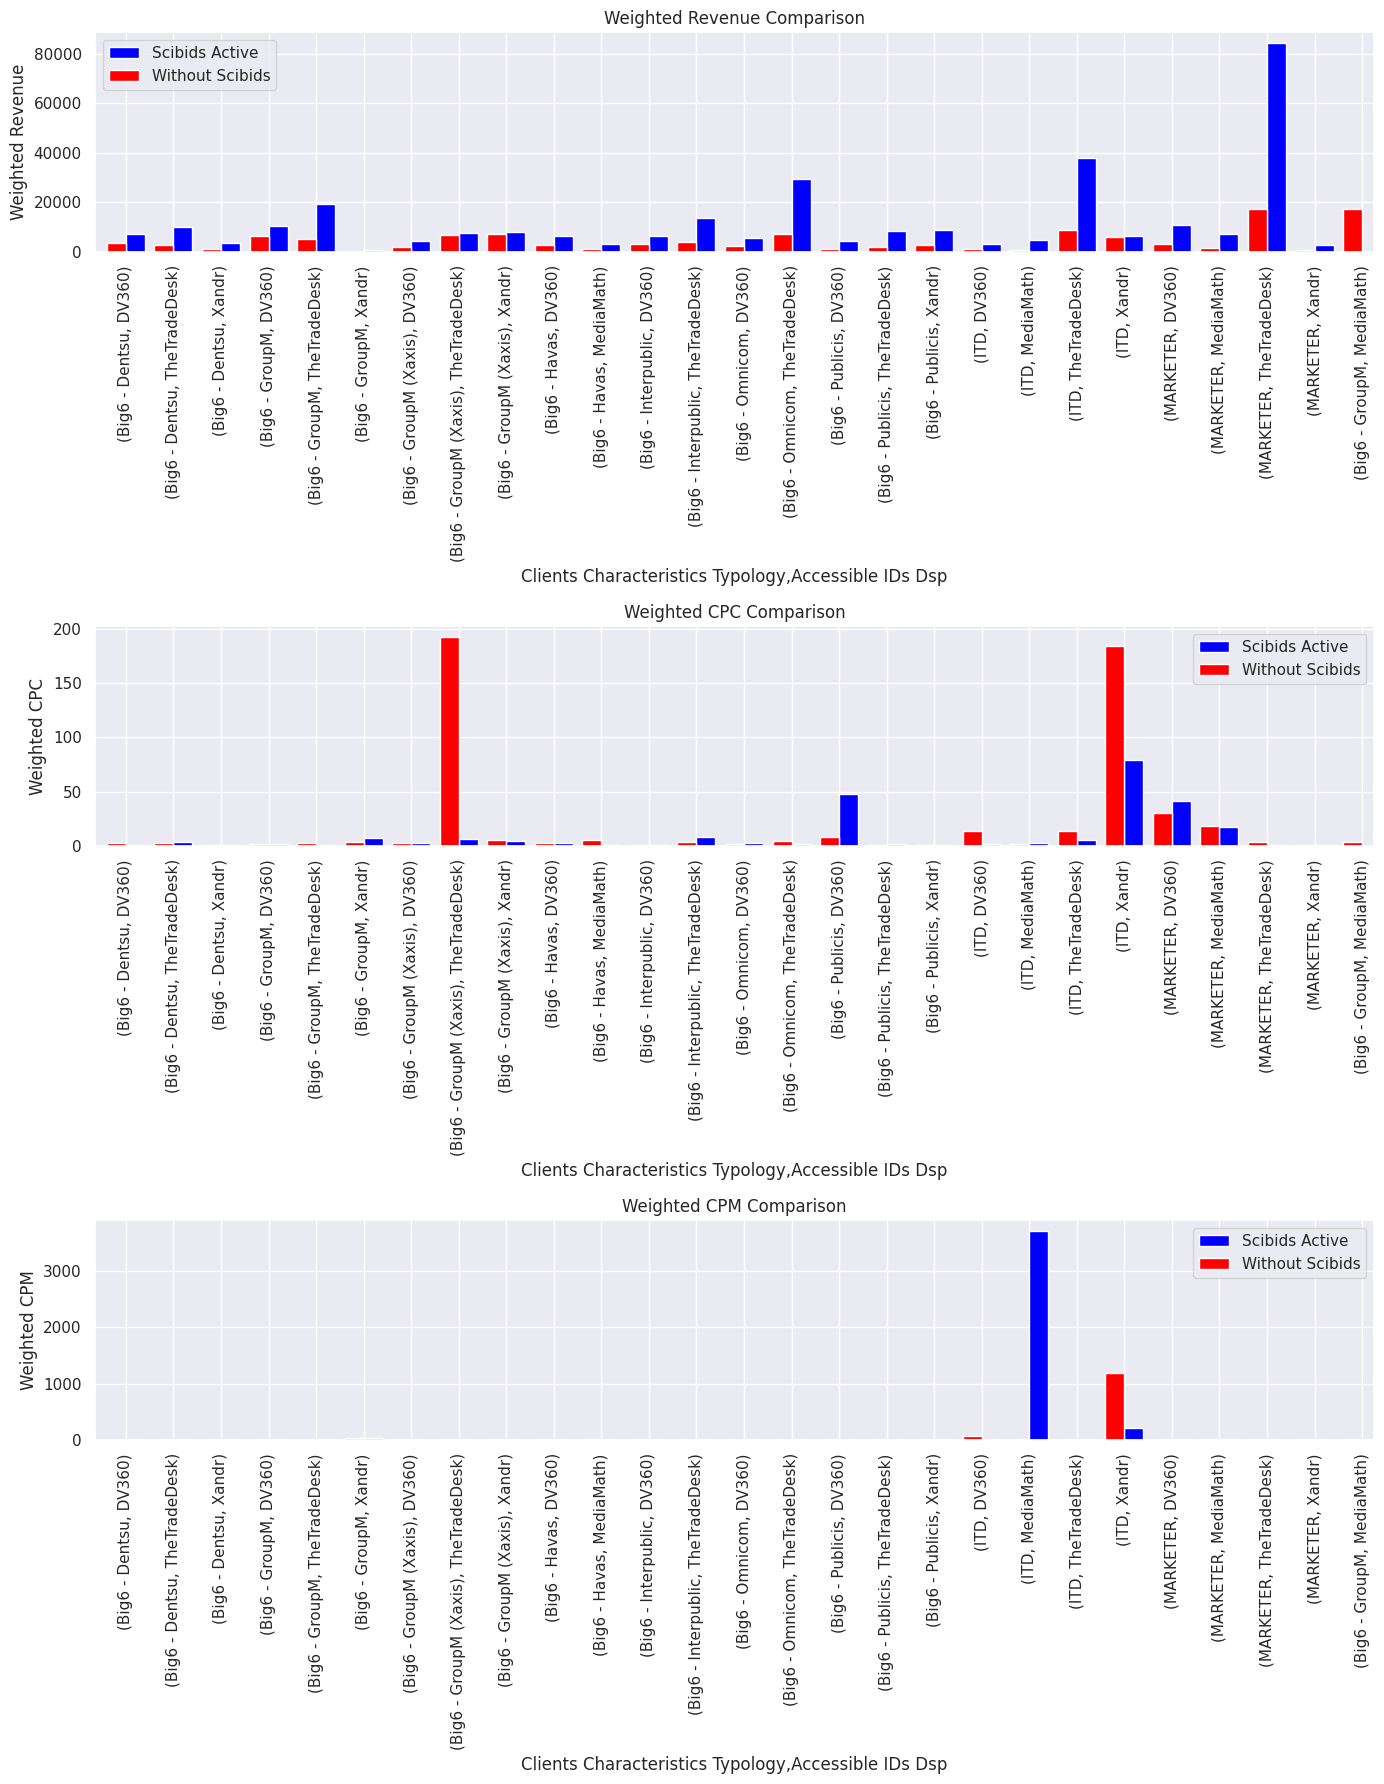

In [ ]:
# Visualise
# Extracting data
scibids_revenue = pivot_typology_dsp['Scibids Active - Weighted Revenue']
without_scibids_revenue = pivot_typology_dsp['Without Scibids - Weighted Revenue']

scibids_cpc = pivot_typology_dsp['Scibids Active - Weighted CPC']
without_scibids_cpc = pivot_typology_dsp['Without Scibids - Weighted CPC']

scibids_cpm = pivot_typology_dsp['Scibids Active - Weighted CPM']
without_scibids_cpm = pivot_typology_dsp['Without Scibids - Weighted CPM']

# Setting up the plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Plotting Revenue
scibids_revenue.plot(kind='bar', ax=axes[0], position=0, color='blue', width=0.4)
without_scibids_revenue.plot(kind='bar', ax=axes[0], position=1, color='red', width=0.4)
axes[0].set_title('Weighted Revenue Comparison')
axes[0].set_ylabel('Weighted Revenue')
axes[0].legend(["Scibids Active", "Without Scibids"])

# Plotting CPC
scibids_cpc.plot(kind='bar', ax=axes[1], position=0, color='blue', width=0.4)
without_scibids_cpc.plot(kind='bar', ax=axes[1], position=1, color='red', width=0.4)
axes[1].set_title('Weighted CPC Comparison')
axes[1].set_ylabel('Weighted CPC')
axes[1].legend(["Scibids Active", "Without Scibids"])

# Plotting CPM
scibids_cpm.plot(kind='bar', ax=axes[2], position=0, color='blue', width=0.4)
without_scibids_cpm.plot(kind='bar', ax=axes[2], position=1, color='red', width=0.4)
axes[2].set_title('Weighted CPM Comparison')
axes[2].set_ylabel('Weighted CPM')
axes[2].legend(["Scibids Active", "Without Scibids"])

plt.tight_layout()
plt.show()


## Performance measures over time by Typology, Region and Scibids activity

In [ ]:
# Extracting month and year from 'Performance Measures Day Tz Month' to create a 'Period' column
df['Period'] = df['Performance Measures Day Tz Month'].dt.strftime('%Y-%m')


# Calculate for scibids_active_data
typology_region_period_segmentation_weighted_scibids = scibids_active = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Active'].groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Period']).apply(weighted_measures)

# Calculate for without_scibids_data
typology_region_period_segmentation_weighted_without_scibids = without_scibids = df[df['Performance Measures Billing Scibids Activity'] == 'Without Scibids'].groupby(['Clients Characteristics Typology', 'Clients Characteristics Scibids Region', 'Period']).apply(weighted_measures)

# Pivot table to compare Scibids Active vs Without Scibids
pivot_typology_region_period = pd.concat([typology_region_period_segmentation_weighted_scibids.add_prefix('Scibids Active - '),
                         typology_region_period_segmentation_weighted_without_scibids.add_prefix('Without Scibids - ')], axis=1)

pivot_typology_region_period


Scibids Active - Weighted Revenue  \
Clients Characteristics Typology Clients Characteristics Scibids Region Period                                       
Big6 - Dentsu                    JAPAC                                  2022-01                        2387.114756   
                                                                        2022-02                        2252.840367   
                                                                        2022-03                        2844.989177   
                                                                        2022-04                        1946.618236   
                                                                        2022-05                        2801.125920   
...                                                                                                            ...   
MARKETER                         JAPAC                                  2023-03                                NaN   
                                                                        2023-06                                NaN   
                                                                        2023-07                                NaN   
                                                                        2023-08                                NaN   
                                                                        2023-09                                NaN   

                                                                                 Scibids Active - Weighted CPC  \
Clients Characteristics Typology Clients Characteristics Scibids Region Period                                   
Big6 - Dentsu                    JAPAC                                  2022-01                       0.023099   
                                                                        2022-02                       0.024644   
                                                                        2022-03                       0.030085   
                                                                        2022-04                       0.028021   
                                                                        2022-05                       0.035271   
...                                                                                                        ...   
MARKETER                         JAPAC                                  2023-03                            NaN   
                                                                        2023-06                            NaN   
                                                                        2023-07                            NaN   
                                                                        2023-08                            NaN   
                                                                        2023-09                            NaN   

                                                                                 Scibids Active - Weighted CPM  \
Clients Characteristics Typology Clients Characteristics Scibids Region Period                                   
Big6 - Dentsu                    JAPAC                                  2022-01                       0.026893   
                                                                        2022-02                       0.024158   
                                                                        2022-03                       0.048279   
                                                                        2022-04                       0.061846   
                                                                        2022-05                       0.093677   
...                                                                                                        ...   
MARKETER                         JAPAC                                  2023-03                            NaN   
                                     

## Further analysis on CTR, Impressions and clicks, not as relevant and CPC and CPM

In [ ]:
# Grouping by 'Clients Characteristics Typology'
summary_table_typology = df.groupby(['Clients Characteristics Typology', 'Performance Measures Billing Scibids Activity'])[['Performance Measures Revenue USD', 'Performance Measures Clicks', 'Performance Measures Impressions', 'Insertion Orders Distinct Count of IOs']].sum()

# Calculate Normalized Revenue
summary_table_typology['Normalized Revenue (USD per Distinct Order ID)'] = summary_table_typology['Performance Measures Revenue USD'] / summary_table_typology['Insertion Orders Distinct Count of IOs']

# Drop the column used for normalization to keep the table clean
summary_table_typology.drop('Performance Measures Revenue USD', axis=1, inplace=True)
summary_table_typology.drop('Insertion Orders Distinct Count of IOs', axis=1, inplace=True)

# Rename the columns for a cleaner look
summary_table_typology.rename(columns={
    'Performance Measures Clicks': 'Total Clicks',
    'Performance Measures Impressions': 'Total Impressions'
}, inplace=True)

# Print the table
print(summary_table_typology)



                                                                                Total Clicks  \
Clients Characteristics Typology Performance Measures Billing Scibids Activity                 
Big6 - Dentsu                    Scibids Active                                     45362310   
                                 Without Scibids                                    21963047   
Big6 - GroupM                    Scibids Active                                     66997555   
                                 Without Scibids                                     7798860   
Big6 - GroupM (Xaxis)            Scibids Active                                     53699250   
                                 Without Scibids                                    26998105   
Big6 - Havas                     Scibids Active                                      1793734   
                                 Without Scibids                                     1795289   
Big6 - Interpublic               Scibids

In [ ]:
# Create a summary table
summary_table = df.groupby(['Clients Characteristics Scibids Region', 'Performance Measures Billing Scibids Activity'])[['Performance Measures Revenue USD', 'Performance Measures Clicks', 'Performance Measures Impressions', 'Insertion Orders Distinct Count of IOs']].sum()

# Calculate Normalized Revenue
summary_table['Normalized Revenue (USD per Distinct Order ID)'] = summary_table['Performance Measures Revenue USD'] / summary_table['Insertion Orders Distinct Count of IOs']

# Drop the column used for normalization to keep the table clean
summary_table.drop('Performance Measures Revenue USD', axis=1, inplace=True)
summary_table.drop('Insertion Orders Distinct Count of IOs', axis=1, inplace=True)

# Rename the columns for a cleaner look
summary_table.rename(columns={
    'Performance Measures Clicks': 'Total Clicks',
    'Performance Measures Impressions': 'Total Impressions'
}, inplace=True)

# Print the table
print(summary_table)



                                                                                      Total Clicks  \
Clients Characteristics Scibids Region Performance Measures Billing Scibids Activity                 
DACH/CEE/Nordics                       Scibids Active                                       979794   
                                       Without Scibids                                      342796   
JAPAC                                  Scibids Active                                    264993792   
                                       Without Scibids                                   199618187   
North America                          Scibids Active                                     42603691   
                                       Without Scibids                                     9669923   
South America                          Scibids Active                                     18638139   
                                       Without Scibids                            

In [ ]:
# Let's try with CTR calculations (Click Through Rate (CTR) for ads, which offers a percentage of users who click on an ad after viewing it)

# Calculate CTR for both Scibids Active and Scibids Inactive
df['CTR'] = (df['Performance Measures Clicks'] / df['Performance Measures Impressions']) * 100

# Segmenting CTR by Scibids Activity, Regions, DSPs, and Client Typologies
ctr_scibids_active = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Active']
ctr_scibids_inactive = df[df['Performance Measures Billing Scibids Activity'] == 'Scibids Inactive']

# Grouping to get average CTR
ctr_by_region_active = ctr_scibids_active.groupby('Clients Characteristics Scibids Region')['CTR'].mean()
ctr_by_dsp_active = ctr_scibids_active.groupby('Accessible IDs Dsp')['CTR'].mean()
ctr_by_typology_active = ctr_scibids_active.groupby('Clients Characteristics Typology')['CTR'].mean()

ctr_by_region_inactive = ctr_scibids_inactive.groupby('Clients Characteristics Scibids Region')['CTR'].mean()
ctr_by_dsp_inactive = ctr_scibids_inactive.groupby('Accessible IDs Dsp')['CTR'].mean()
ctr_by_typology_inactive = ctr_scibids_inactive.groupby('Clients Characteristics Typology')['CTR'].mean()

ctr_by_region_active, ctr_by_dsp_active, ctr_by_typology_active, ctr_by_region_inactive, ctr_by_dsp_inactive, ctr_by_typology_inactive


(Clients Characteristics Scibids Region
 DACH/CEE/Nordics    0.228812
 JAPAC                    NaN
 North America            NaN
 South America       0.139973
 South Europe             NaN
 UK                  0.148007
 Name: CTR, dtype: float64,
 Accessible IDs Dsp
 DV360                NaN
 MediaMath       2.982730
 TheTradeDesk    0.204848
 Xandr                NaN
 Name: CTR, dtype: float64,
 Clients Characteristics Typology
 Big6 - Dentsu                 NaN
 Big6 - GroupM            0.202167
 Big6 - GroupM (Xaxis)         NaN
 Big6 - Havas             0.140938
 Big6 - Interpublic       0.262160
 Big6 - Omnicom           0.151989
 Big6 - Publicis          0.304520
 ITD                           NaN
 MARKETER                 0.139220
 Name: CTR, dtype: float64,
 Series([], Name: CTR, dtype: float64),
 Series([], Name: CTR, dtype: float64),
 Series([], Name: CTR, dtype: float64))

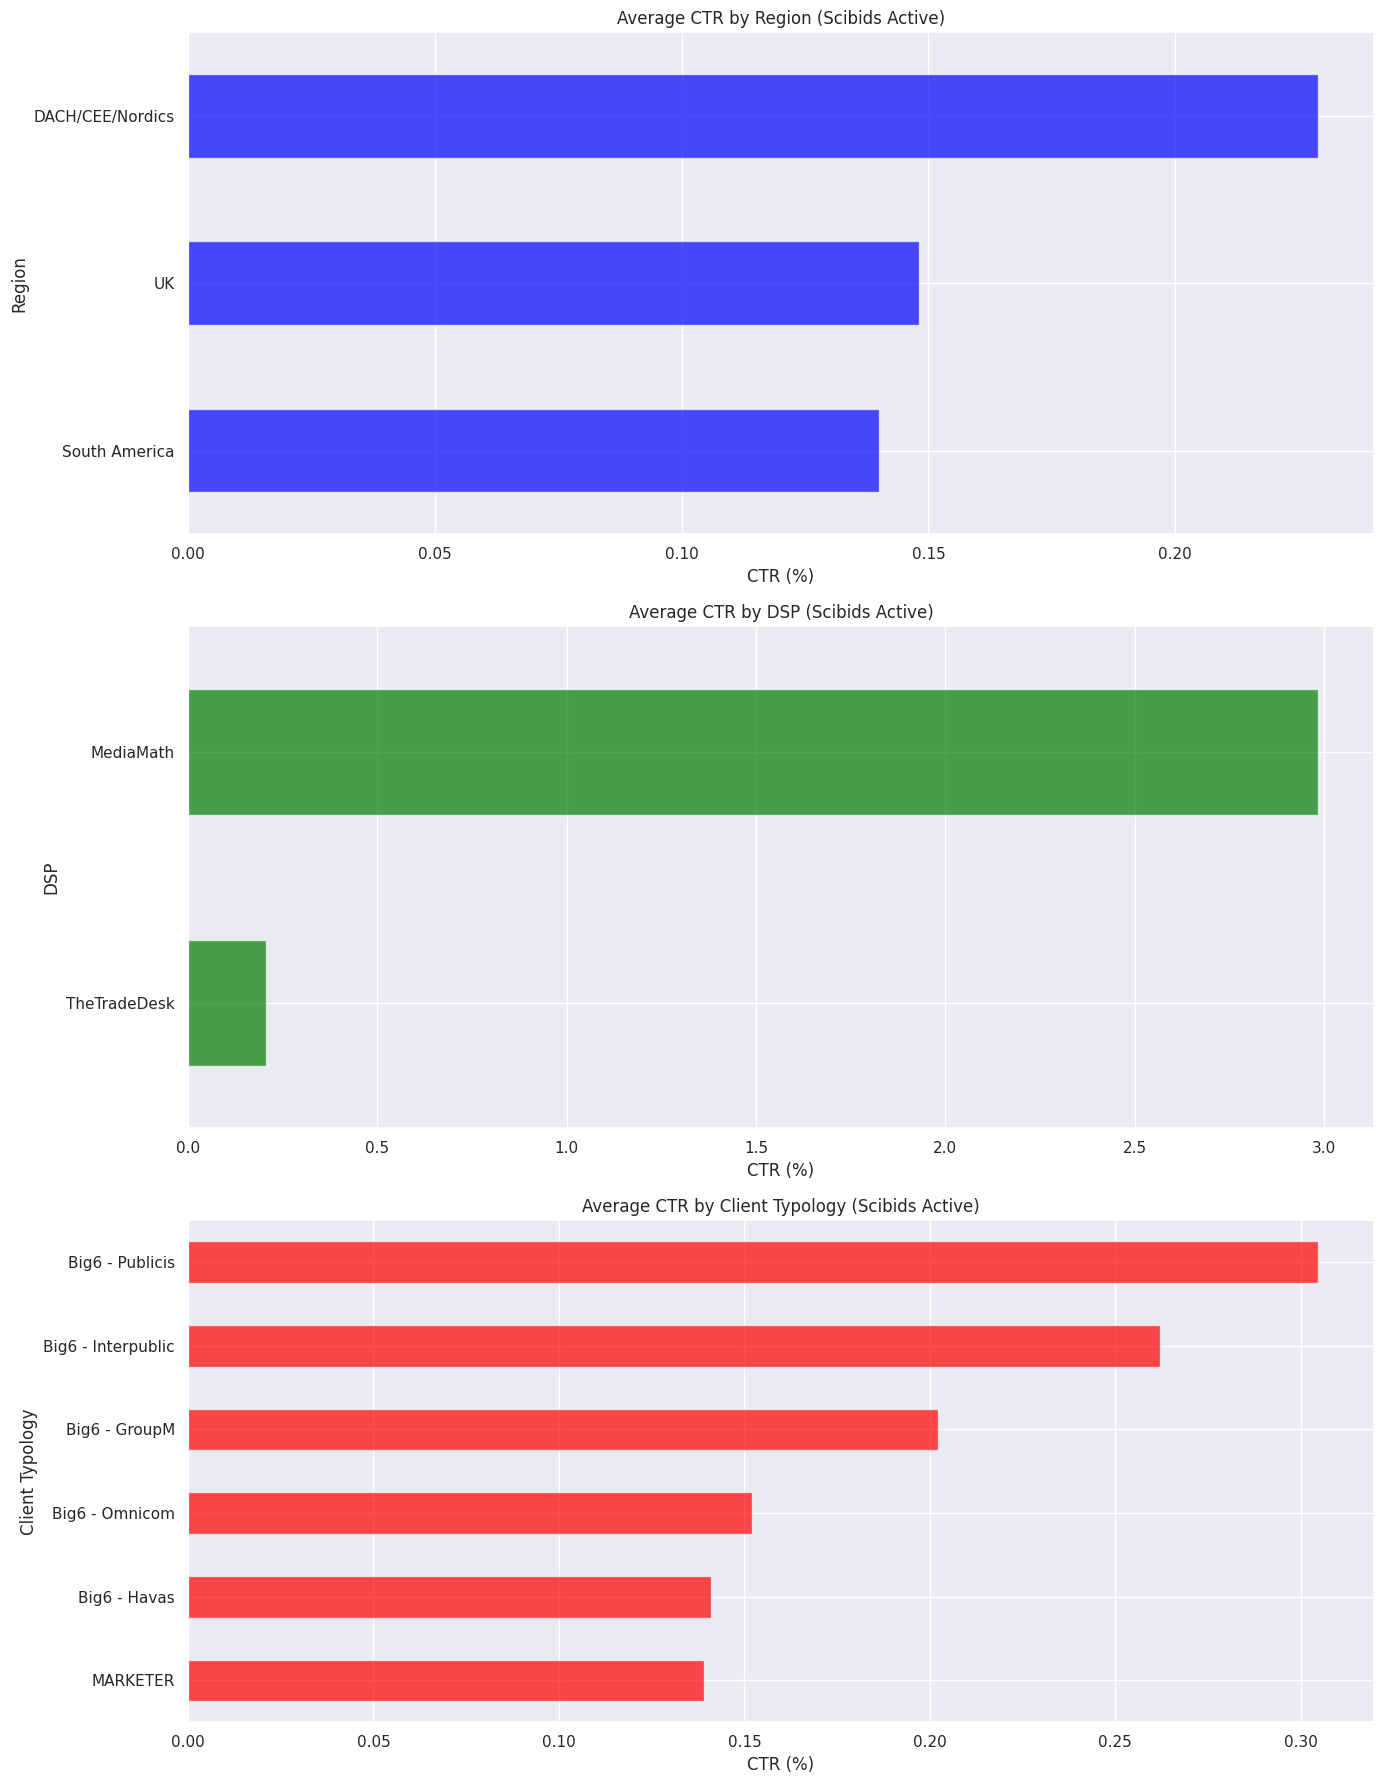

In [ ]:
# Visualization of the CTR segmented data

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Plotting CTR by Region for Scibids Active
ctr_by_region_active.dropna().sort_values().plot(kind='barh', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Average CTR by Region (Scibids Active)')
axes[0].set_xlabel('CTR (%)')
axes[0].set_ylabel('Region')

# Plotting CTR by DSP for Scibids Active
ctr_by_dsp_active.dropna().sort_values().plot(kind='barh', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Average CTR by DSP (Scibids Active)')
axes[1].set_xlabel('CTR (%)')
axes[1].set_ylabel('DSP')

# Plotting CTR by Client Typology for Scibids Active
ctr_by_typology_active.dropna().sort_values().plot(kind='barh', ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Average CTR by Client Typology (Scibids Active)')
axes[2].set_xlabel('CTR (%)')
axes[2].set_ylabel('Client Typology')

plt.tight_layout()
plt.show()


For campaigns with Scibids Active:

The highest average CTR for regions is observed in the US (0.341%), followed by DACH/CEE/Nordics (0.2288%) and UK (0.148%).
Among the DSPs, MediaMath has the highest average CTR of 2.98%, followed by TheTradeDesk with 0.2048%.
In terms of client typologies, the Big6 - Publicis segment has an average CTR of 0.3045%, followed by Big6 - Interpublic with 0.2622% and Big6 - GroupM with 0.2022%.

# Final dataset download

In [ ]:
from google.colab import files
df.to_csv('Tableau_nettoyeVF.csv')
files.download('Tableau_nettoyeVF.csv')